In [ ]:
# http://archive.ics.uci.edu/ml/datasets/heterogeneity+activity+recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

## Activity Recognition

## Phone Accelerometer

In [2]:
phone_accel_df= pd.read_csv('./HHAR/Activity recognition exp/Phones_accelerometer.csv')
phone_accel_df

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand
...,...,...,...,...,...,...,...,...,...,...
13062470,129048,1424778553315,92263781761000,1.379043,0.153227,9.959755,i,samsungold,samsungold_2,bike
13062471,129049,1424778553346,92263812248000,1.379043,0.153227,9.806528,i,samsungold,samsungold_2,bike
13062472,129050,1424778553366,92263832267000,1.532270,0.153227,9.806528,i,samsungold,samsungold_2,bike
13062473,129051,1424778553386,92263852409000,1.532270,0.000000,9.959755,i,samsungold,samsungold_2,bike


In [3]:
phone_accel_df['Arrival_Time_datetime']= pd.to_datetime(phone_accel_df['Arrival_Time'])
phone_accel_df['Creation_Time_datetime']= pd.to_datetime(phone_accel_df['Creation_Time'])

In [4]:
temp= np.array( [ -1 for i in range(len(phone_accel_df)) ] )
gt= ["bike", "sit", "stand", "walk", "stairsup", "stairsdown"]
for label_name, label_num in zip(gt, range(len(gt))):
    for i in np.nonzero((phone_accel_df['gt']==label_name).to_numpy())[0]:
        temp[i]= label_num
        
for idx in np.nonzero((temp==-1))[0]: # NaN
    temp[idx]= label_num +1
    
phone_accel_df['gt_label']= temp

In [7]:
len(phone_accel_df),len(phone_accel_df[phone_accel_df['gt_label']==len(gt)].index)

(13062475, 1783200)

In [11]:
phone_accel_df= phone_accel_df.drop(phone_accel_df[phone_accel_df['gt_label']==len(gt)].index, axis=0)

In [13]:
phone_accel_df.index= [i for i in range(len(phone_accel_df))]

In [14]:
phone_accel_df

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt,Arrival_Time_datetime,Creation_Time_datetime,gt_label
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand,1970-01-01 00:23:44.696633908,2015-02-23 13:03:51.913248572,2
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand,1970-01-01 00:23:44.696633909,2015-02-23 13:03:51.918283972,2
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand,1970-01-01 00:23:44.696633918,2015-02-23 13:03:51.923288855,2
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand,1970-01-01 00:23:44.696633919,2015-02-23 13:03:51.928385290,2
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand,1970-01-01 00:23:44.696633929,2015-02-23 13:03:51.933420691,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11279270,129048,1424778553315,92263781761000,1.379043,0.153227,9.959755,i,samsungold,samsungold_2,bike,1970-01-01 00:23:44.778553315,1970-01-02 01:37:43.781761000,0
11279271,129049,1424778553346,92263812248000,1.379043,0.153227,9.806528,i,samsungold,samsungold_2,bike,1970-01-01 00:23:44.778553346,1970-01-02 01:37:43.812248000,0
11279272,129050,1424778553366,92263832267000,1.532270,0.153227,9.806528,i,samsungold,samsungold_2,bike,1970-01-01 00:23:44.778553366,1970-01-02 01:37:43.832267000,0
11279273,129051,1424778553386,92263852409000,1.532270,0.000000,9.959755,i,samsungold,samsungold_2,bike,1970-01-01 00:23:44.778553386,1970-01-02 01:37:43.852409000,0


In [5]:
phone_accel_df= phone_accel_df[['Index', 'Creation_Time', 'Creation_Time_datetime', 'User', 'Model', 'Device', 'x', 'y', 'z', 'gt', 'gt_label']]
phone_accel_df

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
0,0,1424696631913248572,2015-02-23 13:03:51.913248572,a,nexus4,nexus4_1,-5.958191,0.688065,8.135345,stand,2
1,1,1424696631918283972,2015-02-23 13:03:51.918283972,a,nexus4,nexus4_1,-5.952240,0.670212,8.136536,stand,2
2,2,1424696631923288855,2015-02-23 13:03:51.923288855,a,nexus4,nexus4_1,-5.995087,0.653549,8.204376,stand,2
3,3,1424696631928385290,2015-02-23 13:03:51.928385290,a,nexus4,nexus4_1,-5.942718,0.676163,8.128204,stand,2
4,4,1424696631933420691,2015-02-23 13:03:51.933420691,a,nexus4,nexus4_1,-5.991516,0.641647,8.135345,stand,2
...,...,...,...,...,...,...,...,...,...,...,...
13062470,129048,92263781761000,1970-01-02 01:37:43.781761000,i,samsungold,samsungold_2,1.379043,0.153227,9.959755,bike,0
13062471,129049,92263812248000,1970-01-02 01:37:43.812248000,i,samsungold,samsungold_2,1.379043,0.153227,9.806528,bike,0
13062472,129050,92263832267000,1970-01-02 01:37:43.832267000,i,samsungold,samsungold_2,1.532270,0.153227,9.806528,bike,0
13062473,129051,92263852409000,1970-01-02 01:37:43.852409000,i,samsungold,samsungold_2,1.532270,0.000000,9.959755,bike,0


### Scaling

In [51]:
phone_accel_df[phone_accel_df["Device"]=="nexus4_1"][["x", "y", "z"]]

,x,y,z
0,-5.958191,0.688065,8.135345
1,-5.952240,0.670212,8.136536
2,-5.995087,0.653549,8.204376
3,-5.942718,0.676163,8.128204
4,-5.991516,0.641647,8.135345
...,...,...,...
11870458,2.135071,-0.028427,10.068207
11870459,2.142212,-0.007004,10.052734
11870460,2.180298,0.009659,10.038452
11870461,2.139832,0.014420,9.951569


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler= MinMaxScaler()

# Scaled based on device and gt_label
# for device in np.unique(phone_accel_df['Device']):
#     for i in np.unique(phone_accel_df['gt_label']):
#         phone_accel_df.loc[(phone_accel_df["Device"]==device) & (phone_accel_df["gt_label"]==i), ["x", "y", "z"]]= scaler.fit_transform( phone_accel_df[(phone_accel_df["Device"]==device) & (phone_accel_df["gt_label"]==i) ][["x", "y", "z"]] )

    
# Scaled based on device
for device in np.unique(phone_accel_df['Device']):
    phone_accel_df.loc[(phone_accel_df["Device"]==device), ["x", "y", "z"]]= scaler.fit_transform( phone_accel_df[(phone_accel_df["Device"]==device) ][["x", "y", "z"]] )


In [54]:
phone_accel_df[(phone_accel_df["Device"]=="nexus4_1")][["x", "y", "z"]]

,x,y,z
0,0.510448,0.512712,0.251599
1,0.510540,0.512279,0.251629
2,0.509875,0.511876,0.253325
3,0.510688,0.512424,0.251421
4,0.509930,0.511588,0.251599
...,...,...,...
11870458,0.636192,0.495359,0.299926
11870459,0.636303,0.495878,0.299539
11870460,0.636895,0.496282,0.299182
11870461,0.636266,0.496397,0.297009


In [55]:
phone_accel_df

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
0,0,1424696631913248572,2015-02-23 13:03:51.913248572,a,nexus4,nexus4_1,0.510448,0.512712,0.251599,stand,2
1,1,1424696631918283972,2015-02-23 13:03:51.918283972,a,nexus4,nexus4_1,0.510540,0.512279,0.251629,stand,2
2,2,1424696631923288855,2015-02-23 13:03:51.923288855,a,nexus4,nexus4_1,0.509875,0.511876,0.253325,stand,2
3,3,1424696631928385290,2015-02-23 13:03:51.928385290,a,nexus4,nexus4_1,0.510688,0.512424,0.251421,stand,2
4,4,1424696631933420691,2015-02-23 13:03:51.933420691,a,nexus4,nexus4_1,0.509930,0.511588,0.251599,stand,2
...,...,...,...,...,...,...,...,...,...,...,...
13062470,129048,92263781761000,1970-01-02 01:37:43.781761000,i,samsungold,samsungold_2,0.533333,0.400943,0.693069,bike,0
13062471,129049,92263812248000,1970-01-02 01:37:43.812248000,i,samsungold,samsungold_2,0.533333,0.400943,0.688119,bike,0
13062472,129050,92263832267000,1970-01-02 01:37:43.832267000,i,samsungold,samsungold_2,0.537255,0.400943,0.688119,bike,0
13062473,129051,92263852409000,1970-01-02 01:37:43.852409000,i,samsungold,samsungold_2,0.537255,0.396226,0.693069,bike,0


# Feature Extraction

### ECDF

In [25]:
accel_features= phone_accel_df[['x','y','z']].to_numpy()

In [43]:
accel_features[:,0].shape, len(set(accel_features[:,0]))

((13062475,), 69548)

In [47]:
from statsmodels.distributions.empirical_distribution import ECDF

accel_feature_set= list(set(accel_features[:,0]))

ecdf= ECDF(accel_feature_set) # creates an empirical cumulative distribution function based on the input
# ecdf(0) # returns the quantile from the input, i.e 0 --> input, 0, is within Xth quantile of the distribution
feature_quantile= ecdf(accel_feature_set) # returns the quantiles of features

In [48]:
# to acquire the inverse of ecdf, input: quantile, output: feature value
# use interpolation to fill in the blanks regarding quantile position
# https://stackoverflow.com/questions/44132543/python-inverse-empirical-cumulative-distribution-function-ecdf
from scipy.interpolate import interp1d

inverse_ecdf= interp1d(feature_quantile, accel_feature_set, kind='cubic')
# inverse_ecdf(X) # input X, quantile, returns value that should be from the distribution

In [84]:
ecdf_d_parameter= 30
step= 1 / ecdf_d_parameter
bins= list(map(lambda x: x*step, list(range(1,ecdf_d_parameter+1))))
print(bins)

[0.03333333333333333, 0.06666666666666667, 0.1, 0.13333333333333333, 0.16666666666666666, 0.2, 0.23333333333333334, 0.26666666666666666, 0.3, 0.3333333333333333, 0.36666666666666664, 0.4, 0.43333333333333335, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.6, 0.6333333333333333, 0.6666666666666666, 0.7, 0.7333333333333333, 0.7666666666666666, 0.8, 0.8333333333333334, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667, 1.0]


In [93]:
ecdf_features= list(inverse_ecdf(bins[:]))
ecdf_features.append(np.mean(accel_feature_set))
ecdf_mean_features= ecdf_features
ecdf_mean_features

[-16.65310731938928,
 -14.853668029380444,
 -13.64709954514977,
 -12.616203671385138,
 -11.657911456778795,
 -10.73359041949198,
 -9.813263129858585,
 -8.894396864241008,
 -7.974137768910549,
 -7.0547842016717235,
 -6.135181207467564,
 -5.215662491988494,
 -4.296552134025224,
 -3.3772071515908917,
 -2.4576874,
 -1.5387418589918362,
 -0.6194979655523616,
 0.2999301673329309,
 1.219857247729376,
 2.1387291849913037,
 3.057452764500972,
 3.976692328313243,
 4.89629241481269,
 5.9030402496987655,
 7.132111481488936,
 8.067128899675813,
 8.994119110196038,
 9.966251071872074,
 11.957521034171126,
 27.92894,
 -2.436186781572233]

In [94]:
ecdf_features= np.copy(ecdf_mean_features[:-1])
ecdf_features

array([-16.65310732, -14.85366803, -13.64709955, -12.61620367,
       -11.65791146, -10.73359042,  -9.81326313,  -8.89439686,
        -7.97413777,  -7.0547842 ,  -6.13518121,  -5.21566249,
        -4.29655213,  -3.37720715,  -2.4576874 ,  -1.53874186,
        -0.61949797,   0.29993017,   1.21985725,   2.13872918,
         3.05745276,   3.97669233,   4.89629241,   5.90304025,
         7.13211148,   8.0671289 ,   8.99411911,   9.96625107,
        11.95752103,  27.92894   ])

## Frequency Domain

In [120]:
# https://www.sjsu.edu/people/burford.furman/docs/me120/FFT_tutorial_NI.pdf
# https://link.springer.com/article/10.1007/s00779-010-0293-9

from scipy.fft import fft, fftfreq, fftshift #, fftn
# fftshift, shift 0 frequency component to center of spectrum

# discrete fourier transform 
fft_accel_features= fft(accel_features[:])

# fftfreq bins are as follows
# frequency: [0, 1, 2, ...(N-1)/2, ..., -1] / (d*n) : default d=1

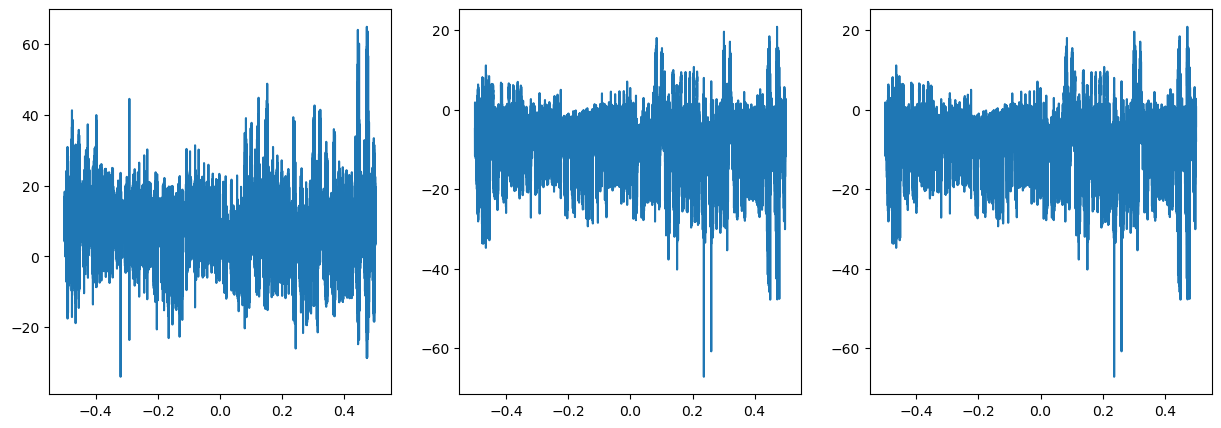

In [195]:
# positive and negative frequency terms
plt.figure(figsize=(15,5))
for i in range(fft_accel_features.shape[1]):
    plt.subplot(1,3,i+1)
    plt.plot(fftshift(fftfreq(len(fft_accel_features))), fftshift(fft_accel_features[:, i].real))
    

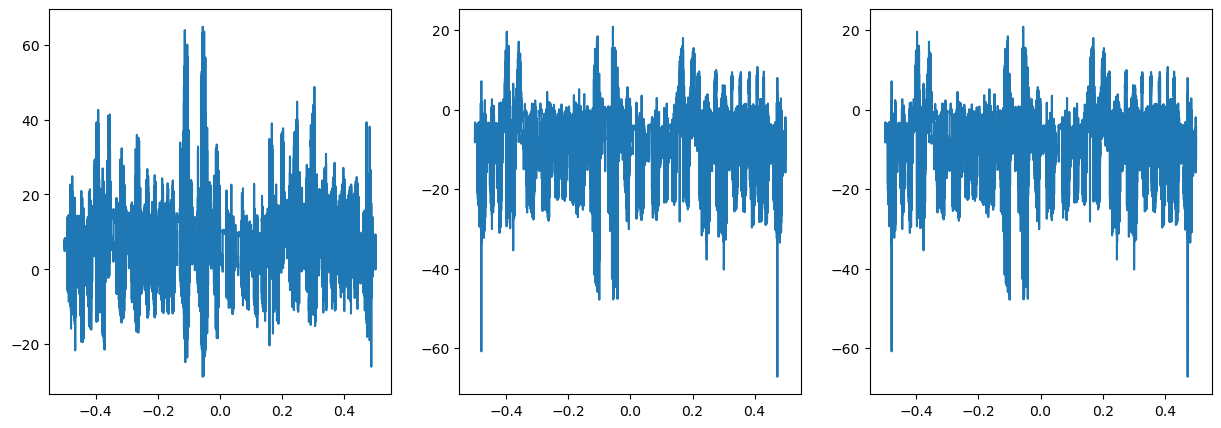

In [197]:
positive_spectrum= len(accel_features) //2

plt.figure(figsize=(15,5))
for i in range(fft_accel_features.shape[1]):
    plt.subplot(1,3,i+1)
    plt.plot(fftshift(fftfreq(positive_spectrum)), fftshift(fft_accel_features[:positive_spectrum, i].real))

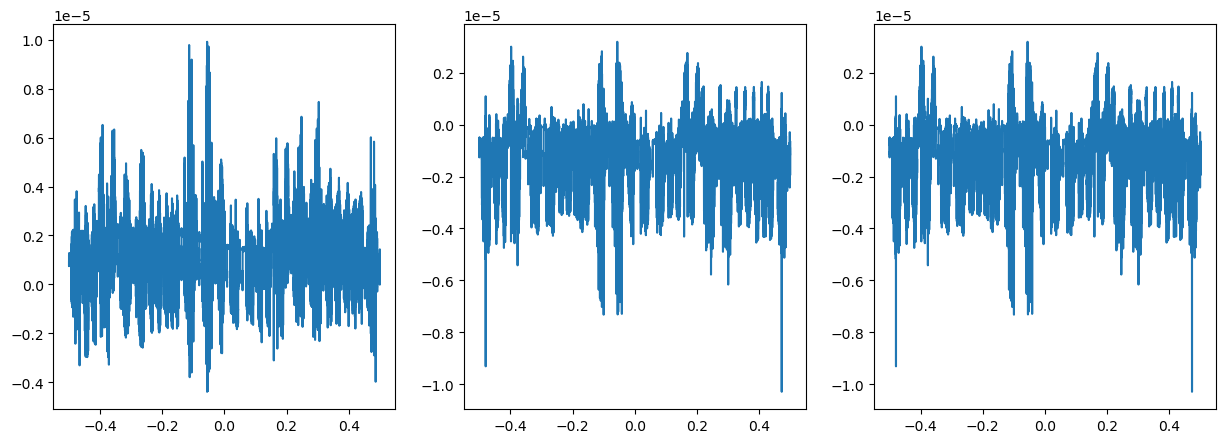

In [234]:
# normalise 
# normalise by dividing by the length of the features

plt.figure(figsize=(15,5))
for i in range(fft_accel_features.shape[1]):
    plt.subplot(1,3,i+1)
    plt.plot(fftshift(fftfreq(positive_spectrum)), fftshift(fft_accel_features[:positive_spectrum, i].real/ positive_spectrum))

In [176]:
# dc component, the amplitude at frequency 0 (the first coefficient) 
fft_dc_component= fft_accel_features[0]
fft_dc_component

array([  2.8652186-0.j        , -10.3698958+6.44953402j,
       -10.3698958-6.44953402j])

In [230]:
# Dominating Frequency and Magnitude

# index= np.nonzero(fft_accel_features[:positive_spectrum, 0]==max(fft_accel_features[:positive_spectrum, 0]))[0][0]
index= list(fft_features).index(max(fft_features))

# Magnitude
abs(fft_accel_features[:positive_spectrum, 0][index])

# Frequency 
fftfreq(positive_spectrum, d=2)[index]

-0.027817548191866256

In [240]:
# magnitude of fft coefficients -- same as calculating sqrt( real **2 + imag ** 2)
fft_magnitude_accel_features= abs(fft_accel_features[:positive_spectrum]/ positive_spectrum)

In [157]:
# sum of fft coefficients
fft_sum_accel_features= np.sum(fft_accel_features[:positive_spectrum]/ positive_spectrum, axis=1)

In [108]:
# power spectrum
# For 2 sided spectrum (negative, positive), The value for each frequency= Amplitude for each frequency ** 2 / 4
# For positive spectrum, DC component -- unaffected ELSE value for each frequency= Amplitude for each frequency ** 2 / 2
fft_ps_accel_features= abs(fft_accel_features[:positive_spectrum]/ positive_spectrum) ** 2

# Spectral Energy
np.sum(fft_accel_features[:positive_spectrum] ** 2/ positive_spectrum, axis=1)

In [242]:
# information entropy
# entropy metric can be computed using the normalized information entropy of the discrete FFT(fft) coefficient magnitudes
# excluding the DC component [16]

from scipy.stats import entropy
# negative value causes -inf

entropy(abs(accel_features[1:positive_spectrum]/ positive_spectrum))

array([15.44811129, 15.3090993 , 15.65348063])

## Time Domain

In [248]:
# https://link.springer.com/article/10.1007/s00779-010-0293-9
# mean of window
np.mean(accel_features, axis=0)

array([-1.70457866,  0.15954091,  8.93175268])

In [247]:
# standard deviation, variance
np.std(accel_features, axis=0), np.var(accel_features, axis=0)

(array([3.85908817, 1.55203953, 2.2629518 ]),
 array([14.89256151,  2.40882669,  5.12095086]))

In [250]:
# max, min, median, range
np.max(accel_features, axis=0), np.min(accel_features, axis=0), np.median(accel_features, axis=0), np.max(accel_features, axis=0)-np.min(accel_features, axis=0)

(array([27.92894 , 20.808151, 39.31801 ]),
 array([-38.812073, -22.495117, -13.423874]),
 array([-2.145178,  0.153227,  9.063251]),
 array([66.741013, 43.303268, 52.741884]))

In [251]:
# rms
np.sqrt(np.sum(accel_features ** 2, axis=0) / len(accel_features))

array([4.21878536, 1.56021793, 9.21396532])

In [256]:
# integration over signal, integration over rms 
np.trapz(accel_features, axis=0),np.trapz(np.sqrt(accel_features**2 / len(accel_features)), axis=0)

(array([-2.22660139e+07,  2.08399882e+06,  1.16670787e+08]),
 array([12397.07171528,  4163.03425753, 32281.99350642]))

In [262]:
# pearson correlation
# can do so with two sensors, but not what is done in the paper
import pandas as pd
pd.DataFrame( np.corrcoef(accel_features.T))

,0,1,2
0,1.000000,-0.046164,-0.128756
1,-0.046164,1.000000,-0.012963
2,-0.128756,-0.012963,1.000000


In [267]:
pairs=[(0,1), (0,2), (1,2)]
for (i, j) in pairs:
    print(np.corrcoef(accel_features.T)[i,j])

-0.04616401914775158
-0.12875591832699135
-0.012963275308988808


In [265]:
# cross correlation - normalise by length of window
# largest coefficient means importance
pairs= [(0,1), (1,2), (0,2)]
for (i,j) in pairs:
    print(np.dot(accel_features[:,i], accel_features[:, j]) / len(accel_features))

-0.5484474586967949
1.3794504696035756
-16.34929155318739


## Sequence Extraction

In [10]:
from tqdm import tqdm

def sequence_extraction(df, timestamp_delta_threshold=0.5, offset= 1e9, discard_threshold=1):
    
    start= df['Creation_Time'].iloc[0] #0 # timedelta(seconds=0)
    length=1
    
    lengths= []
    starts= [0]
    device_user_gt=[f"{df['Device'].iloc[0]}-{df['User'].iloc[0]}-{df['gt_label'].iloc[0]}"]
    
    # extracting continuous sequences from device: start, length, identifier
    for index, row in tqdm(df[1:].iterrows(), total= len(df[1:])):
        if abs(start-row['Creation_Time'])/offset< timestamp_delta_threshold and device_user_gt[-1]==f"{row['Device']}-{row['User']}-{row['gt_label']}":
            length+=1
            start=row['Creation_Time']
        else:
            lengths.append(length)
            length=1
            start=row['Creation_Time']
            starts.append(index)
            device_user_gt.append(f"{row['Device']}-{row['User']}-{row['gt_label']}")
        
    if length > 1:
        lengths.append(length)

    
    # Discarding sequences below a certain threshold length
    dictionary={}
    for key in np.unique(device_user_gt[:]):
        dictionary[key]={}


    for i, j, k in zip(starts, lengths[:], device_user_gt[:]):
        if j>discard_threshold:
            dictionary[k][i]= j
            tmp= "OK"
        else:
            tmp= "DISCARD"
        print(k, i, j, tmp)
    
    
    
    return dictionary

In [16]:
phone_accel_dict= sequence_extraction(phone_accel_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13062474/13062474 [07:18<00:00, 29772.62it/s]


In [20]:
# # Discarding sequences below a certain threshold length
# phone_accel_dict={}
# for key in np.unique(phone_accel_device_user_gt[:]):
#     phone_accel_dict[key]={}

# discard_threshold=1
# for i, j, k in zip(phone_accel_starts, phone_accel_lengths[:], phone_accel_device_user_gt[:]):
#     if j>discard_threshold:
#         phone_accel_dict[k][i]= j
#         tmp= "OK"
#     else:
#         tmp= "DISCARD"
#     print(k, i, j, tmp)
    

In [3]:
def find_average_length(df, dictionary, threshold=2, offset=1e9):
# finding the average length of indices for approximate duration
    
    lengths_for_window= []

    windows_dict={}
    for key, start_length_dict in dictionary.items():
        print(key, end="")
        windows_dict[key]=[]
        for start, length in start_length_dict.items():
            seq_start=start
            duration=0
            window_count=1
            last_window_index=start
            window_list=[]

            for count in range(1, length):
    #         while count < length: # while sequence is not exhausted ###
                # duration is the start+count point - seq_start point
                duration = abs(df['Creation_Time'].iloc[start+count]-df['Creation_Time'].iloc[seq_start])/offset

                if duration > threshold:
                    duration=0
                    lengths_for_window.append(window_count)
                    window_list.append((last_window_index, last_window_index+count))
                     last_window_index += count+1 # step window forward (noninclusive with last window)
                    seq_start= start+count+1 # step seq_start point forward (noninclusive with last window)
                    window_count=1
                else:
                    window_count += 1

            windows_dict[key].append(window_list) # could have empty lists

        print(" Done")
        
    return int(round(np.mean(lengths_for_window))), windows_dict

In [23]:
average_win_len, windows_dict= find_average_length(phone_accel_df, phone_accel_dict)

nexus4_1-a-0

nexus4_1-a-1

nexus4_1-a-2

nexus4_1-a-3

nexus4_1-a-4

nexus4_1-a-5

nexus4_1-a-6

nexus4_1-b-0

nexus4_1-b-1

nexus4_1-b-2

nexus4_1-b-3

nexus4_1-b-4

nexus4_1-b-5

nexus4_1-b-6

nexus4_1-c-0

nexus4_1-c-1

nexus4_1-c-2

nexus4_1-c-3

nexus4_1-c-4

nexus4_1-c-5

nexus4_1-c-6

nexus4_1-d-0

nexus4_1-d-1

nexus4_1-d-2

nexus4_1-d-3

nexus4_1-d-4

nexus4_1-d-5

nexus4_1-d-6

nexus4_1-e-0

nexus4_1-e-1

nexus4_1-e-2

nexus4_1-e-3

nexus4_1-e-4

nexus4_1-e-5

nexus4_1-e-6

nexus4_1-f-0

nexus4_1-f-1

nexus4_1-f-2

nexus4_1-f-3

nexus4_1-f-4

nexus4_1-f-5

nexus4_1-f-6

nexus4_1-g-0

nexus4_1-g-1

nexus4_1-g-2

nexus4_1-g-3

nexus4_1-g-4

nexus4_1-g-5

nexus4_1-g-6

nexus4_1-h-0

nexus4_1-h-1

nexus4_1-h-2

nexus4_1-h-3

nexus4_1-h-4

nexus4_1-h-5

nexus4_1-h-6

nexus4_1-i-0

nexus4_1-i-1

nexus4_1-i-2

nexus4_1-i-3

nexus4_1-i-4

nexus4_1-i-5

nexus4_1-i-6

nexus4_2-a-0

nexus4_2-a-1

nexus4_2-a-2

nexus4_2-a-3

nexus4_2-a-4

nexus4_2-a-5

nexus4_2-a-6

nexus4_2-b-0

nexus4

### Sanity Check
The following 3 blocks should correspond accordingly

In [15]:
# # sanity check 
# print(f"start {data_indices_dict['nexus4_1-a-bike'][0][0][0]}, end {data_indices_dict['nexus4_1-a-bike'][0][0][-1]}")

In [16]:
# # sanity check
# phone_accel_df.iloc[287141:287240+1] # important for end to have +1

In [17]:
# #sanity check 
# data_dict['nexus4_1-a-bike'][0]

In [24]:
#Creating windows based on average window size from fused sequences
window_size=average_win_len
data_indices_dict={}
for key, start_length_dict in phone_accel_dict.items():
    data_indices_dict[key]= []

    for start, length in start_length_dict.items():
        tmp_list=[]
        for i in range(start, start+length-window_size, window_size//2):
            tmp_list.append(np.arange(i, i+window_size))
        if len(tmp_list)>0:
            data_indices_dict[key].append(tmp_list)
        
        
# Alternative, using full sequence to train instead of windows
# data_dict={}
# for key, start_length_dict in phone_accel_dict.items():
#     data_indices_dict[key]= []

#     for start, length in start_length_dict.items():
#         tmp_list=[]
# ####### ORIGINAL
#         tmp_list.append(phone_accel_df.iloc[start:start+length][["x", "y", "z"]].to_numpy())
# #######
#         if len(tmp_list)>0:
#             data_indices_dict[key].append(tmp_list)


In [75]:
# sanity check
# len(data_indices_dict['nexus4_1-a-bike']) # sequences of key
# len(data_indices_dict['nexus4_1-a-bike'][0]) # windows of sequences
# len(data_indices_dict['nexus4_1-a-bike'][0][0]) # a window of length window_size
assert len(data_indices_dict['nexus4_1-a-bike'][0][0])==window_size, "incompatible window size, rerun data_indices_dict procedure accordingly"

In [25]:
from tqdm import tqdm

data_dict={}

# original measurements
for key, idx_lists in data_indices_dict.items():
        data_dict[key]=[]
        print(key)
        for idx_list in tqdm(idx_lists, total=len(idx_lists)): # idx_list is a sequence
            tmp_list=[]
            for indices in idx_list:
                tmp_list.append(phone_accel_df.iloc[indices][["x", "y", "z"]].to_numpy())
        data_dict[key].append(tmp_list)
#         break

#ecdf features
# from statsmodels.distributions.empirical_distribution import ECDF
# from scipy.interpolate import interp1d

# ecdf_d_parameter= 30
# step= 1 / ecdf_d_parameter
# bins= list(map(lambda x: x*step, list(range(1,ecdf_d_parameter+1))))

# for key, idx_lists in data_indices_dict.items():
#         data_dict[key]=[]
#         print(key)
#         for idx_list in tqdm(idx_lists, total=len(idx_lists)): # eacj idx_list is a sequence
#             tmp_list=[]
#             for indices in idx_list:
#                 original_features= phone_accel_df.iloc[indices][["x", "y", "z"]].to_numpy()
                
#                 ecdf_features=[]
#                 for channel in range(3):
#                     feature_set= list(set(original_features[:,channel]))
#                     ecdf= ECDF(feature_set)
#                     feature_quantile= ecdf(feature_set)
#                     try:
#                         inverse_ecdf= interp1d(feature_quantile, feature_set, kind='cubic', fill_value="extrapolate")
#                     except ValueError:
#                         inverse_ecdf= interp1d(feature_quantile, feature_set, fill_value="extrapolate")

                            
                    
#                     feature_set_mean= np.mean(original_features[:, channel])
                    
#                     ecdf_features.append(list(inverse_ecdf(bins))+[feature_set_mean])
#                 ecdf_features= np.stack(ecdf_features, axis=1)
#                 tmp_list.append(ecdf_features)
#             data_dict[key].append(tmp_list)
                
#         break


# Time Domain
# pairs= [(0,1), (0,2), (1,2)]
# for key, idx_lists in data_indices_dict.items():
#         data_dict[key]=[]
#         print(key)
#         for idx_list in tqdm(idx_lists, total=len(idx_lists)): # each idx_list is a sequence
#             tmp_list=[]
#             for indices in idx_list:
                
#                 original_features= phone_accel_df.iloc[indices][["x", "y", "z"]].to_numpy()
                
#                 mean= np.mean(original_features, axis=0)
#                 std= np.std(original_features, axis=0)
#                 var= np.var(original_features, axis=0)
                
#                 maximum= np.max(original_features, axis=0)
#                 minimum= np.min(original_features, axis=0)
#                 median= np.median(original_features, axis=0)
#                 stat_range= maximum-minimum
                
#                 rms= np.sqrt(np.sum(original_features ** 2, axis=0) / len(original_features))
                
#                 integrated_rms= np.trapz(np.sqrt( original_features ** 2 / len(original_features) ), axis=0)
                
#                 corrcoef= list(map(lambda x: np.corrcoef(original_features.T)[x[0], x[1]], pairs))
                
#                 cross_cor= list(map(lambda x: np.dot(original_features[:,x[0]], original_features[:, x[1]]) / len(original_features), pairs))
                
# #                 print(np.stack([mean,std,var,maximum,minimum,median,stat_range,rms,integrated_rms, corrcoef, cross_cor]).shape)
#                 tmp_list.append(np.stack([mean,std,var,maximum,minimum,median,stat_range,rms,integrated_rms, corrcoef, cross_cor]))
#             data_dict[key].append(tmp_list)
                
#         break

# Frequencey Domain
# from scipy.fft import fft, fftfreq, fftshift
# from scipy.stats import entropy
# # negative value causes -inf

# fft_freq_bins= np.array(list(range(41)))
# fft_freq_bins = fft_freq_bins / 2


# for key, idx_lists in data_indices_dict.items():
#         data_dict[key]=[]
#         print(key)
#         for idx_list in tqdm(idx_lists, total=len(idx_lists)): # each idx_list is a different sequence
#             tmp_list=[] 
#             for indices in idx_list:
#                 original_features= phone_accel_df.iloc[indices][["x", "y", "z"]].to_numpy()
                
#                 fft_features= fft(original_features)
#                 positive_spectrum= len(fft_features) // 2
#                 normalised_fft_features= fft_features[:positive_spectrum]/ positive_spectrum
                
#                 # 0 to 20Hz bins --> 0.5 hz bin width --> 40 features, 41 features including dc_component
#                 # fftfreq( len(fft_features), d=2/len(fft_features) )                
#                 selected_normalised_fft_features= normalised_fft_features[:41]
# #                 fft_dc_component= fft_features[0]
#                 selected_normalised_fft_magnitude= abs(selected_normalised_fft_features) # don't need this inside
                
#                 selected_normalised_fft_sum= np.sum(selected_normalised_fft_features, axis=0)
#                 selected_normalised_fft_entropy= entropy(selected_normalised_fft_magnitude[1:], axis=0)
                
#                 dominant_magnitudes=[]
#                 dominant_frequencies=[]
#                 for i in range(3):
#                     index= list(selected_normalised_fft_features[:,i]).index(max(selected_normalised_fft_features[:,i]))
#                     dominant_magnitudes.append(abs(selected_normalised_fft_features[index,i]))
#                     dominant_frequencies.append(fft_freq_bins[index])
                                   
# #       partial   print(np.concatenate([selected_normalised_fft_sum, selected_normalised_fft_entropy, dominant_magnitudes, dominant_frequencies]).shape)
# #       full      print(np.concatenate([selected_normalised_fft_features.reshape(-1), selected_normalised_fft_sum, selected_normalised_fft_entropy, dominant_magnitudes, dominant_frequencies]).shape)

#                 tmp_list.append(np.concatenate([selected_normalised_fft_sum, selected_normalised_fft_entropy, dominant_magnitudes, dominant_frequencies]))
#             data_dict[key].append(tmp_list)
                
#         break

nexus4_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 265.51it/s]


nexus4_1-a-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.09it/s]


nexus4_1-a-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 36.48it/s]


nexus4_1-a-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.68it/s]


nexus4_1-a-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 54.81it/s]


nexus4_1-a-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 84.38it/s]


nexus4_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 106.03it/s]


nexus4_1-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 94.78it/s]


nexus4_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 100.78it/s]


nexus4_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 171.40it/s]


nexus4_1-b-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.30it/s]


nexus4_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.95it/s]


nexus4_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 125.44it/s]


nexus4_1-b-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 93.07it/s]


nexus4_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 360.55it/s]


nexus4_1-c-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.22it/s]


nexus4_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 257.57it/s]


nexus4_1-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 36.46it/s]


nexus4_1-c-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40.07it/s]


nexus4_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 185.54it/s]


nexus4_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 182.92it/s]


nexus4_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 142.29it/s]


nexus4_1-d-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 44.59it/s]


nexus4_1-d-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.04it/s]


nexus4_1-d-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]


nexus4_1-d-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 52.85it/s]


nexus4_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 119.30it/s]


nexus4_1-d-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 112.27it/s]


nexus4_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 139.48it/s]


nexus4_1-e-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 23.86it/s]


nexus4_1-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 64.01it/s]


nexus4_1-e-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.86it/s]


nexus4_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 154.48it/s]


nexus4_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 246.17it/s]


nexus4_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 137.23it/s]


nexus4_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 185.43it/s]


nexus4_1-f-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 36.45it/s]


nexus4_1-f-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 82.31it/s]


nexus4_1-f-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.62it/s]


nexus4_1-f-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 65.39it/s]


nexus4_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 111.31it/s]


nexus4_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 126.47it/s]


nexus4_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 167.24it/s]


nexus4_1-g-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 22.76it/s]


nexus4_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 118.61it/s]


nexus4_1-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 44.01it/s]


nexus4_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 116.95it/s]


nexus4_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 169.49it/s]


nexus4_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 231.74it/s]


nexus4_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 186.05it/s]


nexus4_1-h-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.94it/s]


nexus4_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 153.52it/s]


nexus4_1-h-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 34.30it/s]


nexus4_1-h-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 95.12it/s]


nexus4_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 205.04it/s]


nexus4_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 186.09it/s]


nexus4_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 178.53it/s]


nexus4_1-i-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]


nexus4_1-i-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 43.33it/s]


nexus4_1-i-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.73it/s]


nexus4_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 188.72it/s]


nexus4_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 139.85it/s]


nexus4_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 136.57it/s]


nexus4_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 221.16it/s]


nexus4_2-a-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.07it/s]


nexus4_2-a-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 23.26it/s]


nexus4_2-a-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 56.17it/s]


nexus4_2-a-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.79it/s]


nexus4_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 177.76it/s]


nexus4_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 142.70it/s]


nexus4_2-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 62.18it/s]


nexus4_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 204.58it/s]


nexus4_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 149.86it/s]


nexus4_2-b-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.03it/s]


nexus4_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 101.44it/s]


nexus4_2-b-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 76.31it/s]


nexus4_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 108.54it/s]


nexus4_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 331.80it/s]


nexus4_2-c-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 52.21it/s]


nexus4_2-c-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 56.02it/s]


nexus4_2-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 49.64it/s]


nexus4_2-c-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 49.69it/s]


nexus4_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 118.67it/s]


nexus4_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 230.14it/s]


nexus4_2-d-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.62it/s]


nexus4_2-d-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 66.63it/s]


nexus4_2-d-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.02it/s]


nexus4_2-d-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.27it/s]


nexus4_2-d-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 69.81it/s]


nexus4_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 183.74it/s]


nexus4_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 161.34it/s]


nexus4_2-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.36it/s]


nexus4_2-e-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 23.83it/s]


nexus4_2-e-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 56.24it/s]


nexus4_2-e-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]


nexus4_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 113.29it/s]


nexus4_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 154.26it/s]


nexus4_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 155.97it/s]


nexus4_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 156.86it/s]


nexus4_2-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 83.29it/s]


nexus4_2-f-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 42.33it/s]


nexus4_2-f-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]


nexus4_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 104.03it/s]


nexus4_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 151.72it/s]


nexus4_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 122.69it/s]


nexus4_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 165.61it/s]


nexus4_2-g-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 47.46it/s]


nexus4_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 112.47it/s]


nexus4_2-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.00it/s]


nexus4_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 128.42it/s]


nexus4_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 190.00it/s]


nexus4_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 136.10it/s]


nexus4_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 152.49it/s]


nexus4_2-h-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.97it/s]


nexus4_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 168.61it/s]


nexus4_2-h-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.74it/s]


nexus4_2-h-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 99.86it/s]


nexus4_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 247.02it/s]


nexus4_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 204.28it/s]


nexus4_2-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 57.19it/s]


nexus4_2-i-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.68it/s]


nexus4_2-i-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 80.57it/s]


nexus4_2-i-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28it/s]


nexus4_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 145.67it/s]


nexus4_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 177.21it/s]


nexus4_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 168.95it/s]


s3_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 341.91it/s]


s3_1-a-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.91it/s]


s3_1-a-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 60.93it/s]


s3_1-a-3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 107.99it/s]


s3_1-a-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 80.09it/s]


s3_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 269.24it/s]


s3_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 255.96it/s]


s3_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 311.82it/s]


s3_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 256.09it/s]


s3_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 301.58it/s]


s3_1-b-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21.01it/s]


s3_1-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.86it/s]


s3_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 238.19it/s]


s3_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 294.70it/s]


s3_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 519.66it/s]


s3_1-c-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 77.76it/s]


s3_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 322.02it/s]


s3_1-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 23.20it/s]


s3_1-c-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 84.36it/s]


s3_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 411.07it/s]


s3_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 415.02it/s]


s3_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 452.79it/s]


s3_1-d-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 35.72it/s]


s3_1-d-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 92.09it/s]


s3_1-d-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22.16it/s]


s3_1-d-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 107.68it/s]


s3_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 329.28it/s]


s3_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 426.98it/s]


s3_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 247.56it/s]


s3_1-e-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 48.39it/s]


s3_1-e-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 85.77it/s]


s3_1-e-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21.18it/s]


s3_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 328.79it/s]


s3_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 245.60it/s]


s3_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 226.62it/s]


s3_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 421.83it/s]


s3_1-g-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 59.64it/s]


s3_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 269.43it/s]


s3_1-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 41.18it/s]


s3_1-g-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 93.30it/s]


s3_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 145.34it/s]


s3_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 275.60it/s]


s3_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 138.12it/s]


s3_1-h-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22.51it/s]


s3_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 415.73it/s]


s3_1-h-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 99.70it/s]


s3_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 219.87it/s]


s3_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 324.70it/s]


s3_1-h-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 194.73it/s]


s3_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 200.81it/s]


s3_1-i-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.33it/s]


s3_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 216.72it/s]


s3_1-i-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22.09it/s]


s3_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 305.87it/s]


s3_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 378.58it/s]


s3_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 289.09it/s]


s3_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 343.30it/s]


s3_2-a-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22.18it/s]


s3_2-a-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 47.32it/s]


s3_2-a-3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 103.28it/s]


s3_2-a-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 77.49it/s]


s3_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 380.17it/s]


s3_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 260.76it/s]


s3_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 154.83it/s]


s3_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 178.84it/s]


s3_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 345.63it/s]


s3_2-b-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21.10it/s]


s3_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 177.52it/s]


s3_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 303.70it/s]


s3_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 345.26it/s]


s3_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 513.23it/s]


s3_2-c-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 35.70it/s]


s3_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 322.61it/s]


s3_2-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 48.18it/s]


s3_2-c-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 142.98it/s]


s3_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 314.88it/s]


s3_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 438.95it/s]


s3_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 267.21it/s]


s3_2-d-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 90.63it/s]


s3_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 143.74it/s]


s3_2-d-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21.92it/s]


s3_2-d-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 99.74it/s]


s3_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 341.84it/s]


s3_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 413.61it/s]


s3_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 257.83it/s]


s3_2-e-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 48.30it/s]


s3_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 141.66it/s]


s3_2-e-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 32.87it/s]


s3_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 257.87it/s]


s3_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 304.77it/s]


s3_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 229.29it/s]


s3_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 315.76it/s]


s3_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 148.42it/s]


s3_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 253.90it/s]


s3_2-f-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 47.41it/s]


s3_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 179.71it/s]


s3_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 331.93it/s]


s3_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 282.67it/s]


s3_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 389.53it/s]


s3_2-g-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 115.19it/s]


s3_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 150.82it/s]


s3_2-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 41.52it/s]


s3_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 238.53it/s]


s3_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 258.46it/s]


s3_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 313.12it/s]


s3_2-h-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 132.66it/s]


s3_2-h-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.89it/s]


s3_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 406.05it/s]


s3_2-h-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 68.68it/s]


s3_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 255.62it/s]


s3_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 290.43it/s]


s3_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 299.60it/s]


s3_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 140.83it/s]


s3_2-i-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.30it/s]


s3_2-i-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 122.75it/s]


s3_2-i-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21.80it/s]


s3_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 334.31it/s]


s3_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 387.46it/s]


s3_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 425.68it/s]


s3mini_1-a-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44.58it/s]


s3mini_1-a-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.86it/s]


s3mini_1-a-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 24.80it/s]


s3mini_1-a-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 28.77it/s]


s3mini_1-a-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 80.10it/s]


s3mini_1-a-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 102.27it/s]


s3mini_1-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 106.64it/s]


s3mini_1-b-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22.22it/s]


s3mini_1-b-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 26.11it/s]


s3mini_1-b-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 28.04it/s]


s3mini_1-b-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.39it/s]


s3mini_1-b-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 80.42it/s]


s3mini_1-b-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 81.38it/s]


s3mini_1-b-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 69.48it/s]


s3mini_1-c-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 58.70it/s]


s3mini_1-c-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.12it/s]


s3mini_1-c-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 32.81it/s]


s3mini_1-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.76it/s]


s3mini_1-c-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 55.96it/s]


s3mini_1-c-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 96.25it/s]


s3mini_1-c-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 137.44it/s]


s3mini_1-d-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 37.22it/s]


s3mini_1-d-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 23.41it/s]


s3mini_1-d-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.07it/s]


s3mini_1-d-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.80it/s]


s3mini_1-d-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 84.90it/s]


s3mini_1-d-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 175.45it/s]


s3mini_1-d-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 146.96it/s]


s3mini_1-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.08it/s]


s3mini_1-e-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.42it/s]


s3mini_1-e-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.37it/s]


s3mini_1-e-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.54it/s]


s3mini_1-e-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 93.86it/s]


s3mini_1-e-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 116.48it/s]


s3mini_1-e-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.70it/s]


s3mini_1-f-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 56.79it/s]


s3mini_1-f-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.79it/s]


s3mini_1-f-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 24.81it/s]


s3mini_1-f-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.90it/s]


s3mini_1-f-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 63.64it/s]


s3mini_1-f-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 102.50it/s]


s3mini_1-f-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 91.85it/s]


s3mini_1-g-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 53.49it/s]


s3mini_1-g-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


s3mini_1-g-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 35.26it/s]


s3mini_1-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.44it/s]


s3mini_1-g-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 64.84it/s]


s3mini_1-g-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 78.11it/s]


s3mini_1-g-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 47.64it/s]


s3mini_1-h-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 46.29it/s]


s3mini_1-h-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.81it/s]


s3mini_1-h-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 27.22it/s]


s3mini_1-h-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 27.66it/s]


s3mini_1-h-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 93.60it/s]


s3mini_1-h-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 146.48it/s]


s3mini_1-h-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 91.60it/s]


s3mini_1-i-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 25.52it/s]


s3mini_1-i-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.31it/s]


s3mini_1-i-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 26.18it/s]


s3mini_1-i-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.49it/s]


s3mini_1-i-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 89.51it/s]


s3mini_1-i-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 109.23it/s]


s3mini_1-i-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 84.06it/s]


s3mini_2-a-0


0it [00:00, ?it/s]


s3mini_2-a-2


0it [00:00, ?it/s]


s3mini_2-a-3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 371.30it/s]


s3mini_2-a-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 257.11it/s]


s3mini_2-a-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 916.39it/s]


s3mini_2-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 326.42it/s]


s3mini_2-b-0


0it [00:00, ?it/s]


s3mini_2-b-2


0it [00:00, ?it/s]


s3mini_2-b-5


0it [00:00, ?it/s]


s3mini_2-b-6


0it [00:00, ?it/s]


s3mini_2-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1205.26it/s]


s3mini_2-c-1


0it [00:00, ?it/s]


s3mini_2-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1631.39it/s]


s3mini_2-c-3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 378.36it/s]


s3mini_2-c-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 726.16it/s]


s3mini_2-c-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 489.03it/s]


s3mini_2-c-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2244.14it/s]


s3mini_2-d-1


0it [00:00, ?it/s]


s3mini_2-d-4


0it [00:00, ?it/s]


s3mini_2-d-5


0it [00:00, ?it/s]


s3mini_2-e-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1513.92it/s]


s3mini_2-e-1


0it [00:00, ?it/s]


s3mini_2-e-3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 308.88it/s]


s3mini_2-e-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 439.38it/s]


s3mini_2-e-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 454.91it/s]


s3mini_2-e-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 212.87it/s]


s3mini_2-f-0


0it [00:00, ?it/s]


s3mini_2-f-1


0it [00:00, ?it/s]


s3mini_2-f-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 194.36it/s]


s3mini_2-f-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 207.94it/s]


s3mini_2-f-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 129.30it/s]


s3mini_2-g-0


0it [00:00, ?it/s]


s3mini_2-g-1


0it [00:00, ?it/s]


s3mini_2-g-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 454.62it/s]


s3mini_2-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1021.38it/s]


s3mini_2-g-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 269.86it/s]


s3mini_2-g-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 205.33it/s]


s3mini_2-g-6


0it [00:00, ?it/s]


s3mini_2-h-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 567.80it/s]


s3mini_2-h-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 81.77it/s]


s3mini_2-h-3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 305.95it/s]


s3mini_2-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 808.46it/s]


s3mini_2-h-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 825.95it/s]


s3mini_2-h-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 668.88it/s]


s3mini_2-i-0


0it [00:00, ?it/s]


s3mini_2-i-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 401.53it/s]


s3mini_2-i-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 747.25it/s]


s3mini_2-i-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.81it/s]


s3mini_2-i-4


0it [00:00, ?it/s]


s3mini_2-i-5


0it [00:00, ?it/s]


s3mini_2-i-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 292.65it/s]


samsungold_1-a-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.35it/s]


samsungold_1-a-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.24it/s]


samsungold_1-a-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.71it/s]


samsungold_1-a-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.51it/s]


samsungold_1-a-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 120.65it/s]


samsungold_1-a-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 102.17it/s]


samsungold_1-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 113.22it/s]


samsungold_1-b-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.29it/s]


samsungold_1-b-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.35it/s]


samsungold_1-b-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.85it/s]


samsungold_1-b-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.29it/s]


samsungold_1-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 107.84it/s]


samsungold_1-b-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 100.24it/s]


samsungold_1-b-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 65.20it/s]


samsungold_1-c-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.72it/s]


samsungold_1-c-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.39it/s]


samsungold_1-c-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.73it/s]


samsungold_1-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.11it/s]


samsungold_1-c-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 81.21it/s]


samsungold_1-c-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 101.99it/s]


samsungold_1-c-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 101.43it/s]


samsungold_1-d-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.98it/s]


samsungold_1-d-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.38it/s]


samsungold_1-d-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.62it/s]


samsungold_1-d-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.35it/s]


samsungold_1-d-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 122.09it/s]


samsungold_1-d-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 142.26it/s]


samsungold_1-d-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 131.52it/s]


samsungold_1-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.05it/s]


samsungold_1-e-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.21it/s]


samsungold_1-e-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.99it/s]


samsungold_1-e-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.83it/s]


samsungold_1-e-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 122.41it/s]


samsungold_1-e-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 122.73it/s]


samsungold_1-e-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 47.41it/s]


samsungold_1-f-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.58it/s]


samsungold_1-f-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.98it/s]


samsungold_1-f-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.35it/s]


samsungold_1-f-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.47it/s]


samsungold_1-f-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 90.30it/s]


samsungold_1-f-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 96.78it/s]


samsungold_1-f-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 63.12it/s]


samsungold_1-g-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.80it/s]


samsungold_1-g-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.25it/s]


samsungold_1-g-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.20it/s]


samsungold_1-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.89it/s]


samsungold_1-g-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 85.76it/s]


samsungold_1-g-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 77.84it/s]


samsungold_1-g-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 46.56it/s]


samsungold_1-h-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.52it/s]


samsungold_1-h-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.08it/s]


samsungold_1-h-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.64it/s]


samsungold_1-h-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.89it/s]


samsungold_1-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 119.21it/s]


samsungold_1-h-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 108.78it/s]


samsungold_1-h-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 128.62it/s]


samsungold_1-i-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.86it/s]


samsungold_1-i-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.45it/s]


samsungold_1-i-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.97it/s]


samsungold_1-i-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.23it/s]


samsungold_1-i-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 86.60it/s]


samsungold_1-i-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 90.94it/s]


samsungold_1-i-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 66.84it/s]


samsungold_2-a-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.17it/s]


samsungold_2-a-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.79it/s]


samsungold_2-a-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.23it/s]


samsungold_2-a-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.63it/s]


samsungold_2-a-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 119.73it/s]


samsungold_2-a-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 100.63it/s]


samsungold_2-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 109.90it/s]


samsungold_2-b-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.19it/s]


samsungold_2-b-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.31it/s]


samsungold_2-b-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.52it/s]


samsungold_2-b-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.42it/s]


samsungold_2-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 108.56it/s]


samsungold_2-b-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 100.20it/s]


samsungold_2-b-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 64.58it/s]


samsungold_2-c-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.60it/s]


samsungold_2-c-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.87it/s]


samsungold_2-c-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]


samsungold_2-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.07it/s]


samsungold_2-c-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 80.03it/s]


samsungold_2-c-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 100.68it/s]


samsungold_2-c-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 100.09it/s]


samsungold_2-d-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.96it/s]


samsungold_2-d-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.19it/s]


samsungold_2-d-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.44it/s]


samsungold_2-d-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.05it/s]


samsungold_2-d-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 120.93it/s]


samsungold_2-d-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 140.00it/s]


samsungold_2-d-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 132.12it/s]


samsungold_2-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.93it/s]


samsungold_2-e-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.79it/s]


samsungold_2-e-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.06it/s]


samsungold_2-e-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.67it/s]


samsungold_2-e-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 121.63it/s]


samsungold_2-e-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 122.07it/s]


samsungold_2-e-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 48.31it/s]


samsungold_2-f-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.98it/s]


samsungold_2-f-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.28it/s]


samsungold_2-f-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.10it/s]


samsungold_2-f-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.49it/s]


samsungold_2-f-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 91.11it/s]


samsungold_2-f-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 96.25it/s]


samsungold_2-f-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 63.11it/s]


samsungold_2-g-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.65it/s]


samsungold_2-g-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.36it/s]


samsungold_2-g-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.66it/s]


samsungold_2-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.85it/s]


samsungold_2-g-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 86.54it/s]


samsungold_2-g-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 77.96it/s]


samsungold_2-g-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 46.76it/s]


samsungold_2-h-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.42it/s]


samsungold_2-h-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.91it/s]


samsungold_2-h-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.71it/s]


samsungold_2-h-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.92it/s]


samsungold_2-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 120.54it/s]


samsungold_2-h-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 108.09it/s]


samsungold_2-h-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 128.05it/s]


samsungold_2-i-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.86it/s]


samsungold_2-i-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.90it/s]


samsungold_2-i-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.09it/s]


samsungold_2-i-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.14it/s]


samsungold_2-i-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 86.70it/s]


samsungold_2-i-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 90.75it/s]


samsungold_2-i-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 67.84it/s]


In [25]:
feature_quantile, feature_set

(array([0.66666667, 1.        , 0.33333333]), [9.959755, 10.112982, 9.806528])

In [26]:
interp1d(feature_quantile, feature_set)

In [319]:
len(data_dict['nexus4_1-a-bike']) # the number of sequence 
len(data_dict['nexus4_1-a-bike'][0]) # the number of window in such sequences 
# len(data_dict['nexus4_1-a-bike'][0][0]) # the window 

2

## Split

In [64]:
# 10 fold stratified CV
# 1 out of 10 sequences used for testing
stratified_10_fold={}
for i in range(10):
    stratified_10_fold[i]=[]
    
count=0
num_list=list(range(10))
np.random.shuffle(num_list)
for key, sequences in data_dict.items():
    print(key)
    for sequence in tqdm(sequences): # 
        for window in sequence: 
            stratified_10_fold[num_list[count]].append((window,int(key[-1])))
            
            if count==9:
                count=0
            else:
                count += 1
                    

nexus4_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29746.84it/s]


nexus4_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4614.20it/s]


nexus4_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


nexus4_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31536.12it/s]


nexus4_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11459.85it/s]


nexus4_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15887.52it/s]


nexus4_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


nexus4_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23967.45it/s]


nexus4_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23967.45it/s]


nexus4_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


nexus4_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9320.68it/s]


nexus4_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16980.99it/s]


nexus4_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15947.92it/s]


nexus4_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10459.61it/s]


nexus4_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26546.23it/s]


nexus4_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24105.20it/s]


nexus4_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29330.80it/s]


nexus4_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17476.27it/s]


nexus4_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10951.19it/s]


nexus4_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23172.95it/s]


nexus4_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27594.11it/s]


nexus4_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17331.83it/s]


nexus4_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20262.34it/s]


nexus4_1-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6533.18it/s]


nexus4_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1354.75it/s]


nexus4_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16448.25it/s]


nexus4_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21732.15it/s]


nexus4_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10180.35it/s]


nexus4_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24105.20it/s]


nexus4_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3118.44it/s]


nexus4_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11366.68it/s]


nexus4_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8322.03it/s]


nexus4_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28926.23it/s]


nexus4_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21509.25it/s]


nexus4_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29330.80it/s]


nexus4_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20360.70it/s]


nexus4_1-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4969.55it/s]


nexus4_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15196.75it/s]


nexus4_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4766.25it/s]


nexus4_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10459.61it/s]


nexus4_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13842.59it/s]


nexus4_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21959.71it/s]


nexus4_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22429.43it/s]


nexus4_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5777.28it/s]


nexus4_1-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8738.13it/s]


nexus4_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4865.78it/s]


nexus4_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13751.82it/s]


nexus4_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25731.93it/s]


nexus4_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18396.07it/s]


nexus4_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27413.75it/s]


nexus4_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12483.05it/s]


nexus4_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17924.38it/s]


nexus4_1-h-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5005.14it/s]


nexus4_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13842.59it/s]


nexus4_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16513.01it/s]


nexus4_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18001.30it/s]


nexus4_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18724.57it/s]


nexus4_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2968.37it/s]


nexus4_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13107.20it/s]


nexus4_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9218.25it/s]


nexus4_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21845.33it/s]


nexus4_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28532.68it/s]


nexus4_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15196.75it/s]


nexus4_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28728.11it/s]


nexus4_2-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3315.66it/s]


nexus4_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24818.37it/s]


nexus4_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24966.10it/s]


nexus4_2-a-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 973.16it/s]


nexus4_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20560.31it/s]


nexus4_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16710.37it/s]


nexus4_2-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5882.61it/s]


nexus4_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16912.52it/s]


nexus4_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13662.23it/s]


nexus4_2-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2951.66it/s]


nexus4_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14169.95it/s]


nexus4_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14315.03it/s]


nexus4_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16777.22it/s]


nexus4_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20763.88it/s]


nexus4_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19972.88it/s]


nexus4_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27235.74it/s]


nexus4_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20661.60it/s]


nexus4_2-c-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8144.28it/s]


nexus4_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20661.60it/s]


nexus4_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


nexus4_2-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5833.52it/s]


nexus4_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21399.51it/s]


nexus4_2-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2939.25it/s]


nexus4_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2414.68it/s]


nexus4_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16008.79it/s]


nexus4_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20867.18it/s]


nexus4_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20971.52it/s]


nexus4_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11066.77it/s]


nexus4_2-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2933.08it/s]


nexus4_2-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6177.18it/s]


nexus4_2-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2420.26it/s]


nexus4_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17924.38it/s]


nexus4_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


nexus4_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


nexus4_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15307.68it/s]


nexus4_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17476.27it/s]


nexus4_2-f-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6678.83it/s]


nexus4_2-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2890.63it/s]


nexus4_2-f-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9177.91it/s]


nexus4_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23301.69it/s]


nexus4_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14463.12it/s]


nexus4_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20164.92it/s]


nexus4_2-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4306.27it/s]


nexus4_2-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6668.21it/s]


nexus4_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10754.63it/s]


nexus4_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23831.27it/s]


nexus4_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17189.77it/s]


nexus4_2-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9642.08it/s]


nexus4_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17772.47it/s]


nexus4_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10810.06it/s]


nexus4_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16448.25it/s]


nexus4_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14169.95it/s]


nexus4_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21399.51it/s]


nexus4_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18808.54it/s]


nexus4_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22429.43it/s]


nexus4_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27776.85it/s]


nexus4_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2847.46it/s]


nexus4_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12228.29it/s]


nexus4_2-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2794.34it/s]


nexus4_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27594.11it/s]


nexus4_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25420.02it/s]


nexus4_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11491.24it/s]


s3_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17772.47it/s]


s3_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5295.84it/s]


s3_1-a-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4940.29it/s]


s3_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


s3_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15477.14it/s]


s3_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]

s3_1-a-6



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21399.51it/s]


s3_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22795.13it/s]


s3_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26379.27it/s]


s3_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23563.51it/s]


s3_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12826.62it/s]


s3_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20068.44it/s]


s3_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23431.87it/s]


s3_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23696.63it/s]


s3_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25575.02it/s]


s3_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24966.10it/s]


s3_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24818.37it/s]


s3_1-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6204.59it/s]


s3_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14768.68it/s]


s3_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25575.02it/s]


s3_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


s3_1-d-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3998.38it/s]


s3_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17331.83it/s]


s3_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6605.20it/s]


s3_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19691.57it/s]


s3_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17549.39it/s]


s3_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22310.13it/s]


s3_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19152.07it/s]


s3_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5729.92it/s]


s3_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10180.35it/s]


s3_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26715.31it/s]


s3_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25575.02it/s]


s3_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22795.13it/s]


s3_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


s3_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27776.85it/s]


s3_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6096.37it/s]


s3_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13706.88it/s]


s3_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7013.89it/s]


s3_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13934.56it/s]


s3_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17260.51it/s]


s3_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15709.00it/s]


s3_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23431.87it/s]


s3_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16008.79it/s]


s3_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27594.11it/s]


s3_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19418.07it/s]


s3_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19418.07it/s]


s3_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26214.40it/s]


s3_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22429.43it/s]


s3_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24528.09it/s]


s3_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3994.58it/s]


s3_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16644.06it/s]


s3_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13025.79it/s]


s3_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20360.70it/s]


s3_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


s3_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22075.28it/s]


s3_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


s3_2-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5370.43it/s]


s3_2-a-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4457.28it/s]


s3_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24105.20it/s]


s3_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15196.75it/s]


s3_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25115.59it/s]


s3_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23563.51it/s]


s3_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27962.03it/s]


s3_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


s3_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18641.35it/s]


s3_2-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13148.29it/s]


s3_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20560.31it/s]


s3_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22310.13it/s]


s3_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22075.28it/s]


s3_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24105.20it/s]


s3_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


s3_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17924.38it/s]


s3_2-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7958.83it/s]


s3_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25115.59it/s]


s3_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


s3_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20068.44it/s]


s3_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20560.31it/s]


s3_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18157.16it/s]


s3_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6820.01it/s]


s3_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21732.15it/s]


s3_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22919.69it/s]


s3_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19065.02it/s]


s3_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25731.93it/s]


s3_2-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5599.87it/s]


s3_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15363.75it/s]


s3_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12300.01it/s]


s3_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23301.69it/s]


s3_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21509.25it/s]


s3_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26379.27it/s]


s3_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27413.75it/s]


s3_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25115.59it/s]


s3_2-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7570.95it/s]


s3_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24818.37it/s]


s3_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15363.75it/s]


s3_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22192.08it/s]


s3_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20360.70it/s]


s3_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10205.12it/s]


s3_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


s3_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


s3_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13981.01it/s]


s3_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33825.03it/s]


s3_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19418.07it/s]


s3_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28728.11it/s]


s3_2-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6105.25it/s]


s3_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


s3_2-h-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7973.96it/s]


s3_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28926.23it/s]


s3_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22075.28it/s]


s3_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15592.21it/s]


s3_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30393.51it/s]


s3_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8405.42it/s]


s3_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25420.02it/s]


s3_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19328.59it/s]


s3_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38479.85it/s]


s3_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]


s3mini_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]


s3mini_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6543.38it/s]


s3mini_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15709.00it/s]


s3mini_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11618.57it/s]


s3mini_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23967.45it/s]


s3mini_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


s3mini_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3mini_1-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9446.63it/s]


s3mini_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3mini_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21845.33it/s]


s3mini_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6678.83it/s]


s3mini_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30840.47it/s]


s3mini_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25575.02it/s]


s3mini_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13443.28it/s]


s3mini_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3mini_1-c-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7796.10it/s]


s3mini_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12748.64it/s]


s3mini_1-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8422.30it/s]


s3mini_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3mini_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29746.84it/s]


s3mini_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32017.59it/s]

s3mini_1-d-0



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12710.01it/s]


s3mini_1-d-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4447.83it/s]


s3mini_1-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8943.08it/s]


s3mini_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8019.70it/s]


s3mini_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31068.92it/s]


s3mini_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3mini_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23831.27it/s]


s3mini_1-e-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9446.63it/s]


s3mini_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8811.56it/s]


s3mini_1-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7358.43it/s]


s3mini_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7928.74it/s]


s3mini_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27235.74it/s]


s3mini_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30393.51it/s]


s3mini_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14463.12it/s]


s3mini_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20867.18it/s]


s3mini_1-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7710.12it/s]


s3mini_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10230.01it/s]


s3mini_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8144.28it/s]


s3mini_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23301.69it/s]


s3mini_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


s3mini_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28149.69it/s]


s3mini_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14563.56it/s]


s3mini_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8192.00it/s]


s3mini_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18157.16it/s]


s3mini_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6831.11it/s]


s3mini_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20971.52it/s]


s3mini_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28149.69it/s]


s3mini_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23045.63it/s]


s3mini_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


s3mini_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8272.79it/s]


s3mini_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22671.91it/s]


s3mini_1-h-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8322.03it/s]


s3mini_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25266.89it/s]


s3mini_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28339.89it/s]


s3mini_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24528.09it/s]


s3mini_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10979.85it/s]


s3mini_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8289.14it/s]


s3mini_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10979.85it/s]


s3mini_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6743.25it/s]


s3mini_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30615.36it/s]


s3mini_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33825.03it/s]


s3mini_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30174.85it/s]


s3mini_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


s3mini_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


s3mini_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34100.03it/s]


s3mini_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33825.03it/s]


s3mini_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37117.73it/s]


s3mini_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32017.59it/s]


s3mini_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32768.00it/s]


s3mini_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


s3mini_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31775.03it/s]


s3mini_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31775.03it/s]


s3mini_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37786.52it/s]


s3mini_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]

s3mini_2-c-2



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3mini_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3mini_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3mini_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37786.52it/s]


s3mini_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3mini_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38836.15it/s]


s3mini_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37786.52it/s]


s3mini_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38479.85it/s]


s3mini_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38479.85it/s]


s3mini_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37786.52it/s]


s3mini_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34379.54it/s]


s3mini_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3mini_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3mini_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


s3mini_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34100.03it/s]


s3mini_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31775.03it/s]


s3mini_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29537.35it/s]


s3mini_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3mini_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


s3mini_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26214.40it/s]


s3mini_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26546.23it/s]


s3mini_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35246.25it/s]


s3mini_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3mini_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28339.89it/s]


s3mini_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31536.12it/s]


s3mini_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


s3mini_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35246.25it/s]


s3mini_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26214.40it/s]


s3mini_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34379.54it/s]


s3mini_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3mini_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38130.04it/s]


s3mini_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


s3mini_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38130.04it/s]


s3mini_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34379.54it/s]


s3mini_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3mini_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22919.69it/s]


s3mini_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25420.02it/s]


s3mini_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25266.89it/s]


s3mini_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34379.54it/s]


samsungold_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11459.85it/s]


samsungold_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9258.95it/s]


samsungold_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13706.88it/s]


samsungold_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12157.40it/s]


samsungold_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


samsungold_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26546.23it/s]


samsungold_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25266.89it/s]


samsungold_1-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9664.29it/s]


samsungold_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12787.51it/s]


samsungold_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12945.38it/s]


samsungold_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10727.12it/s]


samsungold_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]


samsungold_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26546.23it/s]


samsungold_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15252.01it/s]


samsungold_1-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9078.58it/s]


samsungold_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13662.23it/s]


samsungold_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12595.51it/s]


samsungold_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11125.47it/s]


samsungold_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


samsungold_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30615.36it/s]


samsungold_1-c-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6069.90it/s]


samsungold_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12945.38it/s]


samsungold_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10894.30it/s]


samsungold_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13706.88it/s]


samsungold_1-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11214.72it/s]


samsungold_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]


samsungold_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


samsungold_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25731.93it/s]


samsungold_1-e-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8594.89it/s]


samsungold_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13357.66it/s]


samsungold_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13025.79it/s]


samsungold_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10699.76it/s]


samsungold_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28728.11it/s]


samsungold_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28339.89it/s]


samsungold_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11244.78it/s]


samsungold_1-f-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9868.95it/s]


samsungold_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13231.24it/s]


samsungold_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10565.00it/s]


samsungold_1-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11459.85it/s]


samsungold_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


samsungold_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28926.23it/s]


samsungold_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15592.21it/s]


samsungold_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11305.40it/s]


samsungold_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10330.80it/s]


samsungold_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11491.24it/s]


samsungold_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10280.16it/s]


samsungold_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24528.09it/s]


samsungold_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30393.51it/s]


samsungold_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13273.11it/s]


samsungold_1-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9619.96it/s]


samsungold_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13357.66it/s]


samsungold_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13025.79it/s]


samsungold_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11881.88it/s]


samsungold_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


samsungold_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28339.89it/s]


samsungold_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


samsungold_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7269.16it/s]


samsungold_1-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13662.23it/s]


samsungold_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13357.66it/s]


samsungold_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11335.96it/s]


samsungold_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30393.51it/s]


samsungold_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]

samsungold_1-i-6



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16644.06it/s]


samsungold_2-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9039.45it/s]


samsungold_2-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13107.20it/s]


samsungold_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14413.42it/s]


samsungold_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11335.96it/s]


samsungold_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


samsungold_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28339.89it/s]


samsungold_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25731.93it/s]


samsungold_2-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7681.88it/s]


samsungold_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12300.01it/s]


samsungold_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12985.46it/s]


samsungold_2-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10894.30it/s]


samsungold_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31775.03it/s]


samsungold_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26379.27it/s]


samsungold_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11125.47it/s]


samsungold_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11650.84it/s]


samsungold_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13443.28it/s]


samsungold_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13025.79it/s]


samsungold_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11715.93it/s]


samsungold_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16844.59it/s]


samsungold_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31300.78it/s]


samsungold_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22429.43it/s]

samsungold_2-d-0



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12945.38it/s]


samsungold_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13066.37it/s]


samsungold_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13981.01it/s]


samsungold_2-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10699.76it/s]


samsungold_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32768.00it/s]


samsungold_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


samsungold_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15768.06it/s]


samsungold_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10591.68it/s]


samsungold_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14169.95it/s]


samsungold_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13107.20it/s]


samsungold_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10922.67it/s]


samsungold_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28149.69it/s]


samsungold_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21183.35it/s]


samsungold_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10951.19it/s]


samsungold_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10010.27it/s]


samsungold_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13662.23it/s]


samsungold_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13066.37it/s]


samsungold_2-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11037.64it/s]


samsungold_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26214.40it/s]


samsungold_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29127.11it/s]


samsungold_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14768.68it/s]


samsungold_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11155.06it/s]


samsungold_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12905.55it/s]


samsungold_2-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9822.73it/s]


samsungold_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10407.70it/s]


samsungold_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24105.20it/s]


samsungold_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28926.23it/s]


samsungold_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13662.23it/s]


samsungold_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11814.94it/s]


samsungold_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10538.45it/s]


samsungold_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12865.96it/s]


samsungold_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13443.28it/s]


samsungold_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]

samsungold_2-h-5



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


samsungold_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


samsungold_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11683.30it/s]


samsungold_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12018.06it/s]


samsungold_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14614.30it/s]


samsungold_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12336.19it/s]


samsungold_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 42366.71it/s]


samsungold_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48770.98it/s]


samsungold_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18315.74it/s]


In [65]:
# leave 1 user out 
# np.unique(phone_accel_df['User']) # ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

user_fold={}
for key in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']:
    user_fold[key]=[]
    
for key, sequences in data_dict.items():
    print(key)
    
    user= key.find("-")+1
    user= key[user]
    
    for sequence in tqdm(sequences): # 
        for window in sequence: 
            user_fold[user].append((window,int(key[-1])))

nexus4_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46091.25it/s]


nexus4_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4433.73it/s]


nexus4_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49344.75it/s]


nexus4_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52428.80it/s]


nexus4_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22671.91it/s]


nexus4_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30393.51it/s]


nexus4_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 42799.02it/s]


nexus4_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47127.01it/s]


nexus4_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46091.25it/s]


nexus4_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53092.46it/s]


nexus4_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15947.92it/s]


nexus4_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


nexus4_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17050.02it/s]


nexus4_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18558.87it/s]


nexus4_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51781.53it/s]


nexus4_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41120.63it/s]


nexus4_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53773.13it/s]


nexus4_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33288.13it/s]


nexus4_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18724.57it/s]


nexus4_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44150.57it/s]


nexus4_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50533.78it/s]


nexus4_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34100.03it/s]


nexus4_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


nexus4_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11949.58it/s]


nexus4_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4963.67it/s]


nexus4_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31775.03it/s]


nexus4_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44150.57it/s]


nexus4_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19508.39it/s]


nexus4_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49344.75it/s]


nexus4_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6502.80it/s]


nexus4_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20560.31it/s]


nexus4_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11155.06it/s]


nexus4_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56679.78it/s]


nexus4_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39945.75it/s]


nexus4_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55188.21it/s]


nexus4_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47127.01it/s]


nexus4_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10699.76it/s]


nexus4_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


nexus4_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7219.11it/s]


nexus4_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19239.93it/s]


nexus4_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23696.63it/s]


nexus4_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41527.76it/s]


nexus4_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44620.26it/s]


nexus4_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10591.68it/s]


nexus4_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11814.94it/s]


nexus4_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10645.44it/s]


nexus4_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


nexus4_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21076.90it/s]


nexus4_1-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4410.41it/s]


nexus4_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28149.69it/s]


nexus4_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11915.64it/s]


nexus4_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20867.18it/s]


nexus4_1-h-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2673.23it/s]


nexus4_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15420.24it/s]


nexus4_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32768.00it/s]


nexus4_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31536.12it/s]


nexus4_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23431.87it/s]


nexus4_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3771.86it/s]


nexus4_1-i-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9962.72it/s]


nexus4_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10131.17it/s]


nexus4_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27776.85it/s]


nexus4_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]


nexus4_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20164.92it/s]


nexus4_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34379.54it/s]


nexus4_2-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3302.60it/s]


nexus4_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


nexus4_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29746.84it/s]


nexus4_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17697.49it/s]


nexus4_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24105.20it/s]


nexus4_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31536.12it/s]


nexus4_2-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8160.12it/s]


nexus4_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32768.00it/s]


nexus4_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28728.11it/s]


nexus4_2-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4624.37it/s]


nexus4_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28728.11it/s]


nexus4_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27235.74it/s]


nexus4_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31775.03it/s]


nexus4_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


nexus4_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34100.03it/s]


nexus4_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


nexus4_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28339.89it/s]


nexus4_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15363.75it/s]


nexus4_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33288.13it/s]


nexus4_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


nexus4_2-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7989.15it/s]


nexus4_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25731.93it/s]


nexus4_2-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6269.51it/s]


nexus4_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4718.00it/s]


nexus4_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


nexus4_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30615.36it/s]


nexus4_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31536.12it/s]


nexus4_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18808.54it/s]


nexus4_2-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5315.97it/s]


nexus4_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10727.12it/s]


nexus4_2-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4848.91it/s]


nexus4_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


nexus4_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34379.54it/s]


nexus4_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


nexus4_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28339.89it/s]


nexus4_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27962.03it/s]


nexus4_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14315.03it/s]


nexus4_2-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4554.08it/s]


nexus4_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


nexus4_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31300.78it/s]


nexus4_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23045.63it/s]


nexus4_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33288.13it/s]


nexus4_2-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7108.99it/s]


nexus4_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14614.30it/s]


nexus4_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20262.34it/s]


nexus4_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


nexus4_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28728.11it/s]


nexus4_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17924.38it/s]


nexus4_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25266.89it/s]


nexus4_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11586.48it/s]


nexus4_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23045.63it/s]


nexus4_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22429.43it/s]


nexus4_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32017.59it/s]


nexus4_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26715.31it/s]


nexus4_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


nexus4_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38130.04it/s]


nexus4_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5077.85it/s]


nexus4_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20068.44it/s]


nexus4_2-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5223.29it/s]


nexus4_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37786.52it/s]


nexus4_2-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8924.05it/s]


nexus4_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20661.60it/s]


s3_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26715.31it/s]


s3_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9279.43it/s]


s3_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11066.77it/s]


s3_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


s3_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26379.27it/s]


s3_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35246.25it/s]


s3_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31775.03it/s]


s3_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32768.00it/s]


s3_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


s3_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12595.51it/s]


s3_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31068.92it/s]


s3_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


s3_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38479.85it/s]

s3_1-c-1



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12052.60it/s]


s3_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21620.12it/s]


s3_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


s3_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


s3_1-d-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9532.51it/s]


s3_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26214.40it/s]

s3_1-d-3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8962.19it/s]


s3_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31536.12it/s]

s3_1-d-5



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]


s3_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10538.45it/s]


s3_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16194.22it/s]


s3_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


s3_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31775.03it/s]


s3_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15768.06it/s]


s3_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13189.64it/s]


s3_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12557.80it/s]


s3_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21732.15it/s]


s3_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27413.75it/s]


s3_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24528.09it/s]


s3_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28926.23it/s]


s3_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25266.89it/s]


s3_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]


s3_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29330.80it/s]


s3_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29959.31it/s]


s3_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


s3_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34100.03it/s]


s3_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33288.13it/s]


s3_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7244.05it/s]


s3_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23696.63it/s]


s3_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20068.44it/s]


s3_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31068.92it/s]


s3_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]


s3_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3_2-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10305.42it/s]


s3_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10205.12it/s]


s3_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14820.86it/s]


s3_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35246.25it/s]


s3_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34379.54it/s]


s3_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38479.85it/s]


s3_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]


s3_2-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20164.92it/s]


s3_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30393.51it/s]


s3_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33288.13it/s]


s3_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34100.03it/s]


s3_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


s3_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14413.42it/s]


s3_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


s3_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


s3_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38479.85it/s]


s3_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29127.11it/s]


s3_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31536.12it/s]


s3_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27962.03it/s]


s3_2-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10645.44it/s]


s3_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


s3_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35246.25it/s]


s3_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30840.47it/s]


s3_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10330.80it/s]


s3_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23431.87it/s]


s3_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21399.51it/s]


s3_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35246.25it/s]


s3_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


s3_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


s3_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]


s3_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


s3_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_2-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23172.95it/s]


s3_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


s3_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


s3_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


s3_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16008.79it/s]


s3_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


s3_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13981.01it/s]


s3_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37117.73it/s]


s3_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


s3_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32017.59it/s]


s3_2-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9619.96it/s]


s3_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29127.11it/s]


s3_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16070.13it/s]


s3_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28532.68it/s]


s3_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28728.11it/s]


s3_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]


s3_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7332.70it/s]


s3_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


s3_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20560.31it/s]


s3_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


s3_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]


s3_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37117.73it/s]


s3mini_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3mini_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8867.45it/s]


s3mini_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18315.74it/s]


s3mini_1-a-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9157.87it/s]


s3mini_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25731.93it/s]


s3mini_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3mini_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3mini_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10727.12it/s]


s3mini_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3mini_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3mini_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9098.27it/s]


s3mini_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32768.00it/s]


s3mini_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27776.85it/s]


s3mini_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14979.66it/s]


s3mini_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3mini_1-c-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9776.93it/s]


s3mini_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14716.86it/s]


s3mini_1-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8256.50it/s]


s3mini_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24672.38it/s]


s3mini_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30393.51it/s]


s3mini_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


s3mini_1-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9098.27it/s]


s3mini_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12633.45it/s]


s3mini_1-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3883.61it/s]


s3mini_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9425.40it/s]


s3mini_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30615.36it/s]


s3mini_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3mini_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25115.59it/s]


s3mini_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10979.85it/s]


s3mini_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7989.15it/s]


s3mini_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10155.70it/s]


s3mini_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9467.95it/s]


s3mini_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28532.68it/s]


s3mini_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32017.59it/s]


s3mini_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19065.02it/s]


s3mini_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21959.71it/s]


s3mini_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10837.99it/s]


s3mini_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11949.58it/s]


s3mini_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7898.88it/s]


s3mini_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25115.59it/s]


s3mini_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27594.11it/s]


s3mini_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30174.85it/s]


s3mini_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16777.22it/s]


s3mini_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7738.57it/s]


s3mini_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19418.07it/s]


s3mini_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9619.96it/s]


s3mini_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22192.08it/s]


s3mini_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28532.68it/s]


s3mini_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25731.93it/s]


s3mini_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]


s3mini_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7133.17it/s]

s3mini_1-h-2



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24672.38it/s]


s3mini_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12157.40it/s]


s3mini_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27776.85it/s]


s3mini_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30174.85it/s]


s3mini_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


s3mini_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12192.74it/s]


s3mini_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8388.61it/s]


s3mini_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17772.47it/s]


s3mini_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10106.76it/s]


s3mini_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]


s3mini_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46091.25it/s]


s3mini_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47127.01it/s]


s3mini_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49344.75it/s]


s3mini_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48770.98it/s]


s3mini_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51150.05it/s]


s3mini_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49344.75it/s]


s3mini_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


s3mini_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


s3mini_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48770.98it/s]


s3mini_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48210.39it/s]


s3mini_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47662.55it/s]


s3mini_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18808.54it/s]


s3mini_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56679.78it/s]


s3mini_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56679.78it/s]


s3mini_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55924.05it/s]


s3mini_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54471.48it/s]


s3mini_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53092.46it/s]


s3mini_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57456.22it/s]


s3mini_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57456.22it/s]


s3mini_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55188.21it/s]


s3mini_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57456.22it/s]


s3mini_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57456.22it/s]


s3mini_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56679.78it/s]


s3mini_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57456.22it/s]


s3mini_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53092.46it/s]


s3mini_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53092.46it/s]


s3mini_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53773.13it/s]


s3mini_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49344.75it/s]


s3mini_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49932.19it/s]


s3mini_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50533.78it/s]


s3mini_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43690.67it/s]


s3mini_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52428.80it/s]


s3mini_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


s3mini_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33825.03it/s]


s3mini_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37117.73it/s]


s3mini_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53773.13it/s]


s3mini_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55188.21it/s]


s3mini_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41120.63it/s]


s3mini_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45100.04it/s]


s3mini_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47127.01it/s]


s3mini_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48770.98it/s]


s3mini_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3mini_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51781.53it/s]


s3mini_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55924.05it/s]


s3mini_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56679.78it/s]


s3mini_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55188.21it/s]


s3mini_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53092.46it/s]


s3mini_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43240.25it/s]


s3mini_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51781.53it/s]


s3mini_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30615.36it/s]


s3mini_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34100.03it/s]


s3mini_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3mini_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50533.78it/s]


samsungold_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14768.68it/s]


samsungold_1-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15420.24it/s]


samsungold_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16777.22it/s]


samsungold_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15196.75it/s]


samsungold_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


samsungold_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39568.91it/s]


samsungold_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19508.39it/s]


samsungold_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12595.51it/s]


samsungold_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16777.22it/s]


samsungold_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16980.99it/s]


samsungold_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11275.01it/s]


samsungold_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46603.38it/s]


samsungold_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38130.04it/s]


samsungold_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19972.88it/s]


samsungold_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13888.42it/s]


samsungold_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17549.39it/s]


samsungold_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16912.52it/s]


samsungold_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11037.64it/s]


samsungold_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38130.04it/s]


samsungold_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46603.38it/s]


samsungold_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29959.31it/s]


samsungold_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16644.06it/s]


samsungold_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17476.27it/s]


samsungold_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18396.07it/s]


samsungold_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5447.15it/s]


samsungold_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48210.39it/s]


samsungold_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53773.13it/s]


samsungold_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


samsungold_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13189.64it/s]


samsungold_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17403.75it/s]


samsungold_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12595.51it/s]


samsungold_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13443.28it/s]


samsungold_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37786.52it/s]


samsungold_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37117.73it/s]


samsungold_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14614.30it/s]


samsungold_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12052.60it/s]


samsungold_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17189.77it/s]


samsungold_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15947.92it/s]


samsungold_1-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14364.05it/s]


samsungold_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


samsungold_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41120.63it/s]


samsungold_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18724.57it/s]

samsungold_1-g-0



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10699.76it/s]


samsungold_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17189.77it/s]


samsungold_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16131.94it/s]


samsungold_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13315.25it/s]


samsungold_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


samsungold_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38130.04it/s]


samsungold_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13025.79it/s]


samsungold_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15592.21it/s]


samsungold_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16194.22it/s]


samsungold_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17050.02it/s]


samsungold_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15947.92it/s]


samsungold_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39568.91it/s]


samsungold_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20971.52it/s]


samsungold_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37786.52it/s]


samsungold_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13617.87it/s]


samsungold_1-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15087.42it/s]


samsungold_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16777.22it/s]


samsungold_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11214.72it/s]


samsungold_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44150.57it/s]


samsungold_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49932.19it/s]


samsungold_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20971.52it/s]


samsungold_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14665.40it/s]


samsungold_2-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16194.22it/s]


samsungold_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18001.30it/s]


samsungold_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11715.93it/s]


samsungold_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38479.85it/s]


samsungold_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40721.40it/s]


samsungold_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36472.21it/s]


samsungold_2-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6743.25it/s]


samsungold_2-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8905.10it/s]


samsungold_2-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8981.38it/s]


samsungold_2-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8886.24it/s]


samsungold_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30840.47it/s]


samsungold_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28926.23it/s]


samsungold_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16131.94it/s]


samsungold_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13189.64it/s]


samsungold_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15363.75it/s]


samsungold_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10782.27it/s]


samsungold_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12945.38it/s]


samsungold_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25420.02it/s]


samsungold_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


samsungold_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22192.08it/s]


samsungold_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11366.68it/s]


samsungold_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15477.14it/s]


samsungold_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11428.62it/s]

samsungold_2-d-3



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12520.31it/s]


samsungold_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33825.03it/s]


samsungold_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


samsungold_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27413.75it/s]


samsungold_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11915.64it/s]


samsungold_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15709.00it/s]


samsungold_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11184.81it/s]


samsungold_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12300.01it/s]


samsungold_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


samsungold_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29959.31it/s]


samsungold_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12865.96it/s]


samsungold_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11184.81it/s]


samsungold_2-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6403.52it/s]


samsungold_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14716.86it/s]


samsungold_2-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12520.31it/s]


samsungold_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


samsungold_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29959.31it/s]


samsungold_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16844.59it/s]


samsungold_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10106.76it/s]


samsungold_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12372.58it/s]


samsungold_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14413.42it/s]


samsungold_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12157.40it/s]


samsungold_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21959.71it/s]


samsungold_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29959.31it/s]


samsungold_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11428.62it/s]


samsungold_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13934.56it/s]


samsungold_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15477.14it/s]


samsungold_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14614.30it/s]


samsungold_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14315.03it/s]


samsungold_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29537.35it/s]


samsungold_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17260.51it/s]


samsungold_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29127.11it/s]


samsungold_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10645.44it/s]


samsungold_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16384.00it/s]


samsungold_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14513.16it/s]


samsungold_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12671.61it/s]


samsungold_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32768.00it/s]


samsungold_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33825.03it/s]


samsungold_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16448.25it/s]


In [27]:
# leave 1 phone model out
# np.unique(phone_accel_df['Model']) # ['nexus4', 's3', 's3mini', 'samsungold']

model_fold={}
for key in ['nexus4', 's3', 's3mini', 'samsungold']:
    model_fold[key]=[]
    
for key, sequences in data_dict.items():
    print(key)
    
    index= key.find("-")
    
    model=key[:index-2]
    
    for sequence in tqdm(sequences): # 
        for window in sequence: 
            model_fold[model].append((window,int(key[-1])))

nexus4_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18893.26it/s]


nexus4_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3410.00it/s]


nexus4_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21732.15it/s]


nexus4_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


nexus4_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15307.68it/s]


nexus4_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20068.44it/s]


nexus4_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32017.59it/s]


nexus4_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31068.92it/s]


nexus4_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30840.47it/s]


nexus4_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


nexus4_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10672.53it/s]


nexus4_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23045.63it/s]


nexus4_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18724.57it/s]


nexus4_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12336.19it/s]


nexus4_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31300.78it/s]


nexus4_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28926.23it/s]


nexus4_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34663.67it/s]


nexus4_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19878.22it/s]


nexus4_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11983.73it/s]


nexus4_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21290.88it/s]


nexus4_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32263.88it/s]


nexus4_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22919.69it/s]


nexus4_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19691.57it/s]


nexus4_1-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8338.58it/s]


nexus4_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3498.17it/s]


nexus4_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18724.57it/s]


nexus4_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22310.13it/s]


nexus4_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11848.32it/s]


nexus4_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25266.89it/s]


nexus4_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4100.00it/s]


nexus4_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11781.75it/s]


nexus4_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6605.20it/s]


nexus4_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24105.20it/s]


nexus4_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23967.45it/s]


nexus4_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


nexus4_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22671.91it/s]


nexus4_1-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6820.01it/s]


nexus4_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18236.10it/s]


nexus4_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3196.88it/s]


nexus4_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12710.01it/s]


nexus4_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15534.46it/s]


nexus4_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23172.95it/s]


nexus4_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24818.37it/s]


nexus4_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5229.81it/s]


nexus4_1-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9118.05it/s]


nexus4_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6710.89it/s]


nexus4_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14266.34it/s]


nexus4_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29959.31it/s]


nexus4_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30174.85it/s]


nexus4_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16844.59it/s]


nexus4_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12520.31it/s]


nexus4_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18157.16it/s]


nexus4_1-h-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7061.12it/s]


nexus4_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15592.21it/s]


nexus4_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26546.23it/s]


nexus4_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21290.88it/s]


nexus4_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11008.67it/s]


nexus4_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3512.82it/s]


nexus4_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12826.62it/s]


nexus4_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7516.67it/s]


nexus4_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15709.00it/s]


nexus4_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20262.34it/s]


nexus4_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18001.30it/s]


nexus4_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28532.68it/s]


nexus4_2-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3204.20it/s]


nexus4_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24244.53it/s]


nexus4_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


nexus4_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18558.87it/s]


nexus4_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18315.74it/s]


nexus4_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30840.47it/s]


nexus4_2-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9776.93it/s]


nexus4_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24244.53it/s]


nexus4_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21290.88it/s]


nexus4_2-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2966.27it/s]


nexus4_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17331.83it/s]


nexus4_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16578.28it/s]


nexus4_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24244.53it/s]


nexus4_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


nexus4_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25575.02it/s]


nexus4_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


nexus4_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22795.13it/s]


nexus4_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12228.29it/s]


nexus4_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21959.71it/s]


nexus4_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32017.59it/s]


nexus4_2-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7530.17it/s]


nexus4_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20661.60it/s]


nexus4_2-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3744.91it/s]


nexus4_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3363.52it/s]


nexus4_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17476.27it/s]


nexus4_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22310.13it/s]


nexus4_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21845.33it/s]


nexus4_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11459.85it/s]


nexus4_2-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3830.41it/s]


nexus4_2-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6786.90it/s]


nexus4_2-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3248.88it/s]


nexus4_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18808.54it/s]


nexus4_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20560.31it/s]


nexus4_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24966.10it/s]


nexus4_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18641.35it/s]


nexus4_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18477.11it/s]


nexus4_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10512.04it/s]


nexus4_2-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3347.41it/s]


nexus4_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14979.66it/s]


nexus4_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22310.13it/s]


nexus4_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14364.05it/s]


nexus4_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23172.95it/s]


nexus4_2-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5940.94it/s]


nexus4_2-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6898.53it/s]


nexus4_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14413.42it/s]


nexus4_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22192.08it/s]


nexus4_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19784.45it/s]


nexus4_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11459.85it/s]


nexus4_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20164.92it/s]


nexus4_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13273.11it/s]


nexus4_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15252.01it/s]


nexus4_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10280.16it/s]


nexus4_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18808.54it/s]


nexus4_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


nexus4_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24105.20it/s]


nexus4_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


nexus4_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3390.71it/s]


nexus4_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14122.24it/s]


nexus4_2-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3647.22it/s]


nexus4_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


nexus4_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27962.03it/s]


nexus4_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15534.46it/s]


s3_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20164.92it/s]


s3_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6223.00it/s]


s3_1-a-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5570.12it/s]


s3_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21620.12it/s]


s3_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15141.89it/s]


s3_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24966.10it/s]


s3_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20763.88it/s]


s3_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22671.91it/s]


s3_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22429.43it/s]


s3_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12748.64it/s]


s3_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21183.35it/s]


s3_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23967.45it/s]


s3_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20164.92it/s]


s3_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21620.12it/s]


s3_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21076.90it/s]


s3_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20971.52it/s]


s3_1-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5857.97it/s]


s3_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15087.42it/s]


s3_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16448.25it/s]


s3_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23831.27it/s]


s3_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23045.63it/s]


s3_1-d-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6689.48it/s]


s3_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16578.28it/s]


s3_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8612.53it/s]


s3_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22192.08it/s]


s3_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


s3_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18808.54it/s]


s3_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26715.31it/s]


s3_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5090.17it/s]


s3_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10230.01it/s]


s3_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25266.89it/s]


s3_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22671.91it/s]


s3_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21183.35it/s]


s3_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24672.38it/s]


s3_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


s3_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10672.53it/s]


s3_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13315.25it/s]


s3_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8160.12it/s]


s3_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13751.82it/s]


s3_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16131.94it/s]


s3_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17189.77it/s]


s3_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


s3_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18641.35it/s]


s3_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


s3_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17772.47it/s]


s3_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17260.51it/s]


s3_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27235.74it/s]


s3_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21076.90it/s]


s3_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


s3_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6909.89it/s]


s3_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17772.47it/s]


s3_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13148.29it/s]


s3_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20763.88it/s]


s3_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


s3_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19878.22it/s]


s3_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


s3_2-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4911.36it/s]


s3_2-a-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7096.96it/s]


s3_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


s3_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17772.47it/s]


s3_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23563.51it/s]


s3_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19599.55it/s]


s3_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20661.60it/s]


s3_2-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20867.18it/s]


s3_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19152.07it/s]


s3_2-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12865.96it/s]


s3_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17331.83it/s]


s3_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23967.45it/s]


s3_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24385.49it/s]


s3_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22795.13it/s]


s3_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19599.55it/s]


s3_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19152.07it/s]


s3_2-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8719.97it/s]


s3_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19065.02it/s]


s3_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26379.27it/s]


s3_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19691.57it/s]


s3_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18078.90it/s]


s3_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19691.57it/s]


s3_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8719.97it/s]


s3_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18001.30it/s]


s3_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19784.45it/s]


s3_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21290.88it/s]


s3_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23172.95it/s]


s3_2-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2833.99it/s]


s3_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15827.56it/s]


s3_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14820.86it/s]


s3_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24244.53it/s]


s3_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22075.28it/s]


s3_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23172.95it/s]


s3_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23696.63it/s]


s3_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29330.80it/s]


s3_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28532.68it/s]


s3_2-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16070.13it/s]


s3_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24966.10it/s]


s3_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


s3_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26715.31it/s]


s3_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27594.11it/s]


s3_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11618.57it/s]


s3_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26715.31it/s]


s3_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19239.93it/s]


s3_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21076.90it/s]


s3_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28532.68it/s]


s3_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19508.39it/s]


s3_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23301.69it/s]


s3_2-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4934.48it/s]


s3_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22310.13it/s]


s3_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11983.73it/s]


s3_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24528.09it/s]


s3_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20867.18it/s]


s3_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26546.23it/s]


s3_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21732.15it/s]


s3_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6842.26it/s]


s3_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19599.55it/s]


s3_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14820.86it/s]


s3_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25575.02it/s]


s3_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29959.31it/s]


s3_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29959.31it/s]


s3mini_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26546.23it/s]


s3mini_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6647.07it/s]


s3mini_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13751.82it/s]


s3mini_1-a-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9642.08it/s]


s3mini_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19152.07it/s]


s3mini_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27594.11it/s]


s3mini_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26379.27it/s]


s3mini_1-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5511.57it/s]


s3mini_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25420.02it/s]


s3mini_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16513.01it/s]


s3mini_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6452.78it/s]


s3mini_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23563.51it/s]


s3mini_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20068.44it/s]


s3mini_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11037.64it/s]


s3mini_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


s3mini_1-c-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5622.39it/s]


s3mini_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10433.59it/s]


s3mini_1-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4981.36it/s]


s3mini_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11428.62it/s]


s3mini_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15196.75it/s]


s3mini_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15887.52it/s]


s3mini_1-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5256.02it/s]


s3mini_1-d-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9157.87it/s]


s3mini_1-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7423.55it/s]


s3mini_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5363.56it/s]


s3mini_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3mini_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24818.37it/s]


s3mini_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17331.83it/s]


s3mini_1-e-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7612.17it/s]


s3mini_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6563.86it/s]


s3mini_1-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5629.94it/s]


s3mini_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6543.38it/s]


s3mini_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16844.59it/s]


s3mini_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16131.94it/s]


s3mini_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11491.24it/s]


s3mini_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11683.30it/s]


s3mini_1-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3908.95it/s]


s3mini_1-f-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8144.28it/s]


s3mini_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6689.48it/s]


s3mini_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17331.83it/s]


s3mini_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16980.99it/s]


s3mini_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20867.18it/s]


s3mini_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11366.68it/s]


s3mini_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6355.01it/s]


s3mini_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11915.64it/s]


s3mini_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5035.18it/s]


s3mini_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16194.22it/s]


s3mini_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20560.31it/s]


s3mini_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14979.66it/s]


s3mini_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26214.40it/s]


s3mini_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6721.64it/s]


s3mini_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17260.51it/s]


s3mini_1-h-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6061.13it/s]


s3mini_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18157.16it/s]


s3mini_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21620.12it/s]


s3mini_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18001.30it/s]


s3mini_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8793.09it/s]


s3mini_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6842.26it/s]


s3mini_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11335.96it/s]


s3mini_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6657.63it/s]


s3mini_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21509.25it/s]


s3mini_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24672.38it/s]


s3mini_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22671.91it/s]


s3mini_2-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22671.91it/s]


s3mini_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23045.63it/s]


s3mini_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23831.27it/s]


s3mini_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23172.95it/s]


s3mini_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25731.93it/s]


s3mini_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19784.45it/s]


s3mini_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24244.53it/s]


s3mini_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19599.55it/s]


s3mini_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19972.88it/s]


s3mini_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19599.55it/s]


s3mini_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


s3mini_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25266.89it/s]


s3mini_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27060.03it/s]


s3mini_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24528.09it/s]


s3mini_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23301.69it/s]


s3mini_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


s3mini_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26214.40it/s]


s3mini_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24818.37it/s]


s3mini_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22795.13it/s]


s3mini_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22550.02it/s]


s3mini_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23045.63it/s]


s3mini_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28149.69it/s]


s3mini_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26715.31it/s]


s3mini_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21399.51it/s]


s3mini_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21183.35it/s]


s3mini_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19972.88it/s]


s3mini_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19784.45it/s]


s3mini_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20560.31it/s]


s3mini_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17772.47it/s]


s3mini_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20867.18it/s]


s3mini_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18558.87it/s]


s3mini_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16256.99it/s]


s3mini_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17772.47it/s]


s3mini_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26051.58it/s]


s3mini_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27594.11it/s]


s3mini_2-g-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6278.90it/s]


s3mini_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19508.39it/s]


s3mini_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20068.44it/s]


s3mini_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18893.26it/s]


s3mini_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16644.06it/s]


s3mini_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20661.60it/s]


s3mini_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22429.43it/s]


s3mini_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18558.87it/s]


s3mini_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20068.44it/s]


s3mini_2-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21183.35it/s]


s3mini_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22075.28it/s]


s3mini_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22192.08it/s]


s3mini_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18315.74it/s]


s3mini_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15827.56it/s]


s3mini_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18236.10it/s]


s3mini_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21183.35it/s]


samsungold_1-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8097.11it/s]


samsungold_1-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10407.70it/s]


samsungold_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10280.16it/s]


samsungold_1-a-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9098.27it/s]


samsungold_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18396.07it/s]


samsungold_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19152.07it/s]


samsungold_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17697.49it/s]


samsungold_1-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7810.62it/s]


samsungold_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10459.61it/s]


samsungold_1-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6932.73it/s]


samsungold_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8559.80it/s]


samsungold_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23563.51it/s]


samsungold_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


samsungold_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12595.51it/s]


samsungold_1-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9383.23it/s]


samsungold_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11125.47it/s]


samsungold_1-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7269.16it/s]


samsungold_1-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9058.97it/s]


samsungold_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14979.66it/s]


samsungold_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18001.30it/s]


samsungold_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16194.22it/s]


samsungold_1-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9177.91it/s]


samsungold_1-d-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9962.72it/s]


samsungold_1-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6700.17it/s]


samsungold_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8867.45it/s]


samsungold_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20460.02it/s]


samsungold_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21183.35it/s]


samsungold_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18978.75it/s]


samsungold_1-e-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7598.38it/s]


samsungold_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11335.96it/s]


samsungold_1-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7049.25it/s]


samsungold_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8867.45it/s]


samsungold_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20867.18it/s]


samsungold_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20262.34it/s]


samsungold_1-e-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8577.31it/s]


samsungold_1-f-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7463.17it/s]


samsungold_1-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6831.11it/s]


samsungold_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10591.68it/s]


samsungold_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9020.01it/s]


samsungold_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20164.92it/s]


samsungold_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18236.10it/s]


samsungold_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11650.84it/s]


samsungold_1-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6232.25it/s]


samsungold_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10512.04it/s]


samsungold_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10010.27it/s]


samsungold_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8371.86it/s]


samsungold_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15592.21it/s]


samsungold_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18157.16it/s]


samsungold_1-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7013.89it/s]


samsungold_1-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9597.95it/s]


samsungold_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9576.04it/s]


samsungold_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10381.94it/s]


samsungold_1-h-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9709.04it/s]


samsungold_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17119.61it/s]


samsungold_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10280.16it/s]


samsungold_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20661.60it/s]


samsungold_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8473.34it/s]


samsungold_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9962.72it/s]


samsungold_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10538.45it/s]


samsungold_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8272.79it/s]


samsungold_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17924.38it/s]


samsungold_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21399.51it/s]


samsungold_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11881.88it/s]


samsungold_2-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9000.65it/s]


samsungold_2-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10305.42it/s]


samsungold_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10951.19it/s]


samsungold_2-a-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3008.83it/s]


samsungold_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19599.55it/s]


samsungold_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20971.52it/s]


samsungold_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16513.01it/s]


samsungold_2-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7049.25it/s]


samsungold_2-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9510.89it/s]


samsungold_2-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10485.76it/s]


samsungold_2-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6132.02it/s]


samsungold_2-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22671.91it/s]


samsungold_2-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20164.92it/s]


samsungold_2-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11848.32it/s]


samsungold_2-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8701.88it/s]


samsungold_2-c-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9404.27it/s]


samsungold_2-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7157.52it/s]


samsungold_2-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9118.05it/s]


samsungold_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19065.02it/s]


samsungold_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21183.35it/s]


samsungold_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16008.79it/s]


samsungold_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10058.28it/s]


samsungold_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11008.67it/s]


samsungold_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10082.46it/s]


samsungold_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6393.76it/s]


samsungold_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23045.63it/s]


samsungold_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26379.27it/s]


samsungold_2-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16384.00it/s]


samsungold_2-e-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8176.03it/s]


samsungold_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10810.06it/s]


samsungold_2-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7738.57it/s]


samsungold_2-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4544.21it/s]


samsungold_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16320.25it/s]


samsungold_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18724.57it/s]


samsungold_2-e-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7384.34it/s]


samsungold_2-f-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6472.69it/s]


samsungold_2-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7543.71it/s]


samsungold_2-f-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7397.36it/s]


samsungold_2-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6442.86it/s]


samsungold_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12087.33it/s]


samsungold_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14169.95it/s]


samsungold_2-f-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6512.89it/s]


samsungold_2-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9157.87it/s]


samsungold_2-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7319.90it/s]


samsungold_2-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9078.58it/s]


samsungold_2-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8355.19it/s]


samsungold_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15827.56it/s]


samsungold_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22075.28it/s]


samsungold_2-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10894.30it/s]


samsungold_2-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6345.39it/s]


samsungold_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10538.45it/s]


samsungold_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10356.31it/s]


samsungold_2-h-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9845.78it/s]


samsungold_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20661.60it/s]


samsungold_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15252.01it/s]


samsungold_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16980.99it/s]


samsungold_2-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5825.42it/s]


samsungold_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10433.59it/s]


samsungold_2-i-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9446.63it/s]


samsungold_2-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8490.49it/s]


samsungold_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18157.16it/s]


samsungold_2-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24818.37it/s]


samsungold_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10754.63it/s]


In [354]:
# leave 1 phone model, 1 user out

model_user_fold={}
for model in ['nexus4', 's3', 's3mini', 'samsungold']:
    model_user_fold[model]={}
    for user in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']: 
        model_user_fold[model][user]=[]

        
for key, sequences in data_dict.items():
    print(key)
    
    index= key.find("-")
    
    model=key[:index-2]
    user= key[index+1]
    
    for sequence in tqdm(sequences): # 
        for window in sequence: 
            model_user_fold[model][user].append((window,int(key[-1])))
    break

nexus4_1-a-bike


100%|███████████████████████████████████████| 26/26 [00:00<00:00, 248976.95it/s]


In [359]:
# intra model leave one device out 
# train with N-1 devices of one model , test on 1 device of model

model_instance_fold={}
for model in ['nexus4', 's3', 's3mini', 'samsungold']:
    model_instance_fold[model]={}
    for instance in range(1,3): 
        model_instance_fold[model][str(instance)]=[]

for key, sequences in data_dict.items():
    print(key)
    
    index= key.find("-")
    
    model=key[:index-2]
    instance= key[index-1]
    
    for sequence in tqdm(sequences): # 
        for window in sequence: 
            model_instance_fold[model][instance].append((window,int(key[-1])))
    break

nexus4_1-a-bike


100%|███████████████████████████████████████| 26/26 [00:00<00:00, 254200.24it/s]


In [28]:
import pickle

# pickle.dump(stratified_10_fold, open("./HHAR/phone_accel/stratified_10_fold-Original-minmax_scaled_device", "wb"))
# pickle.dump(stratified_10_fold, open("./HHAR/phone_accel/stratified_10_fold-ECDF", "wb"))
# pickle.dump(stratified_10_fold, open("./HHAR/phone_accel/stratified_10_fold-Time", "wb"))

# pickle.dump(user_fold, open("./HHAR/phone_accel/user_fold-Original-minmax_scaled_device", "wb"))
# pickle.dump(user_fold, open("./HHAR/phone_accel/user_fold-ECDF", "wb"))
# pickle.dump(user_fold, open("./HHAR/phone_accel/user_fold-Time", "wb"))

pickle.dump(model_fold, open("./HHAR/phone_accel/model_fold-Original-minmax_scaled_device", "wb"))

In [46]:
stratified_10_fold= pickle.load(open("./HHAR/phone_accel/stratified_10_fold-ECDF", "rb"))

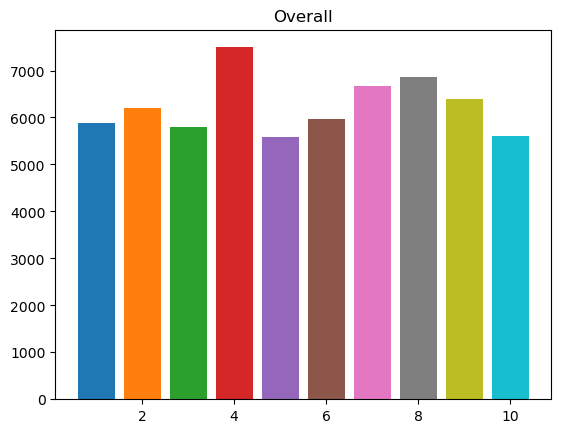

In [69]:
for i in range(10):
    plt.bar(i+1, len(stratified_10_fold[i]))
    plt.title("Overall")
    

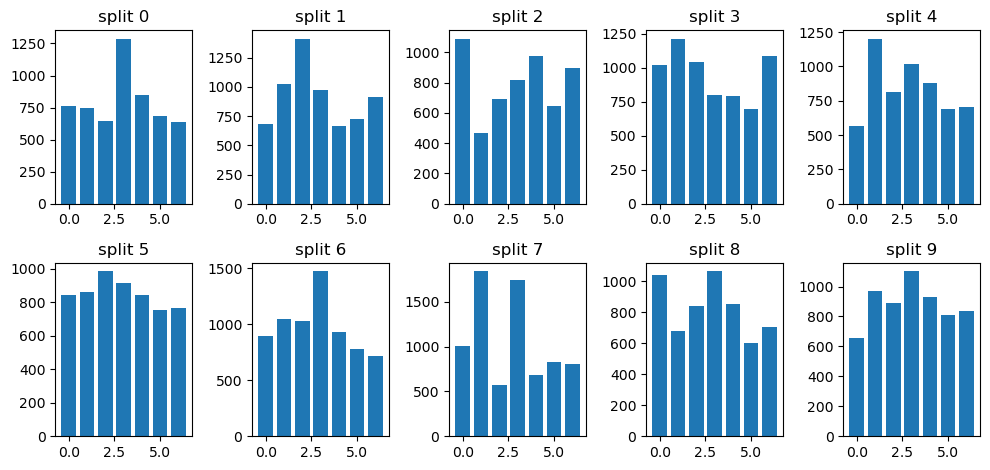

In [74]:
fig, ax= plt.subplots(2,5)
x=0;y=0
for i in range(10):
    tmp= np.unique([j[1] for j in stratified_10_fold[i]], return_counts=True)
    ax[x][y].bar(tmp[0], tmp[1])
    ax[x][y].set_title(f"split {i}")

    if y==4:
        x=1
        y=0
    else:
        y+=1
fig.set_figwidth(10)
plt.tight_layout()

In [66]:
user_fold= pickle.load(open("./HHAR/phone_accel/user_fold-ECDF", "rb"))

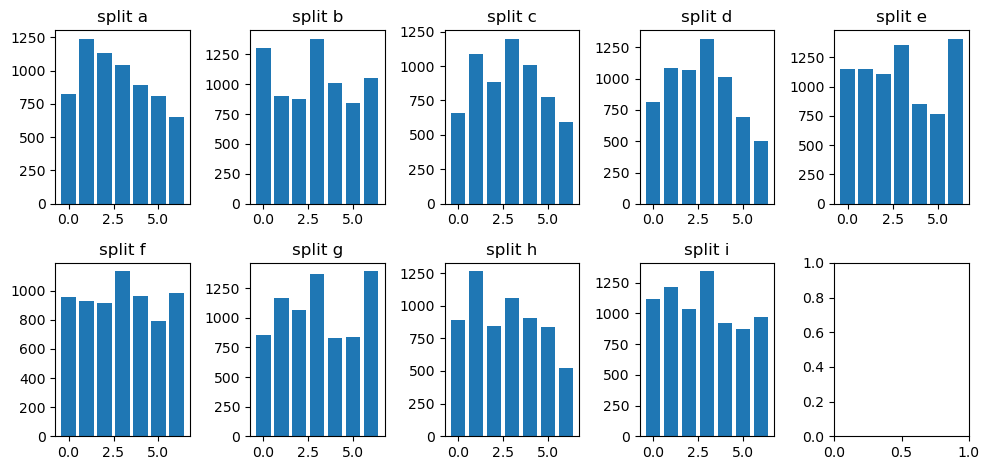

In [67]:
fig, ax= plt.subplots(2,5)
x=0;y=0
for i in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']:
    tmp= np.unique([j[1] for j in user_fold[i]], return_counts=True)
    ax[x][y].bar(tmp[0], tmp[1])
    ax[x][y].set_title(f"split {i}")

    if y==4:
        x=1
        y=0
    else:
        y+=1
fig.set_figwidth(10)
plt.tight_layout()

### Sanity Check
The following 3 blocks should correspond accordingly

In [77]:
# sanity check 
print(f"start {data_indices_dict['nexus4_1-a-bike'][0][0][0]}, end {data_indices_dict['nexus4_1-a-bike'][0][0][-1]}")

start 287141, end 287523


In [87]:
# sanity check
phone_accel_df.iloc[287141:287523+1] # important to have +1 here

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
287141,287141,1424698215675995642,2015-02-23 13:30:15.675995642,a,nexus4,nexus4_1,-7.291199,2.341232,6.313171,bike,0
287142,287142,1424698215682068640,2015-02-23 13:30:15.682068640,a,nexus4,nexus4_1,-7.216217,2.271011,6.346497,bike,0
287143,287143,1424698215686035925,2015-02-23 13:30:15.686035925,a,nexus4,nexus4_1,-7.216217,2.271011,6.346497,bike,0
287144,287144,1424698215691101843,2015-02-23 13:30:15.691101843,a,nexus4,nexus4_1,-7.140045,2.228165,6.264374,bike,0
287145,287145,1424698215696137244,2015-02-23 13:30:15.696137244,a,nexus4,nexus4_1,-7.123383,2.150803,6.133453,bike,0
...,...,...,...,...,...,...,...,...,...,...,...
287519,287518,1424698217573737990,2015-02-23 13:30:17.573737990,a,nexus4,nexus4_1,-8.577789,-0.848465,7.011810,bike,0
287520,287520,1424698217583961378,2015-02-23 13:30:17.583961378,a,nexus4,nexus4_1,-8.545654,-1.035324,7.227234,bike,0
287521,287521,1424698217589393507,2015-02-23 13:30:17.589393507,a,nexus4,nexus4_1,-8.508759,-1.100784,7.266510,bike,0
287522,287522,1424698217593910109,2015-02-23 13:30:17.593910109,a,nexus4,nexus4_1,-8.464722,-1.171005,7.252228,bike,0


In [89]:
#sanity check -- wouldn't always be exactly 2 seconds because winodw size is an average from all 2 secs windows
assert abs(phone_accel_df.iloc[287141]['Creation_Time']-phone_accel_df.iloc[287523]['Creation_Time'])/offset < threshold, "messed up"

In [79]:
#sanity check 
data_dict['nexus4_1-a-bike'][0]

array([[-7.2911987,  2.3412323,  6.3131714],
       [-7.216217 ,  2.2710114,  6.3464966],
       [-7.216217 ,  2.2710114,  6.3464966],
       ...,
       [-8.508759 , -1.1007843,  7.26651  ],
       [-8.464722 , -1.1710052,  7.252228 ],
       [-8.404022 , -1.1781464,  7.310547 ]])

## Phone Gyro

In [7]:
phone_gyro_df= pd.read_csv('./HHAR/Activity recognition exp/Phones_gyroscope.csv')
phone_gyro_df

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,a,nexus4,nexus4_1,stand
4,4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,a,nexus4,nexus4_1,stand
...,...,...,...,...,...,...,...,...,...,...
13932627,11306,1424778269892,79199637493000,-0.046844,0.337667,0.134677,i,s3mini,s3mini_2,bike
13932628,11307,1424778269906,79199651618000,-0.117598,0.221777,0.131749,i,s3mini,s3mini_2,bike
13932629,11308,1424778269920,79199665927000,-0.177617,0.056115,0.095152,i,s3mini,s3mini_2,bike
13932630,11309,1424778269932,79199677489000,-0.195183,-0.124429,0.063191,i,s3mini,s3mini_2,bike


In [8]:
phone_gyro_df['Arrival_Time_datetime']= pd.to_datetime(phone_gyro_df['Arrival_Time'])
phone_gyro_df['Creation_Time_datetime']= pd.to_datetime(phone_gyro_df['Creation_Time'])

In [9]:
temp= np.array( [ -1 for i in range(len(phone_gyro_df)) ] )
gt= ["bike", "sit", "stand", "walk", "stairsup", "stairsdown"]
for label_name, label_num in zip(gt, range(len(gt))):
    for i in np.nonzero((phone_gyro_df['gt']==label_name).to_numpy())[0]:
        temp[i]= label_num
        
for idx in np.nonzero((temp==-1))[0]:
    temp[idx]= label_num +1
    
phone_gyro_df['gt_label']= temp

In [10]:
#phone_gyro_df= phone_gyro_df[['Index', 'Arrival_Time', 'Arrival_Time_datetime', 'Creation_Time', 'Creation_Time_datetime', 'User', 'Model', 'Device', 'x', 'y', 'z', 'gt', 'gt_label']]
phone_gyro_df= phone_gyro_df[['Index', 'Creation_Time', 'Creation_Time_datetime', 'User', 'Model', 'Device', 'x', 'y', 'z', 'gt', 'gt_label']]
phone_gyro_df

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
0,0,1424696631914042029,2015-02-23 13:03:51.914042029,a,nexus4,nexus4_1,0.013748,-0.000626,-0.023376,stand,2
1,1,1424696631919046912,2015-02-23 13:03:51.919046912,a,nexus4,nexus4_1,0.014816,-0.001694,-0.022308,stand,2
2,2,1424696631924051794,2015-02-23 13:03:51.924051794,a,nexus4,nexus4_1,0.015884,-0.001694,-0.021240,stand,2
3,3,1424696631929117712,2015-02-23 13:03:51.929117712,a,nexus4,nexus4_1,0.016953,-0.003830,-0.020172,stand,2
4,4,1424696631934214148,2015-02-23 13:03:51.934214148,a,nexus4,nexus4_1,0.015884,-0.007034,-0.020172,stand,2
...,...,...,...,...,...,...,...,...,...,...,...
13932627,11306,79199637493000,1970-01-01 21:59:59.637493000,i,s3mini,s3mini_2,-0.046844,0.337667,0.134677,bike,0
13932628,11307,79199651618000,1970-01-01 21:59:59.651618000,i,s3mini,s3mini_2,-0.117598,0.221777,0.131749,bike,0
13932629,11308,79199665927000,1970-01-01 21:59:59.665927000,i,s3mini,s3mini_2,-0.177617,0.056115,0.095152,bike,0
13932630,11309,79199677489000,1970-01-01 21:59:59.677489000,i,s3mini,s3mini_2,-0.195183,-0.124429,0.063191,bike,0


## Scaling

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler= MinMaxScaler()

# scaled based on device and gt_label
# for device in np.unique(phone_accel_df['Device']):
#     for i in np.unique(phone_accel_df['gt_label']):
#         phone_accel_df.loc[(phone_accel_df["Device"]==device) & (phone_accel_df["gt_label"]==i), ["x", "y", "z"]]= scaler.fit_transform( phone_accel_df[(phone_accel_df["Device"]==device) & (phone_accel_df["gt_label"]==i) ][["x", "y", "z"]] )

    
# scaled based on device
for device in np.unique(phone_gyro_df['Device']):
    phone_gyro_df.loc[(phone_gyro_df["Device"]==device), ["x", "y", "z"]]= scaler.fit_transform( phone_gyro_df[(phone_gyro_df["Device"]==device) ][["x", "y", "z"]] )


In [12]:
phone_gyro_dict= sequence_extraction(phone_gyro_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13932632/13932632 [07:43<00:00, 30029.04it/s]


In [13]:
# # Discarding sequences below a certain threshold length
# phone_gyro_dict={}
# for key in np.unique(phone_gyro_device_user_gt[:]):
#     phone_gyro_dict[key]={}
# discard_threshold= 1
# for i, j, k in zip(phone_gyro_starts, phone_gyro_lengths[:], phone_gyro_device_user_gt):
#     if j>discard_threshold:
#         phone_gyro_dict[k][i]= j
#         tmp= "OK"
#     else:
#         tmp= "DISCARD"
#     print(k, i, j, tmp)


nexus4_1-a-2 0 772 OK
nexus4_1-a-2 771 669 OK
nexus4_1-a-2 1440 761 OK
nexus4_1-a-2 2201 22440 OK
nexus4_1-a-2 24641 35 OK
nexus4_1-a-2 24676 29689 OK
nexus4_1-a-2 54365 801 OK
nexus4_1-a-6 55166 665 OK
nexus4_1-a-1 55831 734 OK
nexus4_1-a-1 56565 59218 OK
nexus4_1-a-6 115783 11776 OK
nexus4_1-a-6 127559 2 OK
nexus4_1-a-6 127561 4640 OK
nexus4_1-a-6 132201 3024 OK
nexus4_1-a-3 135225 1786 OK
nexus4_1-a-3 137011 3456 OK
nexus4_1-a-3 140467 4075 OK
nexus4_1-a-3 144542 25598 OK
nexus4_1-a-3 170140 15415 OK
nexus4_1-a-3 185555 616 OK
nexus4_1-a-6 186171 2416 OK
nexus4_1-a-6 188587 1318 OK
nexus4_1-a-4 189905 1838 OK
nexus4_1-a-5 191743 5232 OK
nexus4_1-a-5 196975 5548 OK
nexus4_1-a-4 202523 8730 OK
nexus4_1-a-4 211253 751 OK
nexus4_1-a-5 212004 1976 OK
nexus4_1-a-5 213980 1 DISCARD
nexus4_1-a-5 213981 160 OK
nexus4_1-a-5 214141 6521 OK
nexus4_1-a-4 220662 4954 OK
nexus4_1-a-4 225616 5446 OK
nexus4_1-a-5 231062 105 OK
nexus4_1-a-5 231167 3740 OK
nexus4_1-a-5 234907 5033 OK
nexus4_1-a-4 2399

In [97]:
average_win_len, windows_dict= find_average_length(phone_gyro_df, phone_gyro_dict)

nexus4_1-a-bike


In [109]:
# Creating windows based on average window size from fused sequences
window_size=average_win_len
data_indices_dict={}
for key, start_length_dict in phone_gyro_dict.items():
    data_indices_dict[key]= []

    for start, length in start_length_dict.items():
        tmp_list=[]
        for i in range(start, start+length-window_size, window_size//2):
            tmp_list.append(np.arange(i, i+window_size))
        if len(tmp_list)>0:
            data_indices_dict[key].append(tmp_list)
        

In [110]:
data_dict={}

for key, idx_lists in data_indices_dict.items():
        data_dict[key]=[]
        for idx_list in idx_lists:
            tmp_list=[]
            for indices in idx_list:
                tmp_list.append(phone_gyro_df.iloc[indices][["x", "y", "z"]].to_numpy())
            data_dict[key].append(tmp_list)
                
        

### Sanity Check
The following 3 blocks should correspond accordingly

In [111]:
# sanity check 
print(f"start {data_indices_dict['nexus4_1-a-bike'][0][0][0]}, end {data_indices_dict['nexus4_1-a-bike'][0][0][-1]}")

start 287147, end 287528


In [113]:
# sanity check
phone_gyro_df.iloc[287147:287528+1] # important to have +1 here

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
287147,287148,1424698215682862097,2015-02-23 13:30:15.682862097,a,nexus4,nexus4_1,0.459595,-0.177521,0.104370,bike,0
287148,287147,1424698215676819617,2015-02-23 13:30:15.676819617,a,nexus4,nexus4_1,0.472412,-0.129456,0.097961,bike,0
287149,287149,1424698215686859900,2015-02-23 13:30:15.686859900,a,nexus4,nexus4_1,0.444641,-0.221313,0.103302,bike,0
287150,287150,1424698215691925818,2015-02-23 13:30:15.691925818,a,nexus4,nexus4_1,0.427551,-0.265106,0.101166,bike,0
287151,287151,1424698215696961218,2015-02-23 13:30:15.696961218,a,nexus4,nexus4_1,0.410461,-0.297150,0.093689,bike,0
...,...,...,...,...,...,...,...,...,...,...,...
287524,287525,1424698217580207716,2015-02-23 13:30:17.580207716,a,nexus4,nexus4_1,-0.485687,-0.292877,0.116119,bike,0
287525,287524,1424698217574500929,2015-02-23 13:30:17.574500929,a,nexus4,nexus4_1,-0.440826,-0.309967,0.068054,bike,0
287526,287526,1424698217585121046,2015-02-23 13:30:17.585121046,a,nexus4,nexus4_1,-0.507050,-0.287537,0.140686,bike,0
287527,287527,1424698217590156447,2015-02-23 13:30:17.590156447,a,nexus4,nexus4_1,-0.525207,-0.288605,0.165253,bike,0


In [137]:
#sanity check -- wouldn't always be exactly 2 seconds because winodw size is an average from all 2 secs windows
assert abs(phone_gyro_df.iloc[287147]['Creation_Time']-phone_gyro_df.iloc[287528]['Creation_Time'])/offset < threshold, "messed up"

In [112]:
#sanity check 
data_dict['nexus4_1-a-bike'][0]

array([[ 0.45959473, -0.17752075,  0.10437012],
       [ 0.4724121 , -0.12945557,  0.09796143],
       [ 0.4446411 , -0.22131348,  0.103302  ],
       ...,
       [-0.50704956, -0.28753662,  0.14068604],
       [-0.5252075 , -0.28860474,  0.16525269],
       [-0.5252075 , -0.28860474,  0.16525269]])

## Sensor Fusion

## Phone Accelerometer

In [4]:
phone_accel_df= pd.read_csv('./HHAR/Activity recognition exp/Phones_accelerometer.csv')
phone_accel_df

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand
...,...,...,...,...,...,...,...,...,...,...
13062470,129048,1424778553315,92263781761000,1.379043,0.153227,9.959755,i,samsungold,samsungold_2,bike
13062471,129049,1424778553346,92263812248000,1.379043,0.153227,9.806528,i,samsungold,samsungold_2,bike
13062472,129050,1424778553366,92263832267000,1.532270,0.153227,9.806528,i,samsungold,samsungold_2,bike
13062473,129051,1424778553386,92263852409000,1.532270,0.000000,9.959755,i,samsungold,samsungold_2,bike


In [5]:
phone_accel_df['Arrival_Time_datetime']= pd.to_datetime(phone_accel_df['Arrival_Time'])
phone_accel_df['Creation_Time_datetime']= pd.to_datetime(phone_accel_df['Creation_Time'])

In [6]:
temp= np.array( [ -1 for i in range(len(phone_accel_df)) ] )
gt= ["bike", "sit", "stand", "walk", "stairsup", "stairsdown"]
for label_name, label_num in zip(gt, range(len(gt))):
    for i in np.nonzero((phone_accel_df['gt']==label_name).to_numpy())[0]:
        temp[i]= label_num
        
for idx in np.nonzero((temp==-1))[0]: # NaN
    temp[idx]= label_num +1
    
phone_accel_df['gt_label']= temp

In [7]:
# phone_accel_df= phone_accel_df[['Index', 'Arrival_Time', 'Arrival_Time_datetime', 'Creation_Time', 'Creation_Time_datetime', 'User', 'Model', 'Device', 'x', 'y', 'z', 'gt', 'gt_label']]
phone_accel_df= phone_accel_df[['Index', 'Creation_Time', 'Creation_Time_datetime', 'User', 'Model', 'Device', 'x', 'y', 'z', 'gt', 'gt_label']]
phone_accel_df

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
0,0,1424696631913248572,2015-02-23 13:03:51.913248572,a,nexus4,nexus4_1,-5.958191,0.688065,8.135345,stand,2
1,1,1424696631918283972,2015-02-23 13:03:51.918283972,a,nexus4,nexus4_1,-5.952240,0.670212,8.136536,stand,2
2,2,1424696631923288855,2015-02-23 13:03:51.923288855,a,nexus4,nexus4_1,-5.995087,0.653549,8.204376,stand,2
3,3,1424696631928385290,2015-02-23 13:03:51.928385290,a,nexus4,nexus4_1,-5.942718,0.676163,8.128204,stand,2
4,4,1424696631933420691,2015-02-23 13:03:51.933420691,a,nexus4,nexus4_1,-5.991516,0.641647,8.135345,stand,2
...,...,...,...,...,...,...,...,...,...,...,...
13062470,129048,92263781761000,1970-01-02 01:37:43.781761000,i,samsungold,samsungold_2,1.379043,0.153227,9.959755,bike,0
13062471,129049,92263812248000,1970-01-02 01:37:43.812248000,i,samsungold,samsungold_2,1.379043,0.153227,9.806528,bike,0
13062472,129050,92263832267000,1970-01-02 01:37:43.832267000,i,samsungold,samsungold_2,1.532270,0.153227,9.806528,bike,0
13062473,129051,92263852409000,1970-01-02 01:37:43.852409000,i,samsungold,samsungold_2,1.532270,0.000000,9.959755,bike,0


### Scaling

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler= MinMaxScaler()

# scaled based on device and gt_label
# for device in np.unique(phone_accel_df['Device']):
#     for i in np.unique(phone_accel_df['gt_label']):
#         phone_accel_df.loc[(phone_accel_df["Device"]==device) & (phone_accel_df["gt_label"]==i), ["x", "y", "z"]]= scaler.fit_transform( phone_accel_df[(phone_accel_df["Device"]==device) & (phone_accel_df["gt_label"]==i) ][["x", "y", "z"]] )

    
# scaled based on device
for device in np.unique(phone_accel_df['Device']):
    phone_accel_df.loc[(phone_accel_df["Device"]==device), ["x", "y", "z"]]= scaler.fit_transform( phone_accel_df[(phone_accel_df["Device"]==device) ][["x", "y", "z"]] )


In [11]:
phone_accel_dict= sequence_extraction(phone_accel_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13062474/13062474 [07:12<00:00, 30202.77it/s]


nexus4_1-a-2 0 771 OK
nexus4_1-a-2 771 670 OK
nexus4_1-a-2 1441 761 OK
nexus4_1-a-2 2202 22438 OK
nexus4_1-a-2 24640 1 DISCARD
nexus4_1-a-2 24641 1 DISCARD
nexus4_1-a-2 24642 32 OK
nexus4_1-a-2 24674 29687 OK
nexus4_1-a-2 54361 802 OK
nexus4_1-a-6 55163 665 OK
nexus4_1-a-1 55828 734 OK
nexus4_1-a-1 56562 59220 OK
nexus4_1-a-6 115782 11775 OK
nexus4_1-a-6 127557 2 OK
nexus4_1-a-6 127559 4641 OK
nexus4_1-a-6 132200 3024 OK
nexus4_1-a-3 135224 1786 OK
nexus4_1-a-3 137010 3456 OK
nexus4_1-a-3 140466 4075 OK
nexus4_1-a-3 144541 25597 OK
nexus4_1-a-3 170138 15414 OK
nexus4_1-a-3 185552 615 OK
nexus4_1-a-6 186167 2416 OK
nexus4_1-a-6 188583 1318 OK
nexus4_1-a-4 189901 1839 OK
nexus4_1-a-5 191740 5230 OK
nexus4_1-a-5 196970 5545 OK
nexus4_1-a-4 202515 8732 OK
nexus4_1-a-4 211247 750 OK
nexus4_1-a-5 211997 1976 OK
nexus4_1-a-5 213973 1 DISCARD
nexus4_1-a-5 213974 160 OK
nexus4_1-a-5 214134 6520 OK
nexus4_1-a-4 220654 4956 OK
nexus4_1-a-4 225610 5448 OK
nexus4_1-a-5 231058 103 OK
nexus4_1-a-5 23

In [ ]:
# # Discarding sequences below a certain threshold length
# phone_accel_dict={}
# for key in np.unique(phone_accel_device_user_gt[:]):
#     phone_accel_dict[key]={}

# discard_threshold=1
# for i, j, k in zip(phone_accel_starts, phone_accel_lengths[:], phone_accel_device_user_gt[:]):
#     if j>discard_threshold:
#         phone_accel_dict[k][i]= j
#         tmp= "OK"
#     else:
#         tmp= "DISCARD"
#     print(k, i, j, tmp)
    

## Phone Gyro

In [12]:
phone_gyro_df= pd.read_csv('./HHAR/Activity recognition exp/Phones_gyroscope.csv')
phone_gyro_df

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,a,nexus4,nexus4_1,stand
4,4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,a,nexus4,nexus4_1,stand
...,...,...,...,...,...,...,...,...,...,...
13932627,11306,1424778269892,79199637493000,-0.046844,0.337667,0.134677,i,s3mini,s3mini_2,bike
13932628,11307,1424778269906,79199651618000,-0.117598,0.221777,0.131749,i,s3mini,s3mini_2,bike
13932629,11308,1424778269920,79199665927000,-0.177617,0.056115,0.095152,i,s3mini,s3mini_2,bike
13932630,11309,1424778269932,79199677489000,-0.195183,-0.124429,0.063191,i,s3mini,s3mini_2,bike


In [13]:
phone_gyro_df['Arrival_Time_datetime']= pd.to_datetime(phone_gyro_df['Arrival_Time'])
phone_gyro_df['Creation_Time_datetime']= pd.to_datetime(phone_gyro_df['Creation_Time'])

In [14]:
temp= np.array( [ -1 for i in range(len(phone_gyro_df)) ] )
gt= ["bike", "sit", "stand", "walk", "stairsup", "stairsdown"]
for label_name, label_num in zip(gt, range(len(gt))):
    for i in np.nonzero((phone_gyro_df['gt']==label_name).to_numpy())[0]:
        temp[i]= label_num
        
for idx in np.nonzero((temp==-1))[0]:
    temp[idx]= label_num +1
    
phone_gyro_df['gt_label']= temp

In [15]:
phone_gyro_df= phone_gyro_df[['Index', 'Creation_Time', 'Creation_Time_datetime', 'User', 'Model', 'Device', 'x', 'y', 'z', 'gt', 'gt_label']]
phone_gyro_df

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
0,0,1424696631914042029,2015-02-23 13:03:51.914042029,a,nexus4,nexus4_1,0.013748,-0.000626,-0.023376,stand,2
1,1,1424696631919046912,2015-02-23 13:03:51.919046912,a,nexus4,nexus4_1,0.014816,-0.001694,-0.022308,stand,2
2,2,1424696631924051794,2015-02-23 13:03:51.924051794,a,nexus4,nexus4_1,0.015884,-0.001694,-0.021240,stand,2
3,3,1424696631929117712,2015-02-23 13:03:51.929117712,a,nexus4,nexus4_1,0.016953,-0.003830,-0.020172,stand,2
4,4,1424696631934214148,2015-02-23 13:03:51.934214148,a,nexus4,nexus4_1,0.015884,-0.007034,-0.020172,stand,2
...,...,...,...,...,...,...,...,...,...,...,...
13932627,11306,79199637493000,1970-01-01 21:59:59.637493000,i,s3mini,s3mini_2,-0.046844,0.337667,0.134677,bike,0
13932628,11307,79199651618000,1970-01-01 21:59:59.651618000,i,s3mini,s3mini_2,-0.117598,0.221777,0.131749,bike,0
13932629,11308,79199665927000,1970-01-01 21:59:59.665927000,i,s3mini,s3mini_2,-0.177617,0.056115,0.095152,bike,0
13932630,11309,79199677489000,1970-01-01 21:59:59.677489000,i,s3mini,s3mini_2,-0.195183,-0.124429,0.063191,bike,0


## Scaling

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler= MinMaxScaler()

# scaled based on device and gt_label
# for device in np.unique(phone_accel_df['Device']):
#     for i in np.unique(phone_accel_df['gt_label']):
#         phone_accel_df.loc[(phone_accel_df["Device"]==device) & (phone_accel_df["gt_label"]==i), ["x", "y", "z"]]= scaler.fit_transform( phone_accel_df[(phone_accel_df["Device"]==device) & (phone_accel_df["gt_label"]==i) ][["x", "y", "z"]] )

    
# scaled based on device
for device in np.unique(phone_gyro_df['Device']):
    phone_gyro_df.loc[(phone_gyro_df["Device"]==device), ["x", "y", "z"]]= scaler.fit_transform( phone_gyro_df[(phone_gyro_df["Device"]==device) ][["x", "y", "z"]] )


In [17]:
phone_gyro_dict= sequence_extraction(phone_gyro_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13932631/13932631 [07:41<00:00, 30160.23it/s]


nexus4_1-a-2 0 771 OK
nexus4_1-a-2 771 669 OK
nexus4_1-a-2 1440 761 OK
nexus4_1-a-2 2201 22440 OK
nexus4_1-a-2 24641 35 OK
nexus4_1-a-2 24676 29689 OK
nexus4_1-a-2 54365 801 OK
nexus4_1-a-6 55166 665 OK
nexus4_1-a-1 55831 734 OK
nexus4_1-a-1 56565 59218 OK
nexus4_1-a-6 115783 11776 OK
nexus4_1-a-6 127559 2 OK
nexus4_1-a-6 127561 4640 OK
nexus4_1-a-6 132201 3024 OK
nexus4_1-a-3 135225 1786 OK
nexus4_1-a-3 137011 3456 OK
nexus4_1-a-3 140467 4075 OK
nexus4_1-a-3 144542 25598 OK
nexus4_1-a-3 170140 15415 OK
nexus4_1-a-3 185555 616 OK
nexus4_1-a-6 186171 2416 OK
nexus4_1-a-6 188587 1318 OK
nexus4_1-a-4 189905 1838 OK
nexus4_1-a-5 191743 5232 OK
nexus4_1-a-5 196975 5548 OK
nexus4_1-a-4 202523 8730 OK
nexus4_1-a-4 211253 751 OK
nexus4_1-a-5 212004 1976 OK
nexus4_1-a-5 213980 1 DISCARD
nexus4_1-a-5 213981 160 OK
nexus4_1-a-5 214141 6521 OK
nexus4_1-a-4 220662 4954 OK
nexus4_1-a-4 225616 5446 OK
nexus4_1-a-5 231062 105 OK
nexus4_1-a-5 231167 3740 OK
nexus4_1-a-5 234907 5033 OK
nexus4_1-a-4 2399

In [136]:
# checking activity lengths between accel and gyros
# print(len(phone_accel_dict['s3_1-g-bike'].items()), len(phone_gyro_dict['s3_1-g-bike'].items()))
# for (accel_start, accel_lengths), (gyro_start, gyro_lengths) in zip(phone_accel_dict['s3_1-g-bike'].items(), phone_gyro_dict['s3_1-g-bike'].items()):
#         print(accel_lengths, gyro_lengths, "      ", accel_start, gyro_start)
        

25 26
1182 2412        9481613 10171070
354 836        9482850 10173482
123 1047        9483204 10174318
380 219        9483327 10175365
102 2909        9483707 10175584
1419 846        9483809 10178493
410 237        9485228 10179339
109 3036        9485638 10179576
1476 1681        9485747 10182612
825 887        9487223 10184293
419 3705        9488048 10185180
1814 124        9488467 10188885
738 1535        9490338 10189009
1089 2239        9491076 10190544
571 1169        9492165 10192783
400 831        9492736 10193952
2559 5215        9493136 10194783
720 1477        9495695 10199998
366 111        9496466 10201475
2286 755        9496832 10201586
349 4721        9499172 10202341
489 862        9499521 10207062
2142 1024        9500010 10207924
414 4385        9502152 10208948
408 860        9502566 10213333


In [18]:
# extract keys present in both gyro and accel -- don't always have the same keys
keys_in_both=[]
tmp_list= list(phone_gyro_dict.keys())
for key in np.unique(list(phone_accel_dict.keys())):
    try:
        tmp_list.index(key)
        if (len(phone_gyro_dict[key]) > 0) & (len(phone_accel_dict[key]) > 0):
            keys_in_both.append(key)
    except ValueError:
        continue

# fusion of accel and gyro indices 
fusion_dict={}
fusion_time_delta_threshold= 0.5
offset= 1e9
# for (accel_key, accel_dict), (gyro_key, gyro_dict) in zip(phone_accel_dict.items(), phone_gyro_dict.items()):
for key in keys_in_both:
    print(f"{key}...")
    fusion_dict[key]=[]
    accel_dict_list= list(phone_accel_dict[key].items()) # device-user-label : start : length
    gyro_dict_list= list(phone_gyro_dict[key].items()) # device-user-label : start : length
    
    accel_total_instances= sum([i[1] for i in accel_dict_list])
    gyro_total_instances= sum([i[1] for i in gyro_dict_list])
    
    accel_total_count=0
    gyro_total_count=0
    
    accel_list_count=0
    gyro_list_count=0
    
    accel_start, accel_length= accel_dict_list[accel_list_count]
    gyro_start, gyro_length= gyro_dict_list[gyro_list_count]
    
    gyro_count=0
    accel_count=0
    
    tmp_list=[]
    
    gyro_flag=0
    accel_flag=0

    while (gyro_total_count<gyro_total_instances) | (accel_total_count<accel_total_instances):
                   
        # if duration is within fusion_time_delta_threshold
        if abs(phone_gyro_df['Creation_Time'].iloc[gyro_start+gyro_count]-phone_accel_df['Creation_Time'].iloc[accel_start+accel_count])/offset <= fusion_time_delta_threshold:
            tmp_list.append((accel_start+accel_count, gyro_start+gyro_count))
            
            accel_count += 1
            gyro_count += 1
            
            accel_total_count += 1
            gyro_total_count += 1
            
        # if duration is not within fusion_time_delta_threshold, but both sensors are still on the same corresponding sequence
        elif accel_list_count==gyro_list_count:

            # exhaust current sequence first
            if phone_gyro_df['Creation_Time'].iloc[gyro_start+gyro_count] > phone_accel_df['Creation_Time'].iloc[accel_start+accel_count]:
                accel_count += 1
                accel_total_count += 1
                        
            else:
                gyro_count += 1
                gyro_total_count += 1


        # if duration is not within fusion_time_delta_threshold, and sensors are not on the same corresponding sequence
        else:
        
            if accel_list_count > gyro_list_count:
                gyro_count += 1
                gyro_total_count += 1
            else:
                accel_count += 1
                accel_total_count += 1


        # if sequence for gyro has been exhausted
        if gyro_count==gyro_length:
            gyro_list_count+=1
            gyro_flag=1
            
            # if there are still sequences remaining 
            if gyro_list_count<len(gyro_dict_list):
                gyro_count=0
                gyro_start, gyro_length= gyro_dict_list[gyro_list_count]
            else:
                gyro_list_count=len(accel_dict_list)+1
            
        # if sequence for accel has been exhausted
        if accel_count==accel_length:
            accel_list_count+=1
            accel_flag=1
            
            # if there are still sequences remaining
            if accel_list_count<len(accel_dict_list):
                accel_count=0
                accel_start, accel_length= accel_dict_list[accel_list_count]
            else:
            # if there are no more sequences remaining
                accel_list_count=len(gyro_dict_list)+1
        
        # when both sequences have been exhausted and fused as best as possible
        if accel_flag & gyro_flag:
            accel_flag=0
            gyro_flag=0
            if len(tmp_list)>0:
                fusion_dict[key].append(tmp_list)
                tmp_list=[]
                

    
    print("Done", accel_total_count, gyro_total_count, len(fusion_dict[key]))
    print()

nexus4_1-a-0...
Done 36673 36673 29

nexus4_1-a-1...
Done 59954 59954 2

nexus4_1-a-2...
Done 55161 55166 7

nexus4_1-a-3...
Done 50944 50946 6

nexus4_1-a-4...
Done 43174 43169 7

nexus4_1-a-5...
Done 44989 44998 14

nexus4_1-a-6...
Done 32916 32915 14

nexus4_1-b-0...
Done 61886 61889 20

nexus4_1-b-1...
Done 47942 47944 15

nexus4_1-b-2...
Done 43657 43656 21

nexus4_1-b-3...
Done 64379 64373 2

nexus4_1-b-4...
Done 47457 47452 19

nexus4_1-b-5...
Done 41875 41877 20

nexus4_1-b-6...
Done 56073 56073 18

nexus4_1-c-0...
Done 30530 30528 34

nexus4_1-c-1...
Done 53073 53072 6

nexus4_1-c-2...
Done 38812 38816 29

nexus4_1-c-3...
Done 55398 55398 6

nexus4_1-c-4...
Done 50720 50720 6

nexus4_1-c-5...
Done 39242 39241 24

nexus4_1-c-6...
Done 31659 31656 18

nexus4_1-d-0...
Done 37469 37470 15

nexus4_1-d-1...
Done 52948 52943 7

nexus4_1-d-2...
Done 52178 52180 6

nexus4_1-d-3...
Done 61878 61878 1

nexus4_1-d-4...
Done 51217 51209 8

nexus4_1-d-5...
Done 38483 38481 14

nexus4_1-d-6.

Done 22940 46946 23

s3_2-h-6...
Done 13806 28342 16

s3_2-i-0...
Done 28597 58424 12

s3_2-i-1...
Done 29210 59391 1

s3_2-i-2...
Done 25745 52539 10

s3_2-i-3...
Done 30501 62072 3

s3_2-i-4...
Done 23223 47681 9

s3_2-i-5...
Done 21696 44445 25

s3_2-i-6...
Done 23421 48073 13

s3mini_1-a-0...
Done 22211 22210 4

s3mini_1-a-1...
Done 29983 29983 1

s3mini_1-a-2...
Done 26165 26165 3

s3mini_1-a-3...
Done 23029 23027 3

s3mini_1-a-4...
Done 21548 21544 7

s3mini_1-a-5...
Done 20216 20217 7

s3mini_1-a-6...
Done 16169 16163 6

s3mini_1-b-0...
Done 29793 29806 3

s3mini_1-b-1...
Done 25182 25178 3

s3mini_1-b-2...
Done 23790 23791 2

s3mini_1-b-3...
Done 31474 31474 1

s3mini_1-b-4...
Done 25531 25539 6

s3mini_1-b-5...
Done 20553 20553 5

s3mini_1-b-6...
Done 24159 24161 7

s3mini_1-c-0...
Done 17196 17203 5

s3mini_1-c-1...
Done 27191 27191 1

s3mini_1-c-2...
Done 20429 20427 3

s3mini_1-c-3...
Done 28084 28084 1

s3mini_1-c-4...
Done 24249 24254 4

s3mini_1-c-5...
Done 17947 17953 7

In [19]:
# finding indices of approximate duration
# purpose 1: group such indices together for further processing later
# purpose 2: try to find the average length of indices for approximate duration

# default using he timestamp of accel to fuse 

threshold= 2 
offset= 1e9
lengths_for_window= []

windows_dict={}
for key, sequences in fusion_dict.items():
    print(key)
    windows_dict[key]=[]
    for sequence in sequences:
        
        seq_start=sequence[0][0] # the accel timestamp from the first index of the sequence
        duration=0
        count=1
        last_window_index=0
        window_list=[]
        for (a_i, g_i) in sequence[1:]:
            duration += abs(phone_accel_df['Creation_Time'].iloc[a_i]-phone_accel_df['Creation_Time'].iloc[seq_start])/offset
            seq_start= a_i
                   
            if duration > threshold:

                duration=0
                lengths_for_window.append(count)
                window_list.append((last_window_index, last_window_index+count))
                last_window_index=last_window_index+count
                count=1     
            else:
                count += 1

        windows_dict[key].append(window_list) # could have empty lists

nexus4_1-a-0
nexus4_1-a-1
nexus4_1-a-2
nexus4_1-a-3
nexus4_1-a-4
nexus4_1-a-5
nexus4_1-a-6
nexus4_1-b-0
nexus4_1-b-1
nexus4_1-b-2
nexus4_1-b-3
nexus4_1-b-4
nexus4_1-b-5
nexus4_1-b-6
nexus4_1-c-0
nexus4_1-c-1
nexus4_1-c-2
nexus4_1-c-3
nexus4_1-c-4
nexus4_1-c-5
nexus4_1-c-6
nexus4_1-d-0
nexus4_1-d-1
nexus4_1-d-2
nexus4_1-d-3
nexus4_1-d-4
nexus4_1-d-5
nexus4_1-d-6
nexus4_1-e-0
nexus4_1-e-1
nexus4_1-e-2
nexus4_1-e-3
nexus4_1-e-4
nexus4_1-e-5
nexus4_1-e-6
nexus4_1-f-0
nexus4_1-f-1
nexus4_1-f-2
nexus4_1-f-3
nexus4_1-f-4
nexus4_1-f-5
nexus4_1-f-6
nexus4_1-g-0
nexus4_1-g-1
nexus4_1-g-2
nexus4_1-g-3
nexus4_1-g-4
nexus4_1-g-5
nexus4_1-g-6
nexus4_1-h-0
nexus4_1-h-1
nexus4_1-h-2
nexus4_1-h-3
nexus4_1-h-4
nexus4_1-h-5
nexus4_1-h-6
nexus4_1-i-0
nexus4_1-i-1
nexus4_1-i-2
nexus4_1-i-3
nexus4_1-i-4
nexus4_1-i-5
nexus4_1-i-6
nexus4_2-a-0
nexus4_2-a-1
nexus4_2-a-2
nexus4_2-a-3
nexus4_2-a-4
nexus4_2-a-5
nexus4_2-a-6
nexus4_2-b-0
nexus4_2-b-1
nexus4_2-b-2
nexus4_2-b-3
nexus4_2-b-4
nexus4_2-b-5
nexus4_2-b-6

In [21]:
np.mean(lengths_for_window)

261.7162371343997

In [25]:
# Creating windows based on average window length from fused sequences
window_size=int(round(np.mean(lengths_for_window)))
data_indices_dict={}
for key, sequences in fusion_dict.items():
    data_indices_dict[key]= []

    for sequence in sequences:
        tmp_list=[]
        for i in range(0, len(sequence)-window_size, window_size//2):
            tmp_list.append(sequence[i:i+window_size])
        if len(tmp_list)>0:
            data_indices_dict[key].append(tmp_list)
        

In [26]:
data_dict={}

for key, idx_lists in data_indices_dict.items():
        data_dict[key]=[]
        print(key, end="")
        for idx_list in idx_lists:
            tmp_list=[]
            for indices in idx_list:
                accel_indices= [i[0] for i in indices]
                gyro_indices= [i[1] for i in indices]
                tmp_list.append(np.concatenate([phone_accel_df.iloc[accel_indices][["x", "y", "z"]].to_numpy(), phone_gyro_df.iloc[gyro_indices][["x", "y", "z"]].to_numpy()], axis=1))
            data_dict[key].append(tmp_list)
        print(" Done")
        

nexus4_1-a-0 Done
nexus4_1-a-1 Done
nexus4_1-a-2 Done
nexus4_1-a-3 Done
nexus4_1-a-4 Done
nexus4_1-a-5 Done
nexus4_1-a-6 Done
nexus4_1-b-0 Done
nexus4_1-b-1 Done
nexus4_1-b-2 Done
nexus4_1-b-3 Done
nexus4_1-b-4 Done
nexus4_1-b-5 Done
nexus4_1-b-6 Done
nexus4_1-c-0 Done
nexus4_1-c-1 Done
nexus4_1-c-2 Done
nexus4_1-c-3 Done
nexus4_1-c-4 Done
nexus4_1-c-5 Done
nexus4_1-c-6 Done
nexus4_1-d-0 Done
nexus4_1-d-1 Done
nexus4_1-d-2 Done
nexus4_1-d-3 Done
nexus4_1-d-4 Done
nexus4_1-d-5 Done
nexus4_1-d-6 Done
nexus4_1-e-0 Done
nexus4_1-e-1 Done
nexus4_1-e-2 Done
nexus4_1-e-3 Done
nexus4_1-e-4 Done
nexus4_1-e-5 Done
nexus4_1-e-6 Done
nexus4_1-f-0 Done
nexus4_1-f-1 Done
nexus4_1-f-2 Done
nexus4_1-f-3 Done
nexus4_1-f-4 Done
nexus4_1-f-5 Done
nexus4_1-f-6 Done
nexus4_1-g-0 Done
nexus4_1-g-1 Done
nexus4_1-g-2 Done
nexus4_1-g-3 Done
nexus4_1-g-4 Done
nexus4_1-g-5 Done
nexus4_1-g-6 Done
nexus4_1-h-0 Done
nexus4_1-h-1 Done
nexus4_1-h-2 Done
nexus4_1-h-3 Done
nexus4_1-h-4 Done
nexus4_1-h-5 Done
nexus4_1-h

### Sanity Check

In [27]:
data_indices_dict.keys()

dict_keys(['nexus4_1-a-0', 'nexus4_1-a-1', 'nexus4_1-a-2', 'nexus4_1-a-3', 'nexus4_1-a-4', 'nexus4_1-a-5', 'nexus4_1-a-6', 'nexus4_1-b-0', 'nexus4_1-b-1', 'nexus4_1-b-2', 'nexus4_1-b-3', 'nexus4_1-b-4', 'nexus4_1-b-5', 'nexus4_1-b-6', 'nexus4_1-c-0', 'nexus4_1-c-1', 'nexus4_1-c-2', 'nexus4_1-c-3', 'nexus4_1-c-4', 'nexus4_1-c-5', 'nexus4_1-c-6', 'nexus4_1-d-0', 'nexus4_1-d-1', 'nexus4_1-d-2', 'nexus4_1-d-3', 'nexus4_1-d-4', 'nexus4_1-d-5', 'nexus4_1-d-6', 'nexus4_1-e-0', 'nexus4_1-e-1', 'nexus4_1-e-2', 'nexus4_1-e-3', 'nexus4_1-e-4', 'nexus4_1-e-5', 'nexus4_1-e-6', 'nexus4_1-f-0', 'nexus4_1-f-1', 'nexus4_1-f-2', 'nexus4_1-f-3', 'nexus4_1-f-4', 'nexus4_1-f-5', 'nexus4_1-f-6', 'nexus4_1-g-0', 'nexus4_1-g-1', 'nexus4_1-g-2', 'nexus4_1-g-3', 'nexus4_1-g-4', 'nexus4_1-g-5', 'nexus4_1-g-6', 'nexus4_1-h-0', 'nexus4_1-h-1', 'nexus4_1-h-2', 'nexus4_1-h-3', 'nexus4_1-h-4', 'nexus4_1-h-5', 'nexus4_1-h-6', 'nexus4_1-i-0', 'nexus4_1-i-1', 'nexus4_1-i-2', 'nexus4_1-i-3', 'nexus4_1-i-4', 'nexus4_1-i-5

In [28]:
# sanity check
# len(data_indices_dict['nexus4_1-a-bike']) # sequences for label
# len(data_indices_dict['nexus4_1-a-bike'][0]) # sequence from sequences
# len(data_indices_dict['nexus4_1-a-bike'][0][0]) # window from sequence
print(f"start {data_indices_dict['nexus4_1-a-0'][0][0][0]}, end {data_indices_dict['nexus4_1-a-0'][0][0][-1]}")

start (287141, 287147), end (287402, 287408)


In [29]:
# sanity check
phone_accel_df.iloc[287141:287402+1] # important to have +1 here

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
287141,287141,1424698215675995642,2015-02-23 13:30:15.675995642,a,nexus4,nexus4_1,0.489737,0.552750,0.206041,bike,0
287142,287142,1424698215682068640,2015-02-23 13:30:15.682068640,a,nexus4,nexus4_1,0.490902,0.551049,0.206874,bike,0
287143,287143,1424698215686035925,2015-02-23 13:30:15.686035925,a,nexus4,nexus4_1,0.490902,0.551049,0.206874,bike,0
287144,287144,1424698215691101843,2015-02-23 13:30:15.691101843,a,nexus4,nexus4_1,0.492086,0.550012,0.204821,bike,0
287145,287145,1424698215696137244,2015-02-23 13:30:15.696137244,a,nexus4,nexus4_1,0.492344,0.548138,0.201547,bike,0
...,...,...,...,...,...,...,...,...,...,...,...
287398,287398,1424698216969695952,2015-02-23 13:30:16.969695952,a,nexus4,nexus4_1,0.491346,0.520120,0.202708,bike,0
287399,287399,1424698216974731353,2015-02-23 13:30:16.974731353,a,nexus4,nexus4_1,0.489386,0.522801,0.205237,bike,0
287400,287400,1424698216979766753,2015-02-23 13:30:16.979766753,a,nexus4,nexus4_1,0.487426,0.525164,0.208511,bike,0
287401,287401,1424698216984802153,2015-02-23 13:30:16.984802153,a,nexus4,nexus4_1,0.485706,0.528393,0.209165,bike,0


In [30]:
#sanity check
phone_gyro_df.iloc[287147:287408+1] # important to have +1 here

,Index,Creation_Time,Creation_Time_datetime,User,Model,Device,x,y,z,gt,gt_label
287147,287148,1424698215682862097,2015-02-23 13:30:15.682862097,a,nexus4,nexus4_1,0.525876,0.219756,0.479718,bike,0
287148,287147,1424698215676819617,2015-02-23 13:30:15.676819617,a,nexus4,nexus4_1,0.527620,0.222338,0.478976,bike,0
287149,287149,1424698215686859900,2015-02-23 13:30:15.686859900,a,nexus4,nexus4_1,0.523842,0.217404,0.479594,bike,0
287150,287150,1424698215691925818,2015-02-23 13:30:15.691925818,a,nexus4,nexus4_1,0.521517,0.215051,0.479347,bike,0
287151,287151,1424698215696961218,2015-02-23 13:30:15.696961218,a,nexus4,nexus4_1,0.519192,0.213330,0.478481,bike,0
...,...,...,...,...,...,...,...,...,...,...,...
287404,287404,1424698216970519927,2015-02-23 13:30:16.970519927,a,nexus4,nexus4_1,0.423298,0.257968,0.423572,bike,0
287405,287405,1424698216975524810,2015-02-23 13:30:16.975524810,a,nexus4,nexus4_1,0.423152,0.257853,0.423943,bike,0
287406,287406,1424698216980560210,2015-02-23 13:30:16.980560210,a,nexus4,nexus4_1,0.424024,0.257337,0.423943,bike,0
287407,287407,1424698216985595610,2015-02-23 13:30:16.985595610,a,nexus4,nexus4_1,0.425913,0.257108,0.424437,bike,0


In [149]:
#sanity check -- wouldn't always be exactly 2 seconds because winodw size is an average from all 2 secs windows
assert abs(phone_gyro_df.iloc[287147]['Creation_Time']-phone_accel_df.iloc[287141]['Creation_Time'])/offset < fusion_time_delta_threshold,  "start time fusion messed up"
assert abs(phone_gyro_df.iloc[287499]['Creation_Time']-phone_accel_df.iloc[287493]['Creation_Time'])/offset < fusion_time_delta_threshold,  "end time fusion messed up"

In [35]:
#sanity check 
len(data_dict['nexus4_1-a-0']) # sequences for gt
data_dict['nexus4_1-a-0'][0] # list of windows
data_dict['nexus4_1-a-0'][0][0].shape # window

(262, 6)

## Split

In [36]:
# 10 fold stratified CV
# 1 out of 10 sequences used for testing
stratified_10_fold={}
for i in range(10):
    stratified_10_fold[i]=[]
    
count=0
num_list=list(range(10))
np.random.shuffle(num_list)
for key, sequences in data_dict.items():
    print(key)
    for sequence in tqdm(sequences): # 
        for window in sequence: 
            stratified_10_fold[num_list[count]].append((window,int(key[-1])))
            if count==9:# window of all kinds everywhere
                count=0
            else:
                count += 1
#         if count==9:# each fold only has windows from their respective sequence
#             count=0
#         else:
#             count += 1
    

nexus4_1-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 121982.00it/s]


nexus4_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 6168.09it/s]


nexus4_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24361.88it/s]


nexus4_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26546.23it/s]


nexus4_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34910.97it/s]


nexus4_1-a-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 56540.86it/s]


nexus4_1-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 32513.98it/s]


nexus4_1-b-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 64939.13it/s]


nexus4_1-b-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 56954.66it/s]


nexus4_1-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 112634.76it/s]


nexus4_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 6379.17it/s]


nexus4_1-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 10657.28it/s]


nexus4_1-b-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 80770.64it/s]


nexus4_1-b-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 57091.25it/s]


nexus4_1-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 188345.26it/s]


nexus4_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24892.01it/s]


nexus4_1-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 133478.46it/s]


nexus4_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24892.01it/s]


nexus4_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24244.53it/s]


nexus4_1-c-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 93206.76it/s]


nexus4_1-c-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 95189.88it/s]


nexus4_1-d-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 89749.73it/s]


nexus4_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 26642.58it/s]


nexus4_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 15998.62it/s]


nexus4_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2313.46it/s]


nexus4_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 26609.38it/s]


nexus4_1-d-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 74898.29it/s]


nexus4_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65994.29it/s]


nexus4_1-e-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 77596.67it/s]


nexus4_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13695.69it/s]


nexus4_1-e-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40252.44it/s]


nexus4_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 9868.95it/s]


nexus4_1-e-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 86878.56it/s]


nexus4_1-e-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 116778.77it/s]


nexus4_1-e-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 76517.71it/s]


nexus4_1-f-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 113020.17it/s]


nexus4_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 20867.18it/s]


nexus4_1-f-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 51463.85it/s]


nexus4_1-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12288.00it/s]


nexus4_1-f-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 56756.48it/s]


nexus4_1-f-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 77672.30it/s]


nexus4_1-f-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 102038.13it/s]


nexus4_1-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 149263.49it/s]


nexus4_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 19878.22it/s]


nexus4_1-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 111517.68it/s]


nexus4_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 36711.63it/s]


nexus4_1-g-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 92104.65it/s]


nexus4_1-g-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 149235.54it/s]


nexus4_1-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 200193.79it/s]


nexus4_1-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 161009.75it/s]


nexus4_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 9834.24it/s]


nexus4_1-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 120745.12it/s]


nexus4_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 28886.39it/s]


nexus4_1-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 59526.15it/s]


nexus4_1-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 110492.73it/s]


nexus4_1-h-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 96579.37it/s]


nexus4_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 128112.87it/s]


nexus4_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5555.37it/s]


nexus4_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 33825.03it/s]


nexus4_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 9834.24it/s]


nexus4_1-i-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 172179.97it/s]


nexus4_1-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 107871.66it/s]


nexus4_1-i-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 81484.43it/s]


nexus4_2-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 119574.46it/s]


nexus4_2-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7262.86it/s]


nexus4_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13454.06it/s]


nexus4_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 35098.78it/s]


nexus4_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 27930.99it/s]


nexus4_2-a-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 102038.13it/s]


nexus4_2-a-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 104857.60it/s]


nexus4_2-b-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 59634.65it/s]


nexus4_2-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 176096.73it/s]


nexus4_2-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 132158.83it/s]


nexus4_2-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4712.70it/s]


nexus4_2-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 72315.59it/s]


nexus4_2-b-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 69442.12it/s]


nexus4_2-b-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 90486.25it/s]


nexus4_2-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 177385.30it/s]


nexus4_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 27776.85it/s]


nexus4_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36542.82it/s]


nexus4_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29152.42it/s]


nexus4_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 28394.71it/s]


nexus4_2-c-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 61082.10it/s]


nexus4_2-c-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 118237.06it/s]


nexus4_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17985.87it/s]


nexus4_2-d-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41404.78it/s]


nexus4_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11814.94it/s]


nexus4_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3326.17it/s]


nexus4_2-d-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43965.45it/s]


nexus4_2-d-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 91070.53it/s]


nexus4_2-d-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 77411.65it/s]


nexus4_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23379.62it/s]


nexus4_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 23334.10it/s]


nexus4_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 52943.53it/s]


nexus4_2-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4301.85it/s]


nexus4_2-e-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 104509.24it/s]


nexus4_2-e-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 115564.29it/s]


nexus4_2-e-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 138578.33it/s]


nexus4_2-f-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 94254.02it/s]


nexus4_2-f-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 43577.18it/s]


nexus4_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 27185.30it/s]


nexus4_2-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3305.20it/s]


nexus4_2-f-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 57738.70it/s]


nexus4_2-f-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 87920.06it/s]


nexus4_2-f-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 68877.94it/s]


nexus4_2-g-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 86864.28it/s]


nexus4_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 24569.14it/s]


nexus4_2-g-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 65777.83it/s]


nexus4_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14043.43it/s]


nexus4_2-g-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 109963.03it/s]


nexus4_2-g-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 138654.68it/s]


nexus4_2-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 120082.32it/s]


nexus4_2-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 128397.06it/s]


nexus4_2-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 9822.73it/s]


nexus4_2-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 152243.34it/s]


nexus4_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11543.96it/s]


nexus4_2-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 61265.11it/s]


nexus4_2-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 121034.30it/s]


nexus4_2-h-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 81669.34it/s]


nexus4_2-i-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41651.48it/s]


nexus4_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5637.51it/s]


nexus4_2-i-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 63630.40it/s]


nexus4_2-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4882.78it/s]

nexus4_2-i-4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 130867.52it/s]


nexus4_2-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 140830.65it/s]


nexus4_2-i-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 140928.61it/s]


s3_1-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 238991.68it/s]


s3_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7476.48it/s]


s3_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 48884.66it/s]


s3_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90443.21it/s]


s3_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 54899.27it/s]


s3_1-a-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 136877.05it/s]


s3_1-a-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 167214.78it/s]


s3_1-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 241398.79it/s]


s3_1-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 179916.53it/s]


s3_1-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 221366.04it/s]


s3_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 14438.22it/s]


s3_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 72315.59it/s]


s3_1-b-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 143283.68it/s]


s3_1-b-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 201751.33it/s]


s3_1-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 232429.94it/s]


s3_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50635.46it/s]


s3_1-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 223853.30it/s]


s3_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18850.80it/s]


s3_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 54236.69it/s]


s3_1-c-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 255750.24it/s]


s3_1-c-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 238821.58it/s]


s3_1-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 284359.59it/s]


s3_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 29059.84it/s]


s3_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 58092.85it/s]


s3_1-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18477.11it/s]


s3_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 74898.29it/s]


s3_1-d-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 176602.27it/s]


s3_1-d-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 230067.31it/s]


s3_1-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 124995.81it/s]


s3_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 40041.09it/s]


s3_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 59213.70it/s]

s3_1-e-3



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 16946.68it/s]


s3_1-e-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 167400.16it/s]


s3_1-e-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 170393.60it/s]


s3_1-e-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 187169.75it/s]


s3_1-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 270600.26it/s]


s3_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 41040.16it/s]


s3_1-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 202263.39it/s]


s3_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34735.44it/s]


s3_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43092.16it/s]


s3_1-g-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 113666.78it/s]


s3_1-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 220752.84it/s]


s3_1-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 112750.11it/s]


s3_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 17810.21it/s]


s3_1-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 243705.74it/s]


s3_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 74898.29it/s]


s3_1-h-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 127100.12it/s]


s3_1-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 183024.17it/s]


s3_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 58798.65it/s]


s3_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 153076.79it/s]


s3_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9709.04it/s]


s3_1-i-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 129055.51it/s]


s3_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11715.93it/s]


s3_1-i-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 208556.55it/s]


s3_1-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 251658.24it/s]


s3_1-i-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 182361.04it/s]


s3_2-a-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 177224.11it/s]


s3_2-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 19021.79it/s]


s3_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 38568.31it/s]


s3_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 50533.78it/s]


s3_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 48433.07it/s]


s3_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3_2-a-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 162885.59it/s]


s3_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 87122.04it/s]


s3_2-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 121281.08it/s]


s3_2-b-2


0it [00:00, ?it/s]


s3_2-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 15060.34it/s]


s3_2-b-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 134217.73it/s]


s3_2-b-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 141836.37it/s]


s3_2-b-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 231943.08it/s]


s3_2-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 230879.12it/s]


s3_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 27900.03it/s]


s3_2-c-2


0it [00:00, ?it/s]


s3_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 32768.00it/s]


s3_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 59074.70it/s]


s3_2-c-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 101803.50it/s]


s3_2-c-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 151967.54it/s]


s3_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


s3_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 64860.37it/s]


s3_2-d-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 92182.51it/s]


s3_2-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18558.87it/s]


s3_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 75282.38it/s]


s3_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31068.92it/s]


s3_2-d-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 212163.24it/s]


s3_2-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 127745.30it/s]


s3_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 27962.03it/s]


s3_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 89877.94it/s]


s3_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 22590.51it/s]


s3_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 84733.41it/s]


s3_2-e-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 156633.76it/s]


s3_2-e-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 129339.77it/s]


s3_2-f-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 115439.56it/s]

s3_2-f-1



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 61230.72it/s]


s3_2-f-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 112750.11it/s]


s3_2-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 32078.81it/s]


s3_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 40920.04it/s]


s3_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 98689.51it/s]


s3_2-f-6


0it [00:00, ?it/s]


s3_2-g-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 146070.29it/s]


s3_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 73584.28it/s]


s3_2-g-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 119410.79it/s]


s3_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 30229.22it/s]


s3_2-g-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 154526.99it/s]


s3_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 55188.21it/s]


s3_2-g-6


0it [00:00, ?it/s]


s3_2-h-0


0it [00:00, ?it/s]


s3_2-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9198.04it/s]


s3_2-h-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 104857.60it/s]


s3_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 53362.65it/s]


s3_2-h-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 175738.99it/s]


s3_2-h-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 71089.90it/s]


s3_2-h-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 160547.52it/s]


s3_2-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 118987.35it/s]


s3_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9425.40it/s]


s3_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 73014.96it/s]


s3_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18600.02it/s]


s3_2-i-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 114912.44it/s]


s3_2-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 259059.95it/s]


s3_2-i-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 118149.41it/s]


s3mini_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 35444.82it/s]


s3mini_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7958.83it/s]


s3mini_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 20262.34it/s]


s3mini_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22610.80it/s]


s3mini_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 48433.07it/s]


s3mini_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 76029.68it/s]


s3mini_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 71575.15it/s]


s3mini_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18315.74it/s]


s3mini_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 17810.21it/s]


s3mini_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22310.13it/s]


s3mini_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9039.45it/s]


s3mini_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 64693.63it/s]


s3mini_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 49813.59it/s]


s3mini_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 54189.97it/s]


s3mini_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 40201.00it/s]


s3mini_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10155.70it/s]


s3mini_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18558.87it/s]


s3mini_1-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9576.04it/s]


s3mini_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 45466.71it/s]


s3mini_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 67432.54it/s]


s3mini_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 90851.35it/s]


s3mini_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 26462.49it/s]


s3mini_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 19553.86it/s]


s3mini_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10131.17it/s]


s3mini_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7854.50it/s]


s3mini_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 68385.39it/s]


s3mini_1-d-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 118566.90it/s]


s3mini_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 70492.50it/s]


s3mini_1-e-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8867.45it/s]


s3mini_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9939.11it/s]


s3mini_1-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9939.11it/s]


s3mini_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7854.50it/s]


s3mini_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 72108.38it/s]


s3mini_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 80145.94it/s]


s3mini_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43166.08it/s]


s3mini_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 41120.63it/s]


s3mini_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10433.59it/s]


s3mini_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 20360.70it/s]


s3mini_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6241.52it/s]


s3mini_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 48657.82it/s]


s3mini_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 75121.86it/s]


s3mini_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 55817.73it/s]


s3mini_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 30840.47it/s]


s3mini_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9404.27it/s]


s3mini_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 29606.85it/s]


s3mini_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7710.12it/s]


s3mini_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 47527.52it/s]


s3mini_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 58579.66it/s]


s3mini_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 41859.32it/s]


s3mini_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 28728.11it/s]


s3mini_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9279.43it/s]


s3mini_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21345.06it/s]


s3mini_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 17772.47it/s]


s3mini_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 70889.65it/s]


s3mini_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99600.89it/s]


s3mini_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 59493.67it/s]


s3mini_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 20763.88it/s]


s3mini_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7854.50it/s]


s3mini_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21024.08it/s]


s3mini_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9000.65it/s]


s3mini_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 55924.05it/s]


s3mini_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 82472.27it/s]


s3mini_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 64362.72it/s]


s3mini_2-a-0


0it [00:00, ?it/s]


s3mini_2-a-2


0it [00:00, ?it/s]


s3mini_2-a-3


0it [00:00, ?it/s]


s3mini_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3mini_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35544.95it/s]


s3mini_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 61230.72it/s]


s3mini_2-b-0


0it [00:00, ?it/s]


s3mini_2-b-2


0it [00:00, ?it/s]


s3mini_2-b-5


0it [00:00, ?it/s]


s3mini_2-b-6


0it [00:00, ?it/s]


s3mini_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 98304.00it/s]


s3mini_2-c-1


0it [00:00, ?it/s]


s3mini_2-c-2


0it [00:00, ?it/s]


s3mini_2-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 114130.72it/s]


s3mini_2-c-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 123361.88it/s]


s3mini_2-c-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 148734.18it/s]


s3mini_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38130.04it/s]


s3mini_2-d-1


0it [00:00, ?it/s]


s3mini_2-d-4


0it [00:00, ?it/s]


s3mini_2-d-5


0it [00:00, ?it/s]


s3mini_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 71697.50it/s]


s3mini_2-e-1


0it [00:00, ?it/s]


s3mini_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29746.84it/s]


s3mini_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 67650.06it/s]


s3mini_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3mini_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33026.02it/s]


s3mini_2-f-0


0it [00:00, ?it/s]


s3mini_2-f-1


0it [00:00, ?it/s]


s3mini_2-f-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 108942.96it/s]


s3mini_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 87018.76it/s]


s3mini_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 46091.25it/s]


s3mini_2-g-0


0it [00:00, ?it/s]


s3mini_2-g-1


0it [00:00, ?it/s]


s3mini_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 58661.59it/s]


s3mini_2-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 136031.48it/s]


s3mini_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 45425.68it/s]


s3mini_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 43240.25it/s]


s3mini_2-g-6


0it [00:00, ?it/s]


s3mini_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 53773.13it/s]


s3mini_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17189.77it/s]


s3mini_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51995.50it/s]


s3mini_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 98689.51it/s]


s3mini_2-h-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 116508.44it/s]


s3mini_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 52103.16it/s]


s3mini_2-i-0


0it [00:00, ?it/s]


s3mini_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 97541.95it/s]


s3mini_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 74455.10it/s]


s3mini_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18477.11it/s]


s3mini_2-i-4


0it [00:00, ?it/s]


s3mini_2-i-5


0it [00:00, ?it/s]


s3mini_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29127.11it/s]


In [34]:
len(stratified_10_fold[5])

5795

In [39]:
# leave 1 user out 
# np.unique(phone_accel_df['User']) # ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

user_fold={}
for key in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']:
    user_fold[key]=[]
    
for key, sequences in data_dict.items():
    print(key)
    
    user= key.find("-")+1
    user= key[user]
    
    for sequence in tqdm(sequences): # 
        for window in sequence: 
            user_fold[user].append((window,int(key[-1])))
#     break

nexus4_1-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 133478.46it/s]


nexus4_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 6662.91it/s]


nexus4_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26915.32it/s]


nexus4_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 31223.11it/s]


nexus4_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 42305.66it/s]


nexus4_1-a-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 63637.72it/s]


nexus4_1-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 69788.75it/s]


nexus4_1-b-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 38089.30it/s]


nexus4_1-b-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 67728.09it/s]


nexus4_1-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 117754.52it/s]


nexus4_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7745.71it/s]


nexus4_1-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 90565.27it/s]


nexus4_1-b-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 75865.96it/s]


nexus4_1-b-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 75346.78it/s]


nexus4_1-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 170393.60it/s]


nexus4_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 27413.75it/s]


nexus4_1-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 134135.18it/s]


nexus4_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26546.23it/s]


nexus4_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24504.21it/s]


nexus4_1-c-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 108129.95it/s]


nexus4_1-c-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113936.95it/s]


nexus4_1-d-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 77385.68it/s]


nexus4_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34952.53it/s]


nexus4_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26886.56it/s]


nexus4_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3872.86it/s]


nexus4_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40672.04it/s]


nexus4_1-d-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 74184.97it/s]


nexus4_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 71493.82it/s]


nexus4_1-e-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 98873.17it/s]


nexus4_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16008.79it/s]


nexus4_1-e-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35605.30it/s]


nexus4_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12029.55it/s]


nexus4_1-e-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 91180.52it/s]


nexus4_1-e-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 151146.09it/s]


nexus4_1-e-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 90960.81it/s]


nexus4_1-f-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 127100.12it/s]


nexus4_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 28468.13it/s]


nexus4_1-f-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 54295.20it/s]


nexus4_1-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13371.85it/s]


nexus4_1-f-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44667.77it/s]


nexus4_1-f-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 73683.72it/s]


nexus4_1-f-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 80905.36it/s]


nexus4_1-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 118483.16it/s]


nexus4_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 17924.38it/s]


nexus4_1-g-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 84072.91it/s]


nexus4_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 34952.53it/s]


nexus4_1-g-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 73287.57it/s]


nexus4_1-g-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 118588.95it/s]


nexus4_1-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 156049.42it/s]


nexus4_1-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 125955.08it/s]


nexus4_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 8144.28it/s]


nexus4_1-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 110376.42it/s]


nexus4_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 26116.46it/s]


nexus4_1-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 62529.76it/s]


nexus4_1-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 144631.17it/s]


nexus4_1-h-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 126280.12it/s]


nexus4_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 110250.28it/s]


nexus4_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4644.85it/s]


nexus4_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 33747.27it/s]


nexus4_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7667.83it/s]


nexus4_1-i-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 143837.59it/s]


nexus4_1-i-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 87061.26it/s]


nexus4_1-i-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 100367.48it/s]


nexus4_2-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 136656.52it/s]


nexus4_2-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 8914.57it/s]


nexus4_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16929.58it/s]


nexus4_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 38086.76it/s]


nexus4_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 35595.22it/s]


nexus4_2-a-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 107837.32it/s]


nexus4_2-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 97541.95it/s]


nexus4_2-b-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 40329.85it/s]


nexus4_2-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 137723.41it/s]


nexus4_2-b-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 89041.09it/s]


nexus4_2-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3880.02it/s]


nexus4_2-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 50840.05it/s]


nexus4_2-b-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 60090.32it/s]


nexus4_2-b-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 75373.33it/s]


nexus4_2-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 224178.32it/s]


nexus4_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 38391.80it/s]


nexus4_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 44202.27it/s]


nexus4_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 39153.36it/s]


nexus4_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34021.01it/s]


nexus4_2-c-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 73800.07it/s]


nexus4_2-c-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 145688.80it/s]


nexus4_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23750.31it/s]


nexus4_2-d-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42930.44it/s]


nexus4_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13245.17it/s]


nexus4_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3578.76it/s]


nexus4_2-d-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 50594.74it/s]


nexus4_2-d-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 102717.65it/s]


nexus4_2-d-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 90288.34it/s]


nexus4_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17667.67it/s]


nexus4_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 17810.21it/s]


nexus4_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41989.70it/s]


nexus4_2-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3625.15it/s]


nexus4_2-e-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 72482.21it/s]


nexus4_2-e-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 76178.60it/s]


nexus4_2-e-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 103991.01it/s]


nexus4_2-f-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 127100.12it/s]


nexus4_2-f-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 60061.63it/s]


nexus4_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 35674.52it/s]


nexus4_2-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4144.57it/s]


nexus4_2-f-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 83647.09it/s]


nexus4_2-f-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 112821.47it/s]


nexus4_2-f-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 78129.19it/s]


nexus4_2-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 115742.95it/s]


nexus4_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 27135.05it/s]


nexus4_2-g-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 81210.90it/s]


nexus4_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10238.33it/s]


nexus4_2-g-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 96105.17it/s]


nexus4_2-g-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 117323.19it/s]


nexus4_2-g-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 91607.26it/s]


nexus4_2-h-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 98432.17it/s]


nexus4_2-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7332.70it/s]


nexus4_2-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 115386.63it/s]


nexus4_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12532.78it/s]


nexus4_2-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 69637.23it/s]


nexus4_2-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 115521.08it/s]


nexus4_2-h-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 123621.59it/s]


nexus4_2-i-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37315.87it/s]


nexus4_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4249.55it/s]


nexus4_2-i-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 50584.57it/s]


nexus4_2-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3334.10it/s]


nexus4_2-i-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 116670.49it/s]


nexus4_2-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 137224.74it/s]


nexus4_2-i-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 104608.53it/s]


s3_1-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 180013.05it/s]


s3_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6864.65it/s]


s3_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 46091.25it/s]

s3_1-a-3



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71240.83it/s]


s3_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 49578.06it/s]


s3_1-a-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 145347.17it/s]


s3_1-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 97921.49it/s]


s3_1-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 176292.99it/s]


s3_1-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 153216.58it/s]


s3_1-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 180298.14it/s]


s3_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11634.69it/s]


s3_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 56899.47it/s]


s3_1-b-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 122705.70it/s]


s3_1-b-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 146223.44it/s]


s3_1-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 271396.14it/s]


s3_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 54589.64it/s]


s3_1-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 199728.76it/s]


s3_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13706.88it/s]


s3_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53430.62it/s]


s3_1-c-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 223696.21it/s]

s3_1-c-6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 265252.43it/s]


s3_1-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 326404.98it/s]


s3_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 27594.11it/s]


s3_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 87746.95it/s]


s3_1-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 19021.79it/s]


s3_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 87904.57it/s]


s3_1-d-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 203771.85it/s]


s3_1-d-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 179953.64it/s]


s3_1-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 205156.17it/s]


s3_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 47934.90it/s]


s3_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 70295.60it/s]


s3_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13573.80it/s]


s3_1-e-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 266775.52it/s]


s3_1-e-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 202698.71it/s]


s3_1-e-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 223425.39it/s]


s3_1-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 250066.91it/s]


s3_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 56987.83it/s]


s3_1-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 238598.13it/s]


s3_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34521.02it/s]


s3_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 82510.90it/s]


s3_1-g-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 131896.35it/s]


s3_1-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 265836.17it/s]


s3_1-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 104857.60it/s]


s3_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21732.15it/s]


s3_1-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 288738.32it/s]


s3_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 89786.32it/s]


s3_1-h-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 136656.52it/s]


s3_1-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 208845.01it/s]


s3_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 59353.36it/s]


s3_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 176726.29it/s]


s3_1-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11184.81it/s]


s3_1-i-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 144631.17it/s]


s3_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21788.59it/s]


s3_1-i-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 246723.76it/s]


s3_1-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 292625.86it/s]


s3_1-i-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 194631.28it/s]


s3_2-a-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 196608.00it/s]


s3_2-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21959.71it/s]


s3_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 46995.00it/s]


s3_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 55924.05it/s]


s3_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 52824.99it/s]


s3_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


s3_2-a-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 207126.12it/s]


s3_2-b-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 111635.47it/s]


s3_2-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 161319.38it/s]


s3_2-b-2


0it [00:00, ?it/s]


s3_2-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18040.02it/s]


s3_2-b-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 156796.41it/s]


s3_2-b-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 163111.82it/s]


s3_2-b-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 263516.48it/s]


s3_2-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 238538.62it/s]


s3_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 36157.79it/s]


s3_2-c-2


0it [00:00, ?it/s]


s3_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 37957.50it/s]


s3_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 61230.72it/s]


s3_2-c-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 110960.42it/s]


s3_2-c-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 156503.88it/s]


s3_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28339.89it/s]


s3_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 71291.29it/s]


s3_2-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 129854.61it/s]


s3_2-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20971.52it/s]


s3_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 68759.08it/s]


s3_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32513.98it/s]


s3_2-d-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 257197.89it/s]


s3_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 99078.05it/s]


s3_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 34568.44it/s]


s3_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 89877.94it/s]


s3_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 26715.31it/s]


s3_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 89240.51it/s]


s3_2-e-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 183246.29it/s]


s3_2-e-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 152125.02it/s]


s3_2-f-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 130392.87it/s]


s3_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 71392.41it/s]


s3_2-f-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 133576.56it/s]


s3_2-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 24892.01it/s]


s3_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 42581.77it/s]


s3_2-f-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 104857.60it/s]


s3_2-f-6


0it [00:00, ?it/s]


s3_2-g-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 162210.65it/s]


s3_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 70492.50it/s]


s3_2-g-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 138084.08it/s]

s3_2-g-3



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 36080.03it/s]


s3_2-g-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 181235.36it/s]


s3_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 35246.25it/s]


s3_2-g-6


0it [00:00, ?it/s]


s3_2-h-0


0it [00:00, ?it/s]


s3_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10255.02it/s]


s3_2-h-2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 110376.42it/s]


s3_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 63743.22it/s]


s3_2-h-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 208326.36it/s]


s3_2-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 178481.02it/s]


s3_2-h-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 179435.47it/s]


s3_2-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 137518.16it/s]


s3_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11335.96it/s]


s3_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89030.04it/s]


s3_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21509.25it/s]


s3_2-i-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 165292.77it/s]


s3_2-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 301645.15it/s]


s3_2-i-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 128070.35it/s]


s3mini_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 30916.25it/s]


s3mini_1-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10837.99it/s]


s3mini_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 24385.49it/s]


s3mini_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 26715.31it/s]


s3mini_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 56375.05it/s]


s3mini_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 89240.51it/s]


s3mini_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 80659.69it/s]


s3mini_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22919.69it/s]


s3mini_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 19463.13it/s]


s3mini_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 25970.92it/s]


s3mini_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11066.77it/s]


s3mini_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 76029.68it/s]


s3mini_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 55924.05it/s]


s3mini_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 65948.18it/s]


s3mini_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 43690.67it/s]


s3mini_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11983.73it/s]


s3mini_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22733.36it/s]


s3mini_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10538.45it/s]


s3mini_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 53601.33it/s]


s3mini_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 79739.62it/s]


s3mini_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 76725.07it/s]


s3mini_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 32263.88it/s]


s3mini_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22610.80it/s]


s3mini_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11983.73it/s]


s3mini_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8905.10it/s]


s3mini_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 80145.94it/s]


s3mini_1-d-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 137518.16it/s]


s3mini_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 79891.50it/s]


s3mini_1-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12633.45it/s]


s3mini_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9404.27it/s]


s3mini_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11491.24it/s]


s3mini_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11066.77it/s]


s3mini_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44306.03it/s]


s3mini_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 97921.49it/s]


s3mini_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57852.47it/s]


s3mini_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 40820.48it/s]


s3mini_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12264.05it/s]


s3mini_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 24244.53it/s]


s3mini_1-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11366.68it/s]


s3mini_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 48321.47it/s]


s3mini_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 92862.82it/s]


s3mini_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 88168.55it/s]


s3mini_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 46431.41it/s]


s3mini_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8924.05it/s]


s3mini_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 34285.86it/s]


s3mini_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10565.00it/s]


s3mini_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 45343.83it/s]


s3mini_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 69442.12it/s]


s3mini_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 50533.78it/s]


s3mini_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 40986.68it/s]


s3mini_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 9000.65it/s]


s3mini_1-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 25420.02it/s]


s3mini_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 24244.53it/s]

s3mini_1-h-4



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 66052.03it/s]


s3mini_1-h-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 127100.12it/s]


s3mini_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 70789.94it/s]


s3mini_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21399.51it/s]


s3mini_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8848.74it/s]


s3mini_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 24105.20it/s]


s3mini_1-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10512.04it/s]


s3mini_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 78889.73it/s]


s3mini_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 75670.43it/s]


s3mini_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 78398.21it/s]


s3mini_2-a-0


0it [00:00, ?it/s]


s3mini_2-a-2


0it [00:00, ?it/s]


s3mini_2-a-3


0it [00:00, ?it/s]


s3mini_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35848.75it/s]


s3mini_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3mini_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 66052.03it/s]


s3mini_2-b-0


0it [00:00, ?it/s]


s3mini_2-b-2


0it [00:00, ?it/s]


s3mini_2-b-5


0it [00:00, ?it/s]


s3mini_2-b-6


0it [00:00, ?it/s]


s3mini_2-c-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 107546.26it/s]


s3mini_2-c-1


0it [00:00, ?it/s]


s3mini_2-c-2


0it [00:00, ?it/s]


s3mini_2-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 125203.10it/s]


s3mini_2-c-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 131072.00it/s]


s3mini_2-c-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 151967.54it/s]


s3mini_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3mini_2-d-1


0it [00:00, ?it/s]


s3mini_2-d-4


0it [00:00, ?it/s]


s3mini_2-d-5


0it [00:00, ?it/s]


s3mini_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 71697.50it/s]


s3mini_2-e-1


0it [00:00, ?it/s]


s3mini_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36157.79it/s]


s3mini_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 70492.50it/s]


s3mini_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36792.14it/s]


s3mini_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34952.53it/s]


s3mini_2-f-0


0it [00:00, ?it/s]


s3mini_2-f-1


0it [00:00, ?it/s]


s3mini_2-f-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 125829.12it/s]


s3mini_2-f-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 113975.65it/s]


s3mini_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 52758.54it/s]


s3mini_2-g-0


0it [00:00, ?it/s]


s3mini_2-g-1


0it [00:00, ?it/s]


s3mini_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 67108.86it/s]


s3mini_2-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 189216.72it/s]


s3mini_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 86778.70it/s]


s3mini_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 59074.70it/s]


s3mini_2-g-6


0it [00:00, ?it/s]


s3mini_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 70492.50it/s]


s3mini_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27413.75it/s]


s3mini_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 32099.27it/s]


s3mini_2-h-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 132104.06it/s]


s3mini_2-h-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 157680.60it/s]


s3mini_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 66052.03it/s]


s3mini_2-i-0


0it [00:00, ?it/s]


s3mini_2-i-1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 129055.51it/s]


s3mini_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 93902.33it/s]


s3mini_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25890.77it/s]


s3mini_2-i-4


0it [00:00, ?it/s]


s3mini_2-i-5


0it [00:00, ?it/s]


s3mini_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33554.43it/s]


In [41]:
# leave 1 phone model out
# np.unique(phone_accel_df['Model']) # ['nexus4', 's3', 's3mini', 'samsungold']

model_fold={}
for key in ['nexus4', 's3', 's3mini', 'samsungold']:
    model_fold[key]=[]
    
for key, sequences in data_dict.items():
    print(key)
    
    index= key.find("-")
    
    model=key[:index-2]
    
    for sequence in tqdm(sequences): # 
        for window in sequence: 
            model_fold[model].append((window,int(key[-1])))
#     break

nexus4_1-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 124346.53it/s]


nexus4_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 6921.29it/s]


nexus4_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 21024.08it/s]


nexus4_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23652.09it/s]


nexus4_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34021.01it/s]


nexus4_1-a-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 48160.07it/s]


nexus4_1-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 62601.55it/s]


nexus4_1-b-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 36754.21it/s]


nexus4_1-b-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 61358.68it/s]


nexus4_1-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 121155.96it/s]


nexus4_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7084.97it/s]


nexus4_1-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 72471.78it/s]


nexus4_1-b-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 67963.26it/s]


nexus4_1-b-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 67216.41it/s]


nexus4_1-c-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 89828.59it/s]


nexus4_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30320.27it/s]


nexus4_1-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 236043.08it/s]


nexus4_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40329.85it/s]


nexus4_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37560.93it/s]


nexus4_1-c-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 83185.57it/s]


nexus4_1-c-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82342.16it/s]


nexus4_1-d-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 56223.91it/s]


nexus4_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 24426.06it/s]


nexus4_1-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18157.16it/s]


nexus4_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2718.28it/s]


nexus4_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 39016.78it/s]


nexus4_1-d-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 70629.47it/s]


nexus4_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 73584.28it/s]


nexus4_1-e-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 98750.65it/s]


nexus4_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 18620.66it/s]


nexus4_1-e-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43419.30it/s]


nexus4_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12865.96it/s]


nexus4_1-e-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 93437.47it/s]


nexus4_1-e-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 158027.15it/s]


nexus4_1-e-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 93824.53it/s]


nexus4_1-f-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 119584.17it/s]


nexus4_1-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 28500.37it/s]


nexus4_1-f-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 45631.59it/s]


nexus4_1-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13414.62it/s]


nexus4_1-f-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40563.87it/s]


nexus4_1-f-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 72219.80it/s]


nexus4_1-f-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 81235.25it/s]


nexus4_1-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 121398.09it/s]


nexus4_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 17439.93it/s]


nexus4_1-g-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 69454.90it/s]


nexus4_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24855.13it/s]


nexus4_1-g-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49479.09it/s]


nexus4_1-g-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 56478.93it/s]


nexus4_1-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 123361.88it/s]


nexus4_1-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 129055.51it/s]


nexus4_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7951.29it/s]


nexus4_1-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 113359.57it/s]


nexus4_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 26379.27it/s]


nexus4_1-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 61403.10it/s]


nexus4_1-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 149157.33it/s]


nexus4_1-h-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 116277.73it/s]


nexus4_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 102191.73it/s]


nexus4_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4514.86it/s]


nexus4_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 33288.13it/s]


nexus4_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 6759.56it/s]


nexus4_1-i-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 134605.39it/s]


nexus4_1-i-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 83493.17it/s]


nexus4_1-i-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 96362.49it/s]


nexus4_2-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 134465.97it/s]


nexus4_2-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 8665.92it/s]


nexus4_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16644.06it/s]


nexus4_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 38086.76it/s]


nexus4_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34239.22it/s]


nexus4_2-a-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 103630.40it/s]


nexus4_2-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 98778.90it/s]


nexus4_2-b-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 43728.63it/s]


nexus4_2-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 146004.25it/s]


nexus4_2-b-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 91705.15it/s]


nexus4_2-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4206.92it/s]


nexus4_2-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 61745.80it/s]


nexus4_2-b-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 57065.36it/s]


nexus4_2-b-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 72610.15it/s]


nexus4_2-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 204439.35it/s]


nexus4_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 35544.95it/s]


nexus4_2-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 43741.29it/s]


nexus4_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 36913.57it/s]


nexus4_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 28784.44it/s]


nexus4_2-c-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 74565.40it/s]


nexus4_2-c-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 150646.08it/s]


nexus4_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23723.44it/s]


nexus4_2-d-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45294.86it/s]


nexus4_2-d-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13888.42it/s]


nexus4_2-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3847.99it/s]


nexus4_2-d-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 50655.85it/s]


nexus4_2-d-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 101338.89it/s]


nexus4_2-d-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 94157.84it/s]


nexus4_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18859.28it/s]


nexus4_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 18766.46it/s]


nexus4_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 44410.28it/s]


nexus4_2-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3775.25it/s]


nexus4_2-e-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 85714.66it/s]


nexus4_2-e-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 87920.06it/s]


nexus4_2-e-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 91180.52it/s]


nexus4_2-f-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 115439.56it/s]


nexus4_2-f-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 53204.70it/s]


nexus4_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 33439.78it/s]


nexus4_2-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3858.61it/s]


nexus4_2-f-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 77878.32it/s]


nexus4_2-f-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 110719.20it/s]


nexus4_2-f-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 85049.92it/s]


nexus4_2-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 109010.38it/s]


nexus4_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 30205.89it/s]


nexus4_2-g-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 86638.11it/s]


nexus4_2-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 7672.51it/s]


nexus4_2-g-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 72853.92it/s]


nexus4_2-g-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 89335.55it/s]


nexus4_2-g-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 79191.17it/s]


nexus4_2-h-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 104567.14it/s]


nexus4_2-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7810.62it/s]


nexus4_2-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 123543.56it/s]


nexus4_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13706.88it/s]


nexus4_2-h-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 76473.99it/s]


nexus4_2-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 139631.12it/s]


nexus4_2-h-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 122333.87it/s]


nexus4_2-i-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39831.95it/s]


nexus4_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4471.54it/s]


nexus4_2-i-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 53261.00it/s]


nexus4_2-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4359.98it/s]


nexus4_2-i-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 88956.61it/s]


nexus4_2-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 134171.06it/s]


nexus4_2-i-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 60205.32it/s]


s3_1-a-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 133576.56it/s]


s3_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5398.07it/s]


s3_1-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23405.71it/s]


s3_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 51861.56it/s]


s3_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 49813.59it/s]


s3_1-a-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 139147.53it/s]


s3_1-a-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 135300.13it/s]


s3_1-b-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 148034.26it/s]


s3_1-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 148800.14it/s]


s3_1-b-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 167068.71it/s]


s3_1-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11765.23it/s]

s3_1-b-4



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 59313.39it/s]


s3_1-b-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 125033.45it/s]


s3_1-b-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 159702.96it/s]


s3_1-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 248718.84it/s]


s3_1-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38479.85it/s]


s3_1-c-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 192028.38it/s]


s3_1-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 15709.00it/s]


s3_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39260.26it/s]


s3_1-c-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 205100.44it/s]


s3_1-c-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 200324.97it/s]


s3_1-d-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 236298.82it/s]


s3_1-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 24059.11it/s]

s3_1-d-2



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 63743.22it/s]


s3_1-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11881.88it/s]


s3_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 40948.57it/s]


s3_1-d-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 142582.57it/s]


s3_1-d-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 184209.30it/s]


s3_1-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 150994.94it/s]


s3_1-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 25343.23it/s]


s3_1-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50533.78it/s]


s3_1-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 15141.89it/s]


s3_1-e-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 137268.13it/s]


s3_1-e-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 140530.80it/s]


s3_1-e-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 153791.15it/s]


s3_1-g-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 232429.94it/s]


s3_1-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 28966.19it/s]


s3_1-g-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 163302.82it/s]


s3_1-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 29537.35it/s]


s3_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 59353.36it/s]


s3_1-g-5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 70374.23it/s]


s3_1-g-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 149204.49it/s]


s3_1-h-0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 95542.23it/s]


s3_1-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12427.57it/s]


s3_1-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 205391.18it/s]


s3_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 64386.25it/s]


s3_1-h-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 130757.68it/s]


s3_1-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 150693.56it/s]


s3_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12240.19it/s]


s3_1-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 126081.28it/s]


s3_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7869.24it/s]


s3_1-i-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 134371.30it/s]


s3_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 9642.08it/s]


s3_1-i-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 163061.49it/s]


s3_1-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 211731.69it/s]


s3_1-i-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 181965.47it/s]


s3_2-a-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 146882.24it/s]


s3_2-a-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11586.48it/s]


s3_2-a-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 31775.03it/s]


s3_2-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 40721.40it/s]


s3_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 47662.55it/s]


s3_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28532.68it/s]


s3_2-a-6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 96052.76it/s]


s3_2-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 79137.81it/s]


s3_2-b-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 111353.20it/s]


s3_2-b-2


0it [00:00, ?it/s]


s3_2-b-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 15006.45it/s]


s3_2-b-4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 81840.08it/s]


s3_2-b-5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 122333.87it/s]


s3_2-b-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 189930.75it/s]


s3_2-c-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 191375.09it/s]


s3_2-c-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 23388.31it/s]


s3_2-c-2


0it [00:00, ?it/s]


s3_2-c-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 33156.55it/s]


s3_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 47934.90it/s]


s3_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 81920.00it/s]


s3_2-c-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 115864.75it/s]


s3_2-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20763.88it/s]


s3_2-d-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51995.50it/s]


s3_2-d-2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 90785.80it/s]


s3_2-d-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16008.79it/s]


s3_2-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 64386.25it/s]


s3_2-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24966.10it/s]


s3_2-d-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 180549.51it/s]


s3_2-e-0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 102300.10it/s]


s3_2-e-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 24385.49it/s]


s3_2-e-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 68015.74it/s]


s3_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 21472.55it/s]


s3_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 38391.80it/s]


s3_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 40721.40it/s]


s3_2-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 75670.43it/s]


s3_2-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 71493.82it/s]


s3_2-f-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 37701.61it/s]


s3_2-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 70138.86it/s]


s3_2-f-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20738.22it/s]


s3_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 30615.36it/s]


s3_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 76959.71it/s]


s3_2-f-6


0it [00:00, ?it/s]


s3_2-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 66576.25it/s]


s3_2-g-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 57852.47it/s]

s3_2-g-2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100764.06it/s]


s3_2-g-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 30448.67it/s]


s3_2-g-4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 134679.49it/s]


s3_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 41527.76it/s]


s3_2-g-6


0it [00:00, ?it/s]


s3_2-h-0


0it [00:00, ?it/s]


s3_2-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7307.15it/s]


s3_2-h-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 79512.87it/s]


s3_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 45100.04it/s]


s3_2-h-4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 148383.40it/s]


s3_2-h-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 113666.78it/s]


s3_2-h-6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 126620.50it/s]


s3_2-i-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 101067.57it/s]


s3_2-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7989.15it/s]


s3_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 77195.78it/s]


s3_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 15420.24it/s]


s3_2-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80273.76it/s]


s3_2-i-5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 183119.30it/s]


s3_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 64776.90it/s]


s3mini_1-a-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 28149.69it/s]


s3mini_1-a-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7796.10it/s]


s3mini_1-a-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7127.11it/s]


s3mini_1-a-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18355.82it/s]


s3mini_1-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31207.62it/s]


s3mini_1-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 58936.36it/s]


s3mini_1-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 60090.32it/s]


s3mini_1-b-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 15650.39it/s]


s3mini_1-b-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 17476.27it/s]


s3mini_1-b-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18396.07it/s]


s3mini_1-b-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5809.29it/s]


s3mini_1-b-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 48026.38it/s]


s3mini_1-b-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 49461.13it/s]


s3mini_1-b-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35246.25it/s]


s3mini_1-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 33644.15it/s]


s3mini_1-c-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8338.58it/s]


s3mini_1-c-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13684.52it/s]


s3mini_1-c-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6288.31it/s]


s3mini_1-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 35246.25it/s]


s3mini_1-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 56223.91it/s]


s3mini_1-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 74017.13it/s]


s3mini_1-d-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22610.80it/s]


s3mini_1-d-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 8525.01it/s]


s3mini_1-d-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8144.28it/s]


s3mini_1-d-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7516.67it/s]


s3mini_1-d-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37393.50it/s]


s3mini_1-d-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 97826.33it/s]


s3mini_1-d-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 56299.38it/s]


s3mini_1-e-0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8962.19it/s]


s3mini_1-e-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7989.15it/s]


s3mini_1-e-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 6384.02it/s]


s3mini_1-e-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7781.64it/s]


s3mini_1-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 59776.30it/s]


s3mini_1-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49248.19it/s]


s3mini_1-e-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 31694.99it/s]


s3mini_1-f-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34521.02it/s]


s3mini_1-f-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8648.05it/s]


s3mini_1-f-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12520.31it/s]


s3mini_1-f-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7530.17it/s]


s3mini_1-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 42625.04it/s]


s3mini_1-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45756.04it/s]


s3mini_1-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 61039.77it/s]


s3mini_1-g-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 31855.47it/s]


s3mini_1-g-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7898.88it/s]


s3mini_1-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18724.57it/s]


s3mini_1-g-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5011.12it/s]


s3mini_1-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 40721.40it/s]


s3mini_1-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 36220.24it/s]


s3mini_1-g-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18995.94it/s]


s3mini_1-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 29399.33it/s]


s3mini_1-h-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7781.64it/s]


s3mini_1-h-2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 8793.09it/s]


s3mini_1-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13865.47it/s]


s3mini_1-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40524.68it/s]


s3mini_1-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65196.44it/s]


s3mini_1-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 39850.87it/s]


s3mini_1-i-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12264.05it/s]


s3mini_1-i-1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7084.97it/s]


s3mini_1-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 16677.15it/s]


s3mini_1-i-3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5907.47it/s]


s3mini_1-i-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52428.80it/s]


s3mini_1-i-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 66879.56it/s]


s3mini_1-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51358.82it/s]


s3mini_2-a-0


0it [00:00, ?it/s]


s3mini_2-a-2


0it [00:00, ?it/s]


s3mini_2-a-3


0it [00:00, ?it/s]


s3mini_2-a-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26886.56it/s]


s3mini_2-a-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32017.59it/s]


s3mini_2-a-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 50840.05it/s]


s3mini_2-b-0


0it [00:00, ?it/s]


s3mini_2-b-2


0it [00:00, ?it/s]


s3mini_2-b-5


0it [00:00, ?it/s]


s3mini_2-b-6


0it [00:00, ?it/s]


s3mini_2-c-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 66225.85it/s]


s3mini_2-c-1


0it [00:00, ?it/s]


s3mini_2-c-2


0it [00:00, ?it/s]


s3mini_2-c-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 109655.01it/s]


s3mini_2-c-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 55007.27it/s]


s3mini_2-c-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 69212.94it/s]


s3mini_2-c-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37449.14it/s]


s3mini_2-d-1


0it [00:00, ?it/s]


s3mini_2-d-4


0it [00:00, ?it/s]


s3mini_2-d-5


0it [00:00, ?it/s]


s3mini_2-e-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 68200.07it/s]


s3mini_2-e-1


0it [00:00, ?it/s]


s3mini_2-e-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17403.75it/s]


s3mini_2-e-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 36002.61it/s]


s3mini_2-e-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18477.11it/s]


s3mini_2-e-6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3581.81it/s]


s3mini_2-f-0


0it [00:00, ?it/s]


s3mini_2-f-1


0it [00:00, ?it/s]


s3mini_2-f-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26772.15it/s]


s3mini_2-f-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 67216.41it/s]


s3mini_2-f-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 28826.83it/s]


s3mini_2-g-0


0it [00:00, ?it/s]


s3mini_2-g-1


0it [00:00, ?it/s]


s3mini_2-g-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 43464.29it/s]


s3mini_2-g-3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 119269.31it/s]


s3mini_2-g-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 55188.21it/s]


s3mini_2-g-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 35848.75it/s]


s3mini_2-g-6


0it [00:00, ?it/s]


s3mini_2-h-0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 42581.77it/s]


s3mini_2-h-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18078.90it/s]


s3mini_2-h-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 56173.71it/s]


s3mini_2-h-4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 81442.80it/s]


s3mini_2-h-5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 99864.38it/s]


s3mini_2-h-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 27962.03it/s]


s3mini_2-i-0


0it [00:00, ?it/s]


s3mini_2-i-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 71392.41it/s]


s3mini_2-i-2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 59634.65it/s]


s3mini_2-i-3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15477.14it/s]


s3mini_2-i-4


0it [00:00, ?it/s]


s3mini_2-i-5


0it [00:00, ?it/s]


s3mini_2-i-6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23563.51it/s]


In [42]:
import pickle

# pickle.dump(stratified_10_fold, open("./HHAR/phone_accel_gyro/stratified_10_fold-Original-minmax_scaled_device", "wb"))
# pickle.dump(stratified_10_fold, open("./HHAR/phone_accel/stratified_10_fold-ECDF", "wb"))
# pickle.dump(stratified_10_fold, open("./HHAR/phone_accel/stratified_10_fold-Time", "wb"))

# pickle.dump(user_fold, open("./HHAR/phone_accel_gyro/user_fold-Original-minmax_scaled_device", "wb"))
# pickle.dump(user_fold, open("./HHAR/phone_accel/user_fold-ECDF", "wb"))
# pickle.dump(user_fold, open("./HHAR/phone_accel/user_fold-Time", "wb"))

pickle.dump(model_fold, open("./HHAR/phone_accel_gyro/model_fold-Original-minmax_scaled_device", "wb"))